In [1]:
import json
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import torch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
df = np.load('../qm9_filtered.npy', allow_pickle = True)

In [4]:
df_X = []
df_y = []

for line in df:
    num = len(line['chiral_centers'])
    if num != 1:
        continue
    
    df_X.append(line['xyz'].flatten())
    if line['chiral_centers'][0][1] == "R":
        df_y.append(0)
    else:
        df_y.append(1)
    
    
df_X = np.array(df_X)
df_y = np.array(df_y)

In [5]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df_X, df_y, test_size = 0.2)

X_train = torch.from_numpy(X_train_raw).type('torch.FloatTensor')
X_train = X_train.to(device)

y_train = torch.from_numpy(y_train_raw).type('torch.LongTensor')
y_train = y_train.to(device)

X_test = torch.from_numpy(X_test_raw).type('torch.FloatTensor')
X_test = X_test.to(device)

y_test = torch.from_numpy(y_test_raw).type('torch.LongTensor')
y_test = y_test.to(device)

In [6]:
import torch.nn as nn

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.hidden1 = nn.Linear(27*8,500)
        self.hidden2 = nn.Linear(500, 200)
        self.output = nn.Linear(200, 2)
        self.dropout = nn.Dropout(0.05)
        self.Tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.dropout(x)
        x = self.Tanh(x)
        
        x = self.hidden2(x)
        x = self.dropout(x)
        x = self.Tanh(x)

        x = self.output(x)
        x = self.softmax(x)
        return x
    
    def predict(self,x):
        y_pred = self.forward(x).cpu().detach().numpy()
        y_pred = [np.argmax(sample) for sample in y_pred]
        
        return y_pred
    

net = Net()
net.to(device)

Net(
  (hidden1): Linear(in_features=216, out_features=500, bias=True)
  (hidden2): Linear(in_features=500, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=2, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (Tanh): Tanh()
  (softmax): Softmax(dim=1)
)

In [5]:
net = Net()
net.load_state_dict(torch.load('torch_RS_dict.dict'))

<All keys matched successfully>

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0005)
epochs = 200
losses = []
train_accuracies = []
test_accuracies = []
f1s = []

epoch: 0
train_acc: 0.49923821961040377
test_acc: 0.4898803046789989
f1: 0.48144677236745304

epoch: 1
train_acc: 0.5449994558711503
test_acc: 0.5479869423286181
f1: 0.5379465460509077

epoch: 2
train_acc: 0.5500598541734683
test_acc: 0.552557127312296
f1: 0.548542384476971

epoch: 3
train_acc: 0.5569158776798346
test_acc: 0.5579978237214364
f1: 0.5562379319804251

epoch: 4
train_acc: 0.5595276961584503
test_acc: 0.5566920565832426
f1: 0.5558822501656796

epoch: 5
train_acc: 0.5659484165850474
test_acc: 0.5614798694232862
f1: 0.5607599726474319

epoch: 6
train_acc: 0.5703014473827402
test_acc: 0.5630032644178455
f1: 0.5624560027774451

epoch: 7
train_acc: 0.5733485689411253
test_acc: 0.567791077257889
f1: 0.5669430805373763

epoch: 8
train_acc: 0.5775927739688759
test_acc: 0.5671381936887921
f1: 0.5655795110499179

epoch: 9
train_acc: 0.5808575470671455
test_acc: 0.5756256800870512
f1: 0.5739002983695303

epoch: 10
train_acc: 0.5810751986070302
test_acc: 0.5743199129488574
f1: 0.572683

epoch: 89
train_acc: 0.7020350418979214
test_acc: 0.6511425462459195
f1: 0.6509942052087706

epoch: 90
train_acc: 0.702198280552835
test_acc: 0.6461371055495103
f1: 0.6455625491630671

epoch: 91
train_acc: 0.7019262161279791
test_acc: 0.6496191512513602
f1: 0.6496409252274549

epoch: 92
train_acc: 0.7035041897921428
test_acc: 0.6454842219804134
f1: 0.6451206019265407

epoch: 93
train_acc: 0.7052998149961911
test_acc: 0.6515778019586507
f1: 0.651287380567826

epoch: 94
train_acc: 0.7041571444117967
test_acc: 0.6480957562568008
f1: 0.6481062564207238

epoch: 95
train_acc: 0.7051365763412776
test_acc: 0.6472252448313384
f1: 0.6466333240460896

epoch: 96
train_acc: 0.7083469365545761
test_acc: 0.6511425462459195
f1: 0.651148165142177

epoch: 97
train_acc: 0.7090543040592012
test_acc: 0.6554951033732318
f1: 0.6553419133275036

epoch: 98
train_acc: 0.707313091740124
test_acc: 0.6470076169749728
f1: 0.6464840331949316

epoch: 99
train_acc: 0.7103602132985091
test_acc: 0.6546245919477693
f1: 0

epoch: 177
train_acc: 0.7526390249211014
test_acc: 0.6663764961915125
f1: 0.666393753134655

epoch: 178
train_acc: 0.7553052562846883
test_acc: 0.6611534276387377
f1: 0.6610733271114516

epoch: 179
train_acc: 0.7541081728153227
test_acc: 0.6663764961915125
f1: 0.665828803011669

epoch: 180
train_acc: 0.7529655022309283
test_acc: 0.6652883569096845
f1: 0.6652552108621099

epoch: 181
train_acc: 0.753564043965611
test_acc: 0.6650707290533189
f1: 0.665078059216723

epoch: 182
train_acc: 0.7518228316465339
test_acc: 0.6752992383025027
f1: 0.6745422065791339

epoch: 183
train_acc: 0.7553596691696594
test_acc: 0.6774755168661589
f1: 0.6774956813907772

epoch: 184
train_acc: 0.7553596691696594
test_acc: 0.668335146898803
f1: 0.6681972942255769

epoch: 185
train_acc: 0.7563935139841115
test_acc: 0.671164309031556
f1: 0.6704185978253482

epoch: 186
train_acc: 0.7513875285667646
test_acc: 0.6663764961915125
f1: 0.6662847137494218

epoch: 187
train_acc: 0.7587332680378713
test_acc: 0.6633297062023

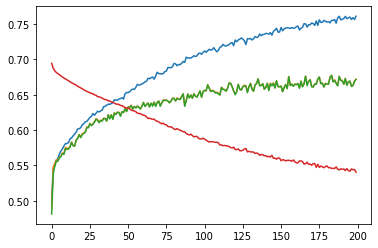

epoch: 0
train_acc: 0.754216998585265
test_acc: 0.6744287268770403
f1: 0.6742575229425087

epoch: 1
train_acc: 0.7604200674719773
test_acc: 0.6694232861806311
f1: 0.6686454671563565

epoch: 2
train_acc: 0.7599303515072369
test_acc: 0.6628944504896627
f1: 0.6627934082146286

epoch: 3
train_acc: 0.7557949722494287
test_acc: 0.6752992383025027
f1: 0.6748670386519341

epoch: 4
train_acc: 0.7590597453476984
test_acc: 0.6696409140369968
f1: 0.6680245663582691

epoch: 5
train_acc: 0.764011317880074
test_acc: 0.6729053318824809
f1: 0.6728126564543196

epoch: 6
train_acc: 0.7630318859505931
test_acc: 0.6718171926006529
f1: 0.6716713649172114

epoch: 7
train_acc: 0.7589509195777561
test_acc: 0.6589771490750816
f1: 0.6582038006567309

epoch: 8
train_acc: 0.764337795189901
test_acc: 0.6746463547334058
f1: 0.6746227693621294

epoch: 9
train_acc: 0.7640657307650451
test_acc: 0.6663764961915125
f1: 0.6663975444656164

epoch: 10
train_acc: 0.7611818478615736
test_acc: 0.6670293797606094
f1: 0.66599232

epoch: 90
train_acc: 0.7808793122211339
test_acc: 0.683569096844396
f1: 0.6834870042411512

epoch: 91
train_acc: 0.7795734029818261
test_acc: 0.6598476605005441
f1: 0.6598686378059131

epoch: 92
train_acc: 0.7813146153009033
test_acc: 0.676822633297062
f1: 0.6756417089581368

epoch: 93
train_acc: 0.7822940472303842
test_acc: 0.6702937976060935
f1: 0.6703066961345024

epoch: 94
train_acc: 0.7831102405049516
test_acc: 0.6735582154515778
f1: 0.6735709882590448

epoch: 95
train_acc: 0.7796822287517684
test_acc: 0.6748639825897715
f1: 0.6737359206776987

epoch: 96
train_acc: 0.7867014909130482
test_acc: 0.6755168661588683
f1: 0.67525481041819

epoch: 97
train_acc: 0.7808793122211339
test_acc: 0.6848748639825898
f1: 0.6846365603971437

epoch: 98
train_acc: 0.7851779301338557
test_acc: 0.6792165397170837
f1: 0.6783252112340036

epoch: 99
train_acc: 0.781205789530961
test_acc: 0.6729053318824809
f1: 0.6723078163961789

epoch: 100
train_acc: 0.7864294264881924
test_acc: 0.6857453754080522
f1: 0

epoch: 178
train_acc: 0.7976928936772227
test_acc: 0.6720348204570185
f1: 0.6720174484232972

epoch: 179
train_acc: 0.8001958863858962
test_acc: 0.6776931447225245
f1: 0.6773717771236097

epoch: 180
train_acc: 0.7957340298182609
test_acc: 0.6837867247007617
f1: 0.6837833091343275

epoch: 181
train_acc: 0.8042224398737621
test_acc: 0.6657236126224156
f1: 0.6653258961231603

epoch: 182
train_acc: 0.7994341059962999
test_acc: 0.6857453754080522
f1: 0.6857649043654936

epoch: 183
train_acc: 0.802481227554685
test_acc: 0.6803046789989119
f1: 0.6797798510268376

epoch: 184
train_acc: 0.8016650342801175
test_acc: 0.6772578890097932
f1: 0.6767956564957543

epoch: 185
train_acc: 0.7975296550223093
test_acc: 0.6794341675734494
f1: 0.6794543618148415

epoch: 186
train_acc: 0.8002502992708673
test_acc: 0.6787812840043526
f1: 0.6784471774685757

epoch: 187
train_acc: 0.7986179127217325
test_acc: 0.6842219804134929
f1: 0.6832617063965635

epoch: 188
train_acc: 0.8043856785286756
test_acc: 0.68400435

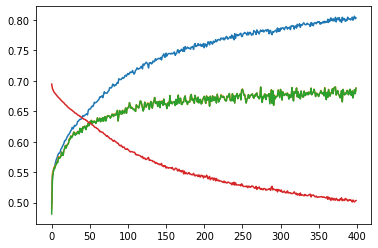

epoch: 0
train_acc: 0.8018826858200022
test_acc: 0.685310119695321
f1: 0.6852679499453505

epoch: 1
train_acc: 0.804168026988791
test_acc: 0.6742110990206747
f1: 0.6729855700702291

epoch: 2
train_acc: 0.8000326477309827
test_acc: 0.6820457018498368
f1: 0.682050823002321

epoch: 3
train_acc: 0.8048209816084448
test_acc: 0.6874863982589772
f1: 0.68750208965344

epoch: 4
train_acc: 0.7968222875176841
test_acc: 0.6792165397170837
f1: 0.676900005677537

epoch: 5
train_acc: 0.8029709435194254
test_acc: 0.6761697497279652
f1: 0.6761884937604933

epoch: 6
train_acc: 0.8040047883338775
test_acc: 0.6850924918389554
f1: 0.6850913878712879

epoch: 7
train_acc: 0.8076504516269453
test_acc: 0.6816104461371055
f1: 0.6801014689779599

epoch: 8
train_acc: 0.8010664925454347
test_acc: 0.6809575625680087
f1: 0.6809775093919563

epoch: 9
train_acc: 0.805854826422897
test_acc: 0.6759521218715996
f1: 0.6759461346143645

epoch: 10
train_acc: 0.8045489171835891
test_acc: 0.6731229597388466
f1: 0.671775493620

epoch: 90
train_acc: 0.8159212101425618
test_acc: 0.6820457018498368
f1: 0.6819225055124963

epoch: 91
train_acc: 0.8148329524431386
test_acc: 0.6833514689880305
f1: 0.682160323615353

epoch: 92
train_acc: 0.8146153009032538
test_acc: 0.6877040261153428
f1: 0.6877155650047602

epoch: 93
train_acc: 0.8186418543911198
test_acc: 0.6826985854189336
f1: 0.6827149963297824

epoch: 94
train_acc: 0.8158123843726194
test_acc: 0.6898803046789989
f1: 0.688410521731779

epoch: 95
train_acc: 0.8189683317009467
test_acc: 0.6877040261153428
f1: 0.6876254344715715

epoch: 96
train_acc: 0.8186418543911198
test_acc: 0.6898803046789989
f1: 0.6898478597377883

epoch: 97
train_acc: 0.815649145717706
test_acc: 0.6816104461371055
f1: 0.6805950932147031

epoch: 98
train_acc: 0.8171727064968984
test_acc: 0.6877040261153428
f1: 0.6875998171350047

epoch: 99
train_acc: 0.8184242028512352
test_acc: 0.6833514689880305
f1: 0.6833657483204415

epoch: 100
train_acc: 0.8164653389922734
test_acc: 0.6877040261153428
f1:

epoch: 178
train_acc: 0.8280552834911307
test_acc: 0.6868335146898803
f1: 0.6866118772812616

epoch: 179
train_acc: 0.8272935031015345
test_acc: 0.6837867247007617
f1: 0.6835394244400479

epoch: 180
train_acc: 0.8244096201980629
test_acc: 0.685310119695321
f1: 0.6849357068971937

epoch: 181
train_acc: 0.8266949613668517
test_acc: 0.690968443960827
f1: 0.6909307525856195

epoch: 182
train_acc: 0.826803787136794
test_acc: 0.6898803046789989
f1: 0.6897424046062492

epoch: 183
train_acc: 0.82615083251714
test_acc: 0.682480957562568
f1: 0.6821080672637453

epoch: 184
train_acc: 0.828817063880727
test_acc: 0.6907508161044613
f1: 0.6906133031196352

epoch: 185
train_acc: 0.8291979540755251
test_acc: 0.6816104461371055
f1: 0.6815935813160476

epoch: 186
train_acc: 0.8320274240940254
test_acc: 0.6890097932535365
f1: 0.6886252396626356

epoch: 187
train_acc: 0.8268582000217651
test_acc: 0.6957562568008705
f1: 0.6956466839297164

epoch: 188
train_acc: 0.8322450756339101
test_acc: 0.68922742110990

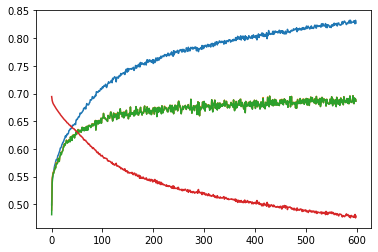

epoch: 0
train_acc: 0.8296332571552943
test_acc: 0.6870511425462459
f1: 0.6863611355875102

epoch: 1
train_acc: 0.8277288061813037
test_acc: 0.6957562568008705
f1: 0.6957078153955182

epoch: 2
train_acc: 0.8278920448362173
test_acc: 0.6846572361262242
f1: 0.6845170135259335

epoch: 3
train_acc: 0.8308303406246599
test_acc: 0.6892274211099021
f1: 0.6892033022973066

epoch: 4
train_acc: 0.8295788442703232
test_acc: 0.6933623503808487
f1: 0.6932319620331615

epoch: 5
train_acc: 0.829524431385352
test_acc: 0.6870511425462459
f1: 0.6866788011882189

epoch: 6
train_acc: 0.830177386005006
test_acc: 0.6898803046789989
f1: 0.6896682716648501

epoch: 7
train_acc: 0.8317009467841985
test_acc: 0.6920565832426551
f1: 0.69193726577699

epoch: 8
train_acc: 0.8311568179344869
test_acc: 0.6907508161044613
f1: 0.6906071713016532

epoch: 9
train_acc: 0.8343671781477854
test_acc: 0.6887921653971708
f1: 0.6884408826876813

epoch: 10
train_acc: 0.8295788442703232
test_acc: 0.683569096844396
f1: 0.6832669340

epoch: 89
train_acc: 0.8395908151050169
test_acc: 0.6916213275299238
f1: 0.6907133947708161

epoch: 90
train_acc: 0.8401893568396996
test_acc: 0.6922742110990207
f1: 0.6922503287453724

epoch: 91
train_acc: 0.8418761562738056
test_acc: 0.6933623503808487
f1: 0.6933193703554031

epoch: 92
train_acc: 0.8391555120252476
test_acc: 0.6837867247007617
f1: 0.6832210346507592

epoch: 93
train_acc: 0.8404614212645555
test_acc: 0.6861806311207834
f1: 0.6861915128105032

epoch: 94
train_acc: 0.837958428555882
test_acc: 0.6922742110990207
f1: 0.6922291533373909

epoch: 95
train_acc: 0.8393731635651323
test_acc: 0.6898803046789989
f1: 0.6890684992936581

epoch: 96
train_acc: 0.8395364022200457
test_acc: 0.6953210010881393
f1: 0.6953329223751086

epoch: 97
train_acc: 0.8381216672107955
test_acc: 0.69379760609358
f1: 0.6936026093533191

epoch: 98
train_acc: 0.8405158341495266
test_acc: 0.6848748639825898
f1: 0.6842565864139581

epoch: 99
train_acc: 0.8402437697246709
test_acc: 0.6927094668117519
f1: 

epoch: 177
train_acc: 0.8479703993905757
test_acc: 0.6900979325353646
f1: 0.6901038341634781

epoch: 178
train_acc: 0.8492763086298836
test_acc: 0.690968443960827
f1: 0.6904555358450929

epoch: 179
train_acc: 0.8504733920992491
test_acc: 0.6957562568008705
f1: 0.6953557517247011

epoch: 180
train_acc: 0.8501469147894222
test_acc: 0.6920565832426551
f1: 0.69193726577699

epoch: 181
train_acc: 0.846065948416585
test_acc: 0.6953210010881393
f1: 0.6950300602767627

epoch: 182
train_acc: 0.8496571988246817
test_acc: 0.6900979325353646
f1: 0.6899248735156226

epoch: 183
train_acc: 0.8482968767004027
test_acc: 0.6935799782372144
f1: 0.6935970470304816

epoch: 184
train_acc: 0.8502013276743933
test_acc: 0.6907508161044613
f1: 0.6901858996001132

epoch: 185
train_acc: 0.8474262705408641
test_acc: 0.6940152339499456
f1: 0.6938637865049372

epoch: 186
train_acc: 0.8502557405593645
test_acc: 0.688139281828074
f1: 0.6880184465430578

epoch: 187
train_acc: 0.8490042442050277
test_acc: 0.697279651795

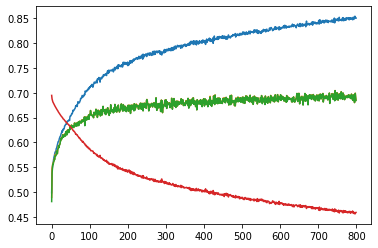

epoch: 0
train_acc: 0.8538469909674611
test_acc: 0.690968443960827
f1: 0.6907459778198918

epoch: 1
train_acc: 0.8511807596038742
test_acc: 0.7016322089227421
f1: 0.7016456638813231

epoch: 2
train_acc: 0.8516704755686146
test_acc: 0.6953210010881393
f1: 0.6946867507923808

epoch: 3
train_acc: 0.8536837523125476
test_acc: 0.6927094668117519
f1: 0.6922745361878111

epoch: 4
train_acc: 0.8516160626836435
test_acc: 0.6957562568008705
f1: 0.6956866150204806

epoch: 5
train_acc: 0.8517248884535858
test_acc: 0.6961915125136018
f1: 0.6959653361465062

epoch: 6
train_acc: 0.855860267711394
test_acc: 0.683569096844396
f1: 0.683292810544708

epoch: 7
train_acc: 0.8516704755686146
test_acc: 0.6951033732317736
f1: 0.6948330750730304

epoch: 8
train_acc: 0.8499836761345086
test_acc: 0.7014145810663764
f1: 0.701370861654102

epoch: 9
train_acc: 0.8528131461530091
test_acc: 0.6961915125136018
f1: 0.6959422304560018

epoch: 10
train_acc: 0.8521057786483839
test_acc: 0.6985854189336235
f1: 0.6985604552

epoch: 90
train_acc: 0.8582544346501252
test_acc: 0.7001088139281828
f1: 0.6997881433817621

epoch: 91
train_acc: 0.8604309500489716
test_acc: 0.6933623503808487
f1: 0.6932652932302827

epoch: 92
train_acc: 0.8577103058004135
test_acc: 0.6959738846572361
f1: 0.695800789058754

epoch: 93
train_acc: 0.8625530525628469
test_acc: 0.6883569096844396
f1: 0.6879158185700746

epoch: 94
train_acc: 0.8610839046686255
test_acc: 0.690968443960827
f1: 0.6908399985566399

epoch: 95
train_acc: 0.8609750788986832
test_acc: 0.7038084874863982
f1: 0.7035616020941982

epoch: 96
train_acc: 0.8597235825443466
test_acc: 0.6935799782372144
f1: 0.6928391115350365

epoch: 97
train_acc: 0.8576558929154424
test_acc: 0.6953210010881393
f1: 0.6952908291332601

epoch: 98
train_acc: 0.8616280335183372
test_acc: 0.6981501632208923
f1: 0.6979648427220165

epoch: 99
train_acc: 0.8621721623680487
test_acc: 0.6924918389553862
f1: 0.6919870180401099

epoch: 100
train_acc: 0.8578191315703558
test_acc: 0.6992383025027203
f1

epoch: 178
train_acc: 0.8674502122102514
test_acc: 0.6890097932535365
f1: 0.6889700058879408

epoch: 179
train_acc: 0.8687017085645881
test_acc: 0.6994559303590859
f1: 0.699365846833055

epoch: 180
train_acc: 0.8671781477853956
test_acc: 0.7009793253536453
f1: 0.7004499981697329

epoch: 181
train_acc: 0.8690825987593862
test_acc: 0.6994559303590859
f1: 0.6994244872265863

epoch: 182
train_acc: 0.8681031668299053
test_acc: 0.6935799782372144
f1: 0.6935052187512974

epoch: 183
train_acc: 0.8646751550767222
test_acc: 0.6890097932535365
f1: 0.6879867402237755

epoch: 184
train_acc: 0.8652192839264338
test_acc: 0.6990206746463548
f1: 0.6989626237408477

epoch: 185
train_acc: 0.8671781477853956
test_acc: 0.6929270946681175
f1: 0.6927244026775009

epoch: 186
train_acc: 0.8717488301229731
test_acc: 0.6959738846572361
f1: 0.6952715444864961

epoch: 187
train_acc: 0.870334095113723
test_acc: 0.6935799782372144
f1: 0.693567928823307

epoch: 188
train_acc: 0.8698443791489825
test_acc: 0.7016322089

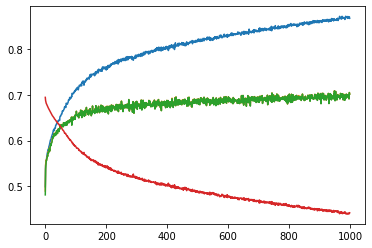

epoch: 0
train_acc: 0.8705517466536076
test_acc: 0.696626768226333
f1: 0.6965967255798319

epoch: 1
train_acc: 0.8709326368484057
test_acc: 0.6961915125136018
f1: 0.6961710149700389

epoch: 2
train_acc: 0.8695723147241267
test_acc: 0.6957562568008705
f1: 0.6953848169846801

epoch: 3
train_acc: 0.8675046250952225
test_acc: 0.6918389553862895
f1: 0.6914530378151705

epoch: 4
train_acc: 0.8678855152900207
test_acc: 0.6933623503808487
f1: 0.6933654009055116

epoch: 5
train_acc: 0.8730003264773099
test_acc: 0.6996735582154516
f1: 0.6996217831338117

epoch: 6
train_acc: 0.8666884318206551
test_acc: 0.6927094668117519
f1: 0.6920190842907246

epoch: 7
train_acc: 0.8701164435738383
test_acc: 0.7066376496191512
f1: 0.7064608532477269

epoch: 8
train_acc: 0.8734900424420503
test_acc: 0.6961915125136018
f1: 0.6961307845174068

epoch: 9
train_acc: 0.8733268037871368
test_acc: 0.6942328618063112
f1: 0.693835292925662

epoch: 10
train_acc: 0.8675046250952225
test_acc: 0.6894450489662677
f1: 0.6893716

epoch: 90
train_acc: 0.8750136032212428
test_acc: 0.697714907508161
f1: 0.69759213368853

epoch: 91
train_acc: 0.8775710088148874
test_acc: 0.6974972796517954
f1: 0.6966847311321835

epoch: 92
train_acc: 0.8774077701599738
test_acc: 0.7038084874863982
f1: 0.7035842979220693

epoch: 93
train_acc: 0.8801828272935031
test_acc: 0.7020674646354733
f1: 0.70206195989729

epoch: 94
train_acc: 0.8799107628686473
test_acc: 0.6996735582154516
f1: 0.6992280923606693

epoch: 95
train_acc: 0.8764283382304929
test_acc: 0.6959738846572361
f1: 0.6956793220576781

epoch: 96
train_acc: 0.8793122211339646
test_acc: 0.7001088139281828
f1: 0.700082384756483

epoch: 97
train_acc: 0.8776254216998586
test_acc: 0.7011969532100109
f1: 0.7010698962892341

epoch: 98
train_acc: 0.8796386984437915
test_acc: 0.6911860718171926
f1: 0.6908421277881578

epoch: 99
train_acc: 0.8778974861247143
test_acc: 0.7016322089227421
f1: 0.7014282108438664

epoch: 100
train_acc: 0.8771357057351181
test_acc: 0.7001088139281828
f1: 0.

epoch: 178
train_acc: 0.88894330177386
test_acc: 0.7053318824809576
f1: 0.7051339103024721

epoch: 179
train_acc: 0.8812166721079552
test_acc: 0.7005440696409141
f1: 0.7000685350742467

epoch: 180
train_acc: 0.8856785286755904
test_acc: 0.7009793253536453
f1: 0.7007991189631875

epoch: 181
train_acc: 0.8824681684622919
test_acc: 0.7044613710554951
f1: 0.7040430737556993

epoch: 182
train_acc: 0.8841549678963979
test_acc: 0.7014145810663764
f1: 0.7010311470574385

epoch: 183
train_acc: 0.884862335401023
test_acc: 0.6994559303590859
f1: 0.6993848842266632

epoch: 184
train_acc: 0.8881815213842638
test_acc: 0.7057671381936887
f1: 0.7056503979395473

epoch: 185
train_acc: 0.883175535966917
test_acc: 0.7092491838955386
f1: 0.7087666168232706

epoch: 186
train_acc: 0.8839917292414844
test_acc: 0.6992383025027203
f1: 0.6991781835265446

epoch: 187
train_acc: 0.8869844379148982
test_acc: 0.6992383025027203
f1: 0.699129983684455

epoch: 188
train_acc: 0.8860050059854173
test_acc: 0.700326441784

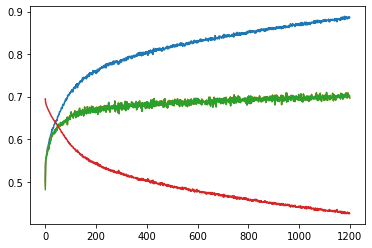

epoch: 0
train_acc: 0.8899771465883121
test_acc: 0.6996735582154516
f1: 0.6994992628962706

epoch: 1
train_acc: 0.8842637936663402
test_acc: 0.7007616974972797
f1: 0.70063445549723

epoch: 2
train_acc: 0.8866035477201001
test_acc: 0.6968443960826985
f1: 0.6964695303359352

epoch: 3
train_acc: 0.8873109152247252
test_acc: 0.7053318824809576
f1: 0.7051736779670764

epoch: 4
train_acc: 0.8841549678963979
test_acc: 0.6970620239390642
f1: 0.6970214289930345

epoch: 5
train_acc: 0.890630101207966
test_acc: 0.6979325353645267
f1: 0.6977504928099739

epoch: 6
train_acc: 0.8838829034715421
test_acc: 0.7016322089227421
f1: 0.7012725936193835

epoch: 7
train_acc: 0.887582979649581
test_acc: 0.6933623503808487
f1: 0.6933431730706681

epoch: 8
train_acc: 0.8869300250299271
test_acc: 0.7014145810663764
f1: 0.7012847274958643

epoch: 9
train_acc: 0.8878006311894656
test_acc: 0.7053318824809576
f1: 0.7048948094611205

epoch: 10
train_acc: 0.8908477527478507
test_acc: 0.6981501632208923
f1: 0.697757687

epoch: 90
train_acc: 0.8930786810316683
test_acc: 0.7048966267682263
f1: 0.7047052809239422

epoch: 91
train_acc: 0.8929154423767548
test_acc: 0.7105549510337323
f1: 0.7102704463698085

epoch: 92
train_acc: 0.8930786810316683
test_acc: 0.7105549510337323
f1: 0.7103535915682597

epoch: 93
train_acc: 0.8922080748721297
test_acc: 0.7031556039173014
f1: 0.7031489379288801

epoch: 94
train_acc: 0.8937316356513222
test_acc: 0.7114254624591948
f1: 0.7112247085860995

epoch: 95
train_acc: 0.8913374687125911
test_acc: 0.7070729053318825
f1: 0.7067243855350089

epoch: 96
train_acc: 0.889596256393514
test_acc: 0.7033732317736671
f1: 0.7031259835814784

epoch: 97
train_acc: 0.8941669387310915
test_acc: 0.7048966267682263
f1: 0.7046148298109215

epoch: 98
train_acc: 0.8943845902709762
test_acc: 0.705114254624592
f1: 0.7045867184802332

epoch: 99
train_acc: 0.8969964087495919
test_acc: 0.7044613710554951
f1: 0.7042413513516872

epoch: 100
train_acc: 0.8920992491021874
test_acc: 0.7018498367791077
f1

epoch: 178
train_acc: 0.8990096854935249
test_acc: 0.6998911860718172
f1: 0.6998977541649518

epoch: 179
train_acc: 0.901077375122429
test_acc: 0.7022850924918389
f1: 0.7017009739048996

epoch: 180
train_acc: 0.8990096854935249
test_acc: 0.7038084874863982
f1: 0.703545906619839

epoch: 181
train_acc: 0.8996082272282077
test_acc: 0.7092491838955386
f1: 0.7092137221509773

epoch: 182
train_acc: 0.8998802916530635
test_acc: 0.7018498367791077
f1: 0.7014858363869897

epoch: 183
train_acc: 0.8999891174230058
test_acc: 0.7011969532100109
f1: 0.7007690063173773

epoch: 184
train_acc: 0.9021656328218522
test_acc: 0.7109902067464635
f1: 0.7109615864921209

epoch: 185
train_acc: 0.8999891174230058
test_acc: 0.7027203482045702
f1: 0.7025063420436422

epoch: 186
train_acc: 0.8981934922189575
test_acc: 0.6990206746463548
f1: 0.6978884725498509

epoch: 187
train_acc: 0.9022200457068233
test_acc: 0.7072905331882481
f1: 0.7070310392385625

epoch: 188
train_acc: 0.9032538905212755
test_acc: 0.708378672

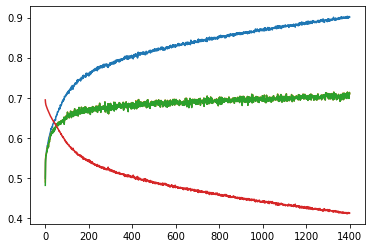

epoch: 0
train_acc: 0.9009141364675155
test_acc: 0.7055495103373232
f1: 0.7050554518410607

epoch: 1
train_acc: 0.9009141364675155
test_acc: 0.7064200217627856
f1: 0.7058837287547872

epoch: 2
train_acc: 0.9013494395472847
test_acc: 0.711860718171926
f1: 0.7118071379034047

epoch: 3
train_acc: 0.903798019370987
test_acc: 0.7016322089227421
f1: 0.7015476726539405

epoch: 4
train_acc: 0.898030253564044
test_acc: 0.7040261153427638
f1: 0.7032975572656452

epoch: 5
train_acc: 0.9027097616715638
test_acc: 0.7016322089227421
f1: 0.7015524542189654

epoch: 6
train_acc: 0.9000435303079769
test_acc: 0.7022850924918389
f1: 0.7022939773755045

epoch: 7
train_acc: 0.9013494395472847
test_acc: 0.7088139281828074
f1: 0.7081350351225746

epoch: 8
train_acc: 0.9002611818478615
test_acc: 0.7057671381936887
f1: 0.7052127644567281

epoch: 9
train_acc: 0.9018935683969964
test_acc: 0.7027203482045702
f1: 0.7027352746981887

epoch: 10
train_acc: 0.9030362389813908
test_acc: 0.7066376496191512
f1: 0.70653199

epoch: 90
train_acc: 0.9071172053542279
test_acc: 0.7064200217627856
f1: 0.706219297176058

epoch: 91
train_acc: 0.9063554249646316
test_acc: 0.7016322089227421
f1: 0.7012725936193835

epoch: 92
train_acc: 0.9048862770704102
test_acc: 0.7094668117519043
f1: 0.7093936968777338

epoch: 93
train_acc: 0.9053215801501796
test_acc: 0.70620239390642
f1: 0.7061068931994968

epoch: 94
train_acc: 0.908858417673305
test_acc: 0.7096844396082699
f1: 0.7094961981950877

epoch: 95
train_acc: 0.9065730765045162
test_acc: 0.7027203482045702
f1: 0.7022895510748597

epoch: 96
train_acc: 0.9065186636195451
test_acc: 0.7057671381936887
f1: 0.705644843696181

epoch: 97
train_acc: 0.9068995538143433
test_acc: 0.70620239390642
f1: 0.7061630238078997

epoch: 98
train_acc: 0.9096746109478725
test_acc: 0.712948857453754
f1: 0.7127790791943592

epoch: 99
train_acc: 0.9091304820981608
test_acc: 0.7020674646354733
f1: 0.7015783635505382

epoch: 100
train_acc: 0.907171618239199
test_acc: 0.7025027203482046
f1: 0.702

epoch: 178
train_acc: 0.9103275655675264
test_acc: 0.7040261153427638
f1: 0.7032174704361216

epoch: 179
train_acc: 0.9147350092501905
test_acc: 0.7075081610446137
f1: 0.7074322790234575

epoch: 180
train_acc: 0.9131026227010556
test_acc: 0.7116430903155604
f1: 0.7116477347556984

epoch: 181
train_acc: 0.9145173577103058
test_acc: 0.7059847660500544
f1: 0.7057396946577968

epoch: 182
train_acc: 0.9154423767548155
test_acc: 0.7133841131664853
f1: 0.713002153819963

epoch: 183
train_acc: 0.9120143650016324
test_acc: 0.7112078346028292
f1: 0.7111260113871474

epoch: 184
train_acc: 0.9146805963652193
test_acc: 0.7007616974972797
f1: 0.7006286360235738

epoch: 185
train_acc: 0.9154967896397868
test_acc: 0.7114254624591948
f1: 0.711251551488491

epoch: 186
train_acc: 0.9156056154097291
test_acc: 0.7099020674646355
f1: 0.7094963257108327

epoch: 187
train_acc: 0.9169115246490369
test_acc: 0.711860718171926
f1: 0.7116671323784881

epoch: 188
train_acc: 0.9152247252149309
test_acc: 0.7042437431

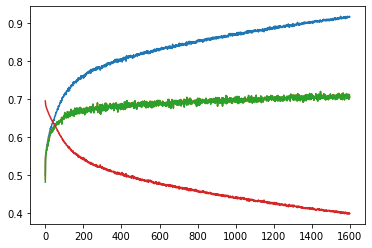

epoch: 0
train_acc: 0.9143541190553923
test_acc: 0.7092491838955386
f1: 0.7091546735663171

epoch: 1
train_acc: 0.9171835890738927
test_acc: 0.7033732317736671
f1: 0.7032233483188791

epoch: 2
train_acc: 0.9162585700293829
test_acc: 0.7007616974972797
f1: 0.7006227027021625

epoch: 3
train_acc: 0.914571770595277
test_acc: 0.7131664853101197
f1: 0.7128513012326205

epoch: 4
train_acc: 0.9157144411796714
test_acc: 0.7053318824809576
f1: 0.7050901003133427

epoch: 5
train_acc: 0.9137555773207096
test_acc: 0.7064200217627856
f1: 0.706421023132706

epoch: 6
train_acc: 0.9184350854282294
test_acc: 0.7022850924918389
f1: 0.7020634526134817

epoch: 7
train_acc: 0.9187615627380564
test_acc: 0.7159956474428727
f1: 0.7154981995525543

epoch: 8
train_acc: 0.9134291000108826
test_acc: 0.7075081610446137
f1: 0.7074229042231394

epoch: 9
train_acc: 0.9137555773207096
test_acc: 0.7053318824809576
f1: 0.7053202951894586

epoch: 10
train_acc: 0.9154967896397868
test_acc: 0.7018498367791077
f1: 0.7014075

epoch: 90
train_acc: 0.9204483621721624
test_acc: 0.7157780195865071
f1: 0.7156997821715076

epoch: 91
train_acc: 0.919958646207422
test_acc: 0.7075081610446137
f1: 0.7074276471964059

epoch: 92
train_acc: 0.9215910327565567
test_acc: 0.7088139281828074
f1: 0.7085110592499692

epoch: 93
train_acc: 0.9214277941016432
test_acc: 0.7107725788900979
f1: 0.7104417369833177

epoch: 94
train_acc: 0.9214822069866144
test_acc: 0.7103373231773668
f1: 0.7102303915950188

epoch: 95
train_acc: 0.9235498966155186
test_acc: 0.7159956474428727
f1: 0.71585798941806

epoch: 96
train_acc: 0.9198498204374796
test_acc: 0.7070729053318825
f1: 0.7069922716714006

epoch: 97
train_acc: 0.92033953640222
test_acc: 0.7040261153427638
f1: 0.7037832617622941

epoch: 98
train_acc: 0.9213189683317009
test_acc: 0.707943416757345
f1: 0.7078630227214114

epoch: 99
train_acc: 0.9224072260311241
test_acc: 0.7116430903155604
f1: 0.7113874550119665

epoch: 100
train_acc: 0.9207204265970181
test_acc: 0.707943416757345
f1: 0.7

epoch: 178
train_acc: 0.9256719991293938
test_acc: 0.7029379760609358
f1: 0.702734870752646

epoch: 179
train_acc: 0.9266514310588747
test_acc: 0.7122959738846573
f1: 0.7119967267028843

epoch: 180
train_acc: 0.9246381543149418
test_acc: 0.7055495103373232
f1: 0.7053339348106945

epoch: 181
train_acc: 0.9266514310588747
test_acc: 0.7138193688792165
f1: 0.7135808278867527

epoch: 182
train_acc: 0.9281749918380673
test_acc: 0.7068552774755169
f1: 0.7064741206910083

epoch: 183
train_acc: 0.9272499727935575
test_acc: 0.7125136017410229
f1: 0.7123913568813387

epoch: 184
train_acc: 0.9288279464577212
test_acc: 0.7131664853101197
f1: 0.713073248323657

epoch: 185
train_acc: 0.9271411470236152
test_acc: 0.7151251360174102
f1: 0.7149928129724589

epoch: 186
train_acc: 0.9277396887582979
test_acc: 0.7025027203482046
f1: 0.7022389818878176

epoch: 187
train_acc: 0.9277396887582979
test_acc: 0.7122959738846573
f1: 0.7118692305078296

epoch: 188
train_acc: 0.9252911089345958
test_acc: 0.710990206

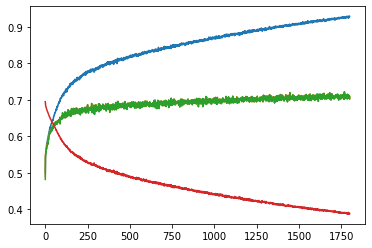

epoch: 0
train_acc: 0.9292632495374905
test_acc: 0.7170837867247007
f1: 0.7169869127840879

epoch: 1
train_acc: 0.9259440635542496
test_acc: 0.707943416757345
f1: 0.7077402405147404

epoch: 2
train_acc: 0.9310588747415388
test_acc: 0.707943416757345
f1: 0.7076726017773122

epoch: 3
train_acc: 0.926760256828817
test_acc: 0.7103373231773668
f1: 0.7102644273739803

epoch: 4
train_acc: 0.9277941016432691
test_acc: 0.7122959738846573
f1: 0.7122257806741586

epoch: 5
train_acc: 0.9265426052889324
test_acc: 0.7068552774755169
f1: 0.7066548504789848

epoch: 6
train_acc: 0.9296985526172598
test_acc: 0.7153427638737758
f1: 0.715158191333714

epoch: 7
train_acc: 0.9250190445097399
test_acc: 0.7125136017410229
f1: 0.712218732440123

epoch: 8
train_acc: 0.928447056262923
test_acc: 0.7140369967355822
f1: 0.7138311372220689

epoch: 9
train_acc: 0.9270867341386441
test_acc: 0.7064200217627856
f1: 0.7062655215226992

epoch: 10
train_acc: 0.928066166068125
test_acc: 0.7168661588683352
f1: 0.716665776471

epoch: 90
train_acc: 0.9311677005114811
test_acc: 0.7125136017410229
f1: 0.7123968384467587

epoch: 91
train_acc: 0.9307323974317119
test_acc: 0.712948857453754
f1: 0.7128155235375654

epoch: 92
train_acc: 0.9323103710958756
test_acc: 0.714689880304679
f1: 0.7143370813140064

epoch: 93
train_acc: 0.931439764936337
test_acc: 0.7088139281828074
f1: 0.7084852454798026

epoch: 94
train_acc: 0.9336162803351834
test_acc: 0.7088139281828074
f1: 0.7086182954096806

epoch: 95
train_acc: 0.933833931875068
test_acc: 0.7116430903155604
f1: 0.7114390113951853

epoch: 96
train_acc: 0.9329633257155294
test_acc: 0.7096844396082699
f1: 0.7095407476511993

epoch: 97
train_acc: 0.934486886494722
test_acc: 0.7112078346028292
f1: 0.7109360692272814

epoch: 98
train_acc: 0.933180977255414
test_acc: 0.7199129488574537
f1: 0.7196009996218177

epoch: 99
train_acc: 0.9332898030253564
test_acc: 0.7170837867247007
f1: 0.716821447325265

epoch: 100
train_acc: 0.9332898030253564
test_acc: 0.7179542981501632
f1: 0.7

epoch: 178
train_acc: 0.9372619436282512
test_acc: 0.7142546245919478
f1: 0.7141954753881652

epoch: 179
train_acc: 0.9376428338230492
test_acc: 0.7044613710554951
f1: 0.7042697429902017

epoch: 180
train_acc: 0.9385678528675591
test_acc: 0.7081610446137105
f1: 0.7079818702885537

epoch: 181
train_acc: 0.936554576123626
test_acc: 0.7105549510337323
f1: 0.710445464178254

epoch: 182
train_acc: 0.9363913374687126
test_acc: 0.7133841131664853
f1: 0.7132783063340642

epoch: 183
train_acc: 0.9383502013276744
test_acc: 0.7092491838955386
f1: 0.7091283366701907

epoch: 184
train_acc: 0.9354119055392317
test_acc: 0.7109902067464635
f1: 0.7108160334666034

epoch: 185
train_acc: 0.9363369245837414
test_acc: 0.7105549510337323
f1: 0.710346584859476

epoch: 186
train_acc: 0.936554576123626
test_acc: 0.7066376496191512
f1: 0.706340961826993

epoch: 187
train_acc: 0.9384590270976167
test_acc: 0.7131664853101197
f1: 0.7128845476055695

epoch: 188
train_acc: 0.9385134399825878
test_acc: 0.712731229597

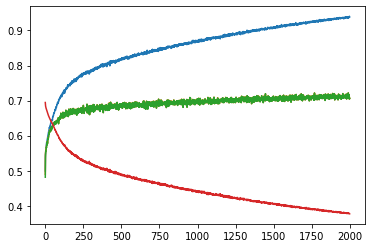

epoch: 0
train_acc: 0.93954728479704
test_acc: 0.7081610446137105
f1: 0.7080876011333641

epoch: 1
train_acc: 0.938894330177386
test_acc: 0.710119695321001
f1: 0.710069721111766

epoch: 2
train_acc: 0.936173685928828
test_acc: 0.7168661588683352
f1: 0.7168075502513351

epoch: 3
train_acc: 0.936554576123626
test_acc: 0.7068552774755169
f1: 0.7064835117431442

epoch: 4
train_acc: 0.9390575688322995
test_acc: 0.7112078346028292
f1: 0.7110305308522825

epoch: 5
train_acc: 0.937860485362934
test_acc: 0.7125136017410229
f1: 0.7123623083257863

epoch: 6
train_acc: 0.9383502013276744
test_acc: 0.7107725788900979
f1: 0.7106906323538198

epoch: 7
train_acc: 0.9390575688322995
test_acc: 0.7103373231773668
f1: 0.7099513035188845

epoch: 8
train_acc: 0.9384046142126455
test_acc: 0.7112078346028292
f1: 0.7109746032360416

epoch: 9
train_acc: 0.9362825116987703
test_acc: 0.7218715995647443
f1: 0.7217950395215825

epoch: 10
train_acc: 0.9386222657525302
test_acc: 0.7133841131664853
f1: 0.7133327725580

epoch: 90
train_acc: 0.9444988573294156
test_acc: 0.7096844396082699
f1: 0.7095798829486707

epoch: 91
train_acc: 0.9407443682664055
test_acc: 0.7223068552774755
f1: 0.722225912045183

epoch: 92
train_acc: 0.944281205789531
test_acc: 0.7188248095756257
f1: 0.7186677925436689

epoch: 93
train_acc: 0.942920883665252
test_acc: 0.7166485310119696
f1: 0.7163619675806713

epoch: 94
train_acc: 0.9416149744259441
test_acc: 0.70620239390642
f1: 0.7058707633764824

epoch: 95
train_acc: 0.9450973990640984
test_acc: 0.7194776931447225
f1: 0.7192438685521099

epoch: 96
train_acc: 0.9444444444444444
test_acc: 0.712948857453754
f1: 0.7127170321539855

epoch: 97
train_acc: 0.9431385352051366
test_acc: 0.7136017410228509
f1: 0.7135733793852644

epoch: 98
train_acc: 0.9428120578953096
test_acc: 0.7094668117519043
f1: 0.709374851996045

epoch: 99
train_acc: 0.9451518119490695
test_acc: 0.7157780195865071
f1: 0.715690456412395

epoch: 100
train_acc: 0.9428120578953096
test_acc: 0.7077257889009794
f1: 0.70

epoch: 178
train_acc: 0.9468386113831755
test_acc: 0.710119695321001
f1: 0.7098428859204626

epoch: 179
train_acc: 0.9483077592773969
test_acc: 0.7103373231773668
f1: 0.7102731612186551

epoch: 180
train_acc: 0.9455871150288389
test_acc: 0.7085963003264418
f1: 0.7083057458261403

epoch: 181
train_acc: 0.9496680814016759
test_acc: 0.717519042437432
f1: 0.7168962127903951

epoch: 182
train_acc: 0.9470562629230602
test_acc: 0.7116430903155604
f1: 0.7114527523371288

epoch: 183
train_acc: 0.9477636304276853
test_acc: 0.7122959738846573
f1: 0.7122343461693192

epoch: 184
train_acc: 0.9462400696484927
test_acc: 0.7162132752992383
f1: 0.7161483161564426

epoch: 185
train_acc: 0.9455871150288389
test_acc: 0.7144722524483134
f1: 0.714158503199695

epoch: 186
train_acc: 0.9458047665687235
test_acc: 0.7075081610446137
f1: 0.7070540077332278

epoch: 187
train_acc: 0.946348895418435
test_acc: 0.7144722524483134
f1: 0.7143936555964915

epoch: 188
train_acc: 0.9480356948525411
test_acc: 0.71621327529

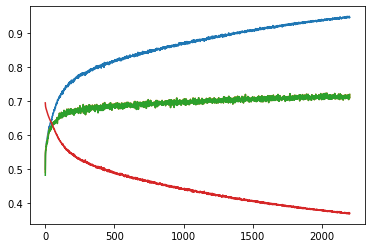

epoch: 0
train_acc: 0.9477092175427141
test_acc: 0.7138193688792165
f1: 0.7137986232181941

epoch: 1
train_acc: 0.944662095984329
test_acc: 0.7131664853101197
f1: 0.7128764003620006

epoch: 2
train_acc: 0.9474915660028295
test_acc: 0.7142546245919478
f1: 0.7136305312751388

epoch: 3
train_acc: 0.9480901077375122
test_acc: 0.7186071817192601
f1: 0.7183345479030621

epoch: 4
train_acc: 0.9473827402328872
test_acc: 0.710119695321001
f1: 0.7101234854561802

epoch: 5
train_acc: 0.9483621721623681
test_acc: 0.7149075081610446
f1: 0.7148244081341613

epoch: 6
train_acc: 0.9461856567635216
test_acc: 0.7077257889009794
f1: 0.7072459768067003

epoch: 7
train_acc: 0.9503210360213299
test_acc: 0.7096844396082699
f1: 0.7093824761131979

epoch: 8
train_acc: 0.9460224181086081
test_acc: 0.7131664853101197
f1: 0.7131244866327305

epoch: 9
train_acc: 0.9487974752421373
test_acc: 0.714689880304679
f1: 0.7146180798552129

epoch: 10
train_acc: 0.9478724561976276
test_acc: 0.7088139281828074
f1: 0.70850256

epoch: 90
train_acc: 0.9499945587115028
test_acc: 0.7177366702937976
f1: 0.7173324116486806

epoch: 91
train_acc: 0.9530416802698879
test_acc: 0.712948857453754
f1: 0.7127726226029847

epoch: 92
train_acc: 0.9508651648710414
test_acc: 0.7196953210010881
f1: 0.7195993412814656

epoch: 93
train_acc: 0.9511372292958973
test_acc: 0.7210010881392819
f1: 0.7209453193061

epoch: 94
train_acc: 0.9536946348895419
test_acc: 0.7099020674646355
f1: 0.7096602612722749

epoch: 95
train_acc: 0.9507563391010991
test_acc: 0.7107725788900979
f1: 0.7106079088468747

epoch: 96
train_acc: 0.9507563391010991
test_acc: 0.7133841131664853
f1: 0.7132783063340642

epoch: 97
train_acc: 0.951028403525955
test_acc: 0.7190424374319913
f1: 0.7189673365402511

epoch: 98
train_acc: 0.9526607900750897
test_acc: 0.7138193688792165
f1: 0.7136098479497882

epoch: 99
train_acc: 0.9513548808357819
test_acc: 0.7168661588683352
f1: 0.7167346445203735

epoch: 100
train_acc: 0.9505931004461856
test_acc: 0.7075081610446137
f1: 0

epoch: 178
train_acc: 0.9516269452606377
test_acc: 0.707943416757345
f1: 0.7078106671885485

epoch: 179
train_acc: 0.9530960931548591
test_acc: 0.7081610446137105
f1: 0.708042513517868

epoch: 180
train_acc: 0.9527696158450321
test_acc: 0.7144722524483134
f1: 0.7143189553122631

epoch: 181
train_acc: 0.9545652410490805
test_acc: 0.7131664853101197
f1: 0.7129529463045094

epoch: 182
train_acc: 0.9542931766242246
test_acc: 0.7170837867247007
f1: 0.7169318916966021

epoch: 183
train_acc: 0.9543475895091957
test_acc: 0.7094668117519043
f1: 0.709384495253837

epoch: 184
train_acc: 0.9549461312438785
test_acc: 0.7179542981501632
f1: 0.7175262101470627

epoch: 185
train_acc: 0.9539122864294265
test_acc: 0.7142546245919478
f1: 0.7139697119266035

epoch: 186
train_acc: 0.9563064533681576
test_acc: 0.7114254624591948
f1: 0.7111657424406567

epoch: 187
train_acc: 0.954402002394167
test_acc: 0.7112078346028292
f1: 0.7110905409680915

epoch: 188
train_acc: 0.9565785177930134
test_acc: 0.71164309031

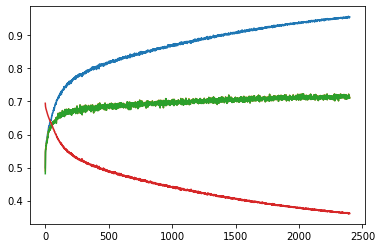

epoch: 0
train_acc: 0.954456415279138
test_acc: 0.7164309031556039
f1: 0.7157636890748733

epoch: 1
train_acc: 0.9552181956687343
test_acc: 0.7138193688792165
f1: 0.7136564335091348

epoch: 2
train_acc: 0.9555990858635325
test_acc: 0.7168661588683352
f1: 0.7168799191743902

epoch: 3
train_acc: 0.9560888018282729
test_acc: 0.7153427638737758
f1: 0.7152689144067577

epoch: 4
train_acc: 0.9549461312438785
test_acc: 0.719260065288357
f1: 0.7190369356691065

epoch: 5
train_acc: 0.9546196539340516
test_acc: 0.7149075081610446
f1: 0.7145322137048343

epoch: 6
train_acc: 0.9560343889433017
test_acc: 0.7127312295973884
f1: 0.7126654734098957

epoch: 7
train_acc: 0.9548373054739362
test_acc: 0.7138193688792165
f1: 0.7138271775290479

epoch: 8
train_acc: 0.9553270214386766
test_acc: 0.7040261153427638
f1: 0.703798381188814

epoch: 9
train_acc: 0.955435847208619
test_acc: 0.7179542981501632
f1: 0.7174550201076958

epoch: 10
train_acc: 0.9552726085537055
test_acc: 0.711860718171926
f1: 0.7115610182

epoch: 89
train_acc: 0.9582109043421482
test_acc: 0.7094668117519043
f1: 0.70907010223225

epoch: 90
train_acc: 0.957449123952552
test_acc: 0.7144722524483134
f1: 0.7142152745717508

epoch: 91
train_acc: 0.9570138208727826
test_acc: 0.7181719260065288
f1: 0.7180874523162971

epoch: 92
train_acc: 0.9576123626074654
test_acc: 0.7179542981501632
f1: 0.7178370691052149

epoch: 93
train_acc: 0.9579388399172925
test_acc: 0.7140369967355822
f1: 0.7136697720360597

epoch: 94
train_acc: 0.9590270976167157
test_acc: 0.7103373231773668
f1: 0.710125252943854

epoch: 95
train_acc: 0.9583197301120906
test_acc: 0.7186071817192601
f1: 0.7185922765834927

epoch: 96
train_acc: 0.9600065295461966
test_acc: 0.7144722524483134
f1: 0.7143128048121467

epoch: 97
train_acc: 0.9583197301120906
test_acc: 0.7077257889009794
f1: 0.7075593841846144

epoch: 98
train_acc: 0.9596256393513984
test_acc: 0.712948857453754
f1: 0.7126544345863152

epoch: 99
train_acc: 0.9582109043421482
test_acc: 0.7225244831338411
f1: 0.

epoch: 177
train_acc: 0.9613124387855044
test_acc: 0.7125136017410229
f1: 0.7123561703604142

epoch: 178
train_acc: 0.9601153553161389
test_acc: 0.7225244831338411
f1: 0.7224709654877663

epoch: 179
train_acc: 0.9610403743606486
test_acc: 0.726006528835691
f1: 0.7259288985202852

epoch: 180
train_acc: 0.959135923386658
test_acc: 0.7170837867247007
f1: 0.7169869127840879

epoch: 181
train_acc: 0.9600065295461966
test_acc: 0.723177366702938
f1: 0.7229913839769162

epoch: 182
train_acc: 0.9596256393513984
test_acc: 0.7096844396082699
f1: 0.7095285719409749

epoch: 183
train_acc: 0.9609859614756774
test_acc: 0.7177366702937976
f1: 0.717530017331464

epoch: 184
train_acc: 0.9606594841658505
test_acc: 0.7162132752992383
f1: 0.7158929447725431

epoch: 185
train_acc: 0.9616389160953314
test_acc: 0.7114254624591948
f1: 0.7111498999478479

epoch: 186
train_acc: 0.9607683099357928
test_acc: 0.7096844396082699
f1: 0.7095998171381459

epoch: 187
train_acc: 0.9611492001305909
test_acc: 0.71773667029

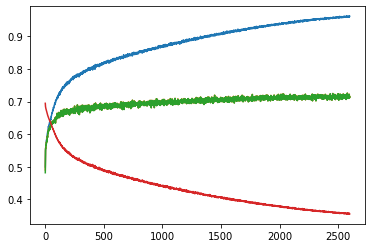

epoch: 0
train_acc: 0.9626183480248123
test_acc: 0.7149075081610446
f1: 0.7147890127529566

epoch: 1
train_acc: 0.9603330068560235
test_acc: 0.7210010881392819
f1: 0.7209197642961791

epoch: 2
train_acc: 0.961530090325389
test_acc: 0.7105549510337323
f1: 0.7103869707623479

epoch: 3
train_acc: 0.9604418326259658
test_acc: 0.7186071817192601
f1: 0.7182592266506562

epoch: 4
train_acc: 0.961530090325389
test_acc: 0.714689880304679
f1: 0.7145896700633811

epoch: 5
train_acc: 0.9617477418652737
test_acc: 0.712948857453754
f1: 0.7128974388793669

epoch: 6
train_acc: 0.9601153553161389
test_acc: 0.720348204570185
f1: 0.7200772575834764

epoch: 7
train_acc: 0.9605506583959081
test_acc: 0.7144722524483134
f1: 0.7142937009380784

epoch: 8
train_acc: 0.9607138970508217
test_acc: 0.7159956474428727
f1: 0.7157735367475998

epoch: 9
train_acc: 0.9607138970508217
test_acc: 0.7149075081610446
f1: 0.7147483035852988

epoch: 10
train_acc: 0.9600065295461966
test_acc: 0.7166485310119696
f1: 0.7164840871

epoch: 90
train_acc: 0.9622918707149853
test_acc: 0.70620239390642
f1: 0.7059379730730668

epoch: 91
train_acc: 0.9634889541843509
test_acc: 0.7162132752992383
f1: 0.716048578852708

epoch: 92
train_acc: 0.9634345412993797
test_acc: 0.7127312295973884
f1: 0.7126172524261852

epoch: 93
train_acc: 0.9622918707149853
test_acc: 0.7244831338411316
f1: 0.7244672344621463

epoch: 94
train_acc: 0.9645227989988029
test_acc: 0.711860718171926
f1: 0.7115855712903097

epoch: 95
train_acc: 0.9638154314941778
test_acc: 0.7201305767138194
f1: 0.719814667927523

epoch: 96
train_acc: 0.964196321688976
test_acc: 0.721436343852013
f1: 0.7211625348521467

epoch: 97
train_acc: 0.9633257155294374
test_acc: 0.7159956474428727
f1: 0.7159008789973389

epoch: 98
train_acc: 0.9626183480248123
test_acc: 0.7233949945593036
f1: 0.7233120864046435

epoch: 99
train_acc: 0.963216889759495
test_acc: 0.7238302502720348
f1: 0.7236669078829733

epoch: 100
train_acc: 0.9629448253346392
test_acc: 0.7207834602829162
f1: 0.72

epoch: 178
train_acc: 0.964196321688976
test_acc: 0.7190424374319913
f1: 0.7189004715184688

epoch: 179
train_acc: 0.9651757536184569
test_acc: 0.7196953210010881
f1: 0.719493534811282

epoch: 180
train_acc: 0.9663184242028512
test_acc: 0.7181719260065288
f1: 0.717992451394846

epoch: 181
train_acc: 0.9661551855479378
test_acc: 0.7181719260065288
f1: 0.7180574608543169

epoch: 182
train_acc: 0.9657742953531396
test_acc: 0.7188248095756257
f1: 0.7187905157328314

epoch: 183
train_acc: 0.9653934051583415
test_acc: 0.7072905331882481
f1: 0.7071486557603759

epoch: 184
train_acc: 0.9643595603438895
test_acc: 0.714689880304679
f1: 0.7145015534445102

epoch: 185
train_acc: 0.9643595603438895
test_acc: 0.7229597388465724
f1: 0.7226990324991177

epoch: 186
train_acc: 0.9649581020785722
test_acc: 0.7201305767138194
f1: 0.7200489991301766

epoch: 187
train_acc: 0.9656654695831973
test_acc: 0.7151251360174102
f1: 0.7150620345869418

epoch: 188
train_acc: 0.9654478180433127
test_acc: 0.71229597388

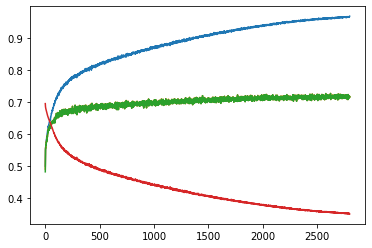

epoch: 0
train_acc: 0.9644683861138318
test_acc: 0.7194776931447225
f1: 0.7193529540613722

epoch: 1
train_acc: 0.9662095984329089
test_acc: 0.7216539717083786
f1: 0.7215658694404058

epoch: 2
train_acc: 0.9661551855479378
test_acc: 0.7159956474428727
f1: 0.7159832145813964

epoch: 3
train_acc: 0.9662095984329089
test_acc: 0.7127312295973884
f1: 0.7125645123355633

epoch: 4
train_acc: 0.9650669278485146
test_acc: 0.7177366702937976
f1: 0.7173964652985707

epoch: 5
train_acc: 0.9660463597779955
test_acc: 0.7109902067464635
f1: 0.7107960361016861

epoch: 6
train_acc: 0.9659375340080532
test_acc: 0.7181719260065288
f1: 0.7180627273365386

epoch: 7
train_acc: 0.9644139732288606
test_acc: 0.717519042437432
f1: 0.7174811888167807

epoch: 8
train_acc: 0.9655022309282838
test_acc: 0.7122959738846573
f1: 0.7122121126361536

epoch: 9
train_acc: 0.965230166503428
test_acc: 0.7220892274211099
f1: 0.7219370397806577

epoch: 10
train_acc: 0.9657742953531396
test_acc: 0.7114254624591948
f1: 0.7112383

epoch: 90
train_acc: 0.9670802045924475
test_acc: 0.7170837867247007
f1: 0.7170311776997177

epoch: 91
train_acc: 0.9681684622918707
test_acc: 0.7266594124047878
f1: 0.7263829733343496

epoch: 92
train_acc: 0.9678963978670149
test_acc: 0.7159956474428727
f1: 0.7157877198284971

epoch: 93
train_acc: 0.9675155076722168
test_acc: 0.7179542981501632
f1: 0.7174655146993605

epoch: 94
train_acc: 0.9676787463271302
test_acc: 0.7138193688792165
f1: 0.7135882466129576

epoch: 95
train_acc: 0.9669713788225052
test_acc: 0.7144722524483134
f1: 0.7144741731916402

epoch: 96
train_acc: 0.968930242681467
test_acc: 0.7186071817192601
f1: 0.7185605380230953

epoch: 97
train_acc: 0.9665360757427359
test_acc: 0.7157780195865071
f1: 0.7154485817037569

epoch: 98
train_acc: 0.9670257917074764
test_acc: 0.7177366702937976
f1: 0.717369661868031

epoch: 99
train_acc: 0.9676243334421591
test_acc: 0.7131664853101197
f1: 0.7130875290214755

epoch: 100
train_acc: 0.9666993143976493
test_acc: 0.7157780195865071
f1

epoch: 178
train_acc: 0.9681140494068996
test_acc: 0.7151251360174102
f1: 0.71487258763069

epoch: 179
train_acc: 0.9687670040265535
test_acc: 0.7157780195865071
f1: 0.7156002846228129

epoch: 180
train_acc: 0.9686581782566112
test_acc: 0.720348204570185
f1: 0.720212656246902

epoch: 181
train_acc: 0.9686037653716401
test_acc: 0.7183895538628945
f1: 0.7181799032762027

epoch: 182
train_acc: 0.9686037653716401
test_acc: 0.7168661588683352
f1: 0.7165422872951815

epoch: 183
train_acc: 0.9694199586462074
test_acc: 0.7188248095756257
f1: 0.7187132501019934

epoch: 184
train_acc: 0.9690934813363804
test_acc: 0.7127312295973884
f1: 0.7126778112027903

epoch: 185
train_acc: 0.9692023071063228
test_acc: 0.7159956474428727
f1: 0.7159105214461526

epoch: 186
train_acc: 0.9694199586462074
test_acc: 0.7205658324265506
f1: 0.7204889129465664

epoch: 187
train_acc: 0.9701817390358036
test_acc: 0.7094668117519043
f1: 0.7092750372604277

epoch: 188
train_acc: 0.9703449776907171
test_acc: 0.72317736670

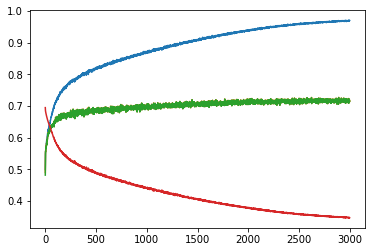

epoch: 0
train_acc: 0.9693655457612362
test_acc: 0.7162132752992383
f1: 0.7161110699888057

epoch: 1
train_acc: 0.9688758297964958
test_acc: 0.7159956474428727
f1: 0.7157662827603875

epoch: 2
train_acc: 0.9684405267167265
test_acc: 0.7155603917301414
f1: 0.7151905536326265

epoch: 3
train_acc: 0.9692567199912939
test_acc: 0.7077257889009794
f1: 0.7074897454001535

epoch: 4
train_acc: 0.9681684622918707
test_acc: 0.7196953210010881
f1: 0.7196644012585678

epoch: 5
train_acc: 0.9690934813363804
test_acc: 0.7144722524483134
f1: 0.7143694201114363

epoch: 6
train_acc: 0.9695287844161498
test_acc: 0.7186071817192601
f1: 0.7182503197356238

epoch: 7
train_acc: 0.9676787463271302
test_acc: 0.7096844396082699
f1: 0.7094072145780009

epoch: 8
train_acc: 0.9695287844161498
test_acc: 0.7159956474428727
f1: 0.7158693600078283

epoch: 9
train_acc: 0.9696920230710633
test_acc: 0.7170837867247007
f1: 0.7169818949274902

epoch: 10
train_acc: 0.9683317009467842
test_acc: 0.7183895538628945
f1: 0.71827

epoch: 90
train_acc: 0.9704538034606595
test_acc: 0.7190424374319913
f1: 0.7189437559510486

epoch: 91
train_acc: 0.9690934813363804
test_acc: 0.7151251360174102
f1: 0.7149235214462624

epoch: 92
train_acc: 0.9709435194253999
test_acc: 0.7140369967355822
f1: 0.7138448730704936

epoch: 93
train_acc: 0.9695831973011209
test_acc: 0.7164309031556039
f1: 0.71632622107311

epoch: 94
train_acc: 0.9713244096201981
test_acc: 0.712948857453754
f1: 0.7128974388793669

epoch: 95
train_acc: 0.971977364239852
test_acc: 0.7188248095756257
f1: 0.7186738492861617

epoch: 96
train_acc: 0.9705082163456307
test_acc: 0.717519042437432
f1: 0.7172169884684522

epoch: 97
train_acc: 0.9694743715311785
test_acc: 0.7136017410228509
f1: 0.7132430775174888

epoch: 98
train_acc: 0.9703449776907171
test_acc: 0.7194776931447225
f1: 0.7193054666681177

epoch: 99
train_acc: 0.9708891065404288
test_acc: 0.7186071817192601
f1: 0.7185677401487127

epoch: 100
train_acc: 0.970617042115573
test_acc: 0.7181719260065288
f1: 0.

epoch: 178
train_acc: 0.9709435194253999
test_acc: 0.712948857453754
f1: 0.7127977930974353

epoch: 179
train_acc: 0.972303841549679
test_acc: 0.7125136017410229
f1: 0.7123499229395949

epoch: 180
train_acc: 0.9714332353901404
test_acc: 0.7168661588683352
f1: 0.7166923290420644

epoch: 181
train_acc: 0.9709435194253999
test_acc: 0.7166485310119696
f1: 0.7163779560573892

epoch: 182
train_acc: 0.9720861900097943
test_acc: 0.7223068552774755
f1: 0.7220493590669524

epoch: 183
train_acc: 0.9704538034606595
test_acc: 0.7170837867247007
f1: 0.7169257974510599

epoch: 184
train_acc: 0.9718141255849385
test_acc: 0.7116430903155604
f1: 0.7115148674408984

epoch: 185
train_acc: 0.9718685384699097
test_acc: 0.711860718171926
f1: 0.7116934957062769

epoch: 186
train_acc: 0.9715420611600827
test_acc: 0.7149075081610446
f1: 0.714754444709653

epoch: 187
train_acc: 0.971650886930025
test_acc: 0.7188248095756257
f1: 0.7187836394002185

epoch: 188
train_acc: 0.9708891065404288
test_acc: 0.717519042437

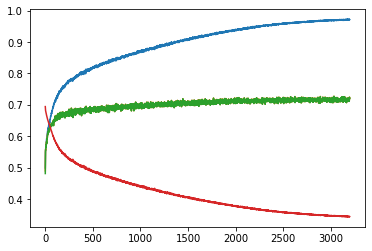

epoch: 0
train_acc: 0.9712699967352268
test_acc: 0.7179542981501632
f1: 0.717862617471517

epoch: 1
train_acc: 0.9704538034606595
test_acc: 0.7177366702937976
f1: 0.7176822292059867

epoch: 2
train_acc: 0.9715964740450539
test_acc: 0.710119695321001
f1: 0.7099879349442225

epoch: 3
train_acc: 0.9702361519207748
test_acc: 0.7144722524483134
f1: 0.7142229487170956

epoch: 4
train_acc: 0.9714876482751116
test_acc: 0.7153427638737758
f1: 0.7151515174856967

epoch: 5
train_acc: 0.9703993905756884
test_acc: 0.7133841131664853
f1: 0.7132982044019794

epoch: 6
train_acc: 0.972303841549679
test_acc: 0.7131664853101197
f1: 0.713018556548768

epoch: 7
train_acc: 0.970617042115573
test_acc: 0.7075081610446137
f1: 0.7072681645650907

epoch: 8
train_acc: 0.9715420611600827
test_acc: 0.7092491838955386
f1: 0.7091112074960317

epoch: 9
train_acc: 0.9719229513548808
test_acc: 0.7201305767138194
f1: 0.7199862395460664

epoch: 10
train_acc: 0.9720317771248231
test_acc: 0.7112078346028292
f1: 0.7111012243

epoch: 90
train_acc: 0.972303841549679
test_acc: 0.7205658324265506
f1: 0.7205469793850502

epoch: 91
train_acc: 0.9726847317444771
test_acc: 0.7194776931447225
f1: 0.7194113799914329

epoch: 92
train_acc: 0.9723582544346501
test_acc: 0.7140369967355822
f1: 0.7139288270152074

epoch: 93
train_acc: 0.9715420611600827
test_acc: 0.7212187159956475
f1: 0.7207809452529502

epoch: 94
train_acc: 0.9724670802045925
test_acc: 0.712948857453754
f1: 0.7126376891467463

epoch: 95
train_acc: 0.9720317771248231
test_acc: 0.7194776931447225
f1: 0.7192290034040943

epoch: 96
train_acc: 0.9735553379040157
test_acc: 0.7229597388465724
f1: 0.7229138166306266

epoch: 97
train_acc: 0.972303841549679
test_acc: 0.7223068552774755
f1: 0.7221806343759969

epoch: 98
train_acc: 0.973337686364131
test_acc: 0.7127312295973884
f1: 0.7125890456518614

epoch: 99
train_acc: 0.9726847317444771
test_acc: 0.7153427638737758
f1: 0.7152733140104384

epoch: 100
train_acc: 0.9718685384699097
test_acc: 0.7179542981501632
f1: 

epoch: 178
train_acc: 0.9723582544346501
test_acc: 0.7199129488574537
f1: 0.7196256689253886

epoch: 179
train_acc: 0.9728479703993905
test_acc: 0.7170837867247007
f1: 0.7169495282521267

epoch: 180
train_acc: 0.9738818152138426
test_acc: 0.7151251360174102
f1: 0.715119872538753

epoch: 181
train_acc: 0.9728479703993905
test_acc: 0.7229597388465724
f1: 0.7228020074959154

epoch: 182
train_acc: 0.973337686364131
test_acc: 0.7122959738846573
f1: 0.7120212426327717

epoch: 183
train_acc: 0.9727391446294482
test_acc: 0.7127312295973884
f1: 0.7125382286552904

epoch: 184
train_acc: 0.9726847317444771
test_acc: 0.7151251360174102
f1: 0.715039749098095

epoch: 185
train_acc: 0.9740994667537273
test_acc: 0.7168661588683352
f1: 0.7166858527140498

epoch: 186
train_acc: 0.973990640983785
test_acc: 0.7105549510337323
f1: 0.7104116899371028

epoch: 187
train_acc: 0.9735553379040157
test_acc: 0.717519042437432
f1: 0.7174173073968326

epoch: 188
train_acc: 0.9738818152138426
test_acc: 0.718171926006

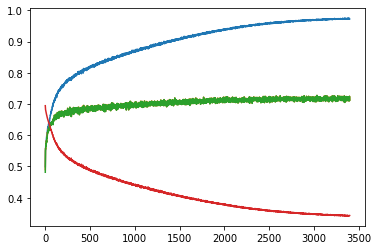

epoch: 0
train_acc: 0.9738818152138426
test_acc: 0.7153427638737758
f1: 0.715240245050121

epoch: 1
train_acc: 0.9740994667537273
test_acc: 0.7136017410228509
f1: 0.7133282566601569

epoch: 2
train_acc: 0.9731200348242464
test_acc: 0.7205658324265506
f1: 0.7204332263659468

epoch: 3
train_acc: 0.9734465121340733
test_acc: 0.7142546245919478
f1: 0.7141782439018974

epoch: 4
train_acc: 0.9732288605941887
test_acc: 0.724265505984766
f1: 0.7242302291532687

epoch: 5
train_acc: 0.9749156600282947
test_acc: 0.7181719260065288
f1: 0.7179220786720731

epoch: 6
train_acc: 0.9731744477092176
test_acc: 0.721436343852013
f1: 0.7211856337285373

epoch: 7
train_acc: 0.9738274023288714
test_acc: 0.7136017410228509
f1: 0.7134827028877029

epoch: 8
train_acc: 0.9740450538687562
test_acc: 0.7281828073993472
f1: 0.7281855115195058

epoch: 9
train_acc: 0.9723582544346501
test_acc: 0.7159956474428727
f1: 0.7159285111627773

epoch: 10
train_acc: 0.9720861900097943
test_acc: 0.7236126224156693
f1: 0.72345827

epoch: 90
train_acc: 0.9733920992491022
test_acc: 0.7131664853101197
f1: 0.7129005135189995

epoch: 91
train_acc: 0.9733920992491022
test_acc: 0.7096844396082699
f1: 0.7094893916864827

epoch: 92
train_acc: 0.9744259440635542
test_acc: 0.7170837867247007
f1: 0.7170147616311695

epoch: 93
train_acc: 0.9737729894439003
test_acc: 0.7159956474428727
f1: 0.7158014698404418

epoch: 94
train_acc: 0.9746435956034389
test_acc: 0.7173014145810663
f1: 0.7170032642862028

epoch: 95
train_acc: 0.9738274023288714
test_acc: 0.7186071817192601
f1: 0.7184344207927665

epoch: 96
train_acc: 0.9740994667537273
test_acc: 0.709031556039173
f1: 0.7087331152705865

epoch: 97
train_acc: 0.9733920992491022
test_acc: 0.7149075081610446
f1: 0.714909425976409

epoch: 98
train_acc: 0.975024485798237
test_acc: 0.7094668117519043
f1: 0.7094486416247991

epoch: 99
train_acc: 0.9749700729132659
test_acc: 0.7199129488574537
f1: 0.7198289970124127

epoch: 100
train_acc: 0.9744803569485254
test_acc: 0.7138193688792165
f1:

epoch: 178
train_acc: 0.9757318533028622
test_acc: 0.7155603917301414
f1: 0.7154888103514593

epoch: 179
train_acc: 0.9745347698334965
test_acc: 0.7183895538628945
f1: 0.7183074687981715

epoch: 180
train_acc: 0.9759495048427468
test_acc: 0.7116430903155604
f1: 0.7115366407688954

epoch: 181
train_acc: 0.9762759821525737
test_acc: 0.7166485310119696
f1: 0.7164902986779076

epoch: 182
train_acc: 0.975677440417891
test_acc: 0.7201305767138194
f1: 0.7199862395460664

epoch: 183
train_acc: 0.9761127434976602
test_acc: 0.7164309031556039
f1: 0.7161945389630714

epoch: 184
train_acc: 0.9743171182936119
test_acc: 0.7105549510337323
f1: 0.7104233884953574

epoch: 185
train_acc: 0.9751877244531505
test_acc: 0.7190424374319913
f1: 0.7189673365402511

epoch: 186
train_acc: 0.9749156600282947
test_acc: 0.7196953210010881
f1: 0.7196577590107963

epoch: 187
train_acc: 0.9756230275329199
test_acc: 0.7196953210010881
f1: 0.7195734176491788

epoch: 188
train_acc: 0.9752421373381217
test_acc: 0.71904243

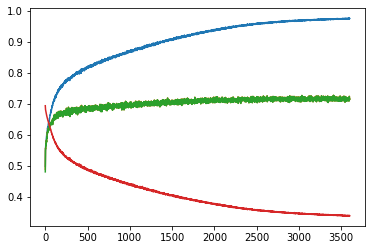

epoch: 0
train_acc: 0.9755686146479486
test_acc: 0.7207834602829162
f1: 0.7206183158501613

epoch: 1
train_acc: 0.9756230275329199
test_acc: 0.7138193688792165
f1: 0.7137137227253566

epoch: 2
train_acc: 0.9755686146479486
test_acc: 0.7207834602829162
f1: 0.7206902894663493

epoch: 3
train_acc: 0.9754053759930351
test_acc: 0.7136017410228509
f1: 0.7133439796771524

epoch: 4
train_acc: 0.9756230275329199
test_acc: 0.7114254624591948
f1: 0.711257987391634

epoch: 5
train_acc: 0.9758406790728045
test_acc: 0.720348204570185
f1: 0.7202942671778665

epoch: 6
train_acc: 0.9758406790728045
test_acc: 0.7170837867247007
f1: 0.7170423616256068

epoch: 7
train_acc: 0.9744259440635542
test_acc: 0.7144722524483134
f1: 0.7141995993450804

epoch: 8
train_acc: 0.9748612471433236
test_acc: 0.7155603917301414
f1: 0.7153082292080305

epoch: 9
train_acc: 0.9757862661878333
test_acc: 0.7096844396082699
f1: 0.7095581825652209

epoch: 10
train_acc: 0.9752421373381217
test_acc: 0.7153427638737758
f1: 0.7152076

epoch: 89
train_acc: 0.9757318533028622
test_acc: 0.712948857453754
f1: 0.7126291519045668

epoch: 90
train_acc: 0.9766568723473719
test_acc: 0.7136017410228509
f1: 0.7133202311448632

epoch: 91
train_acc: 0.9765480465774296
test_acc: 0.7142546245919478
f1: 0.7140238538424436

epoch: 92
train_acc: 0.97703776254217
test_acc: 0.7142546245919478
f1: 0.7140523939334931

epoch: 93
train_acc: 0.9764392208074872
test_acc: 0.7114254624591948
f1: 0.711341347470151

epoch: 94
train_acc: 0.9757862661878333
test_acc: 0.7218715995647443
f1: 0.721728160295391

epoch: 95
train_acc: 0.9766024594624007
test_acc: 0.7196953210010881
f1: 0.7196226007308134

epoch: 96
train_acc: 0.9762215692676026
test_acc: 0.7159956474428727
f1: 0.7158147869268524

epoch: 97
train_acc: 0.9763303950375449
test_acc: 0.7140369967355822
f1: 0.7137718321426141

epoch: 98
train_acc: 0.9768201110022854
test_acc: 0.7133841131664853
f1: 0.7132332778690843

epoch: 99
train_acc: 0.9768745238872565
test_acc: 0.7179542981501632
f1: 0.

epoch: 178
train_acc: 0.9764392208074872
test_acc: 0.7173014145810663
f1: 0.7171213856076485

epoch: 179
train_acc: 0.9764936336924583
test_acc: 0.711860718171926
f1: 0.711552613815278

epoch: 180
train_acc: 0.9768201110022854
test_acc: 0.721436343852013
f1: 0.7211546225063437

epoch: 181
train_acc: 0.9771465883121123
test_acc: 0.7144722524483134
f1: 0.7142804212088946

epoch: 182
train_acc: 0.9761671563826314
test_acc: 0.719260065288357
f1: 0.7190971370552095

epoch: 183
train_acc: 0.9768201110022854
test_acc: 0.7144722524483134
f1: 0.7143367546667616

epoch: 184
train_acc: 0.9772010011970834
test_acc: 0.7183895538628945
f1: 0.7181436704572574

epoch: 185
train_acc: 0.9764392208074872
test_acc: 0.7164309031556039
f1: 0.7163048092645213

epoch: 186
train_acc: 0.9772010011970834
test_acc: 0.7109902067464635
f1: 0.7108645175761719

epoch: 187
train_acc: 0.976384807922516
test_acc: 0.7155603917301414
f1: 0.7154654780456106

epoch: 188
train_acc: 0.9763303950375449
test_acc: 0.715125136017

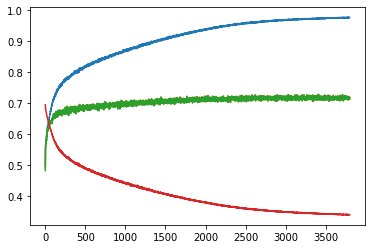

epoch: 0
train_acc: 0.97703776254217
test_acc: 0.7112078346028292
f1: 0.7110496881667446

epoch: 1
train_acc: 0.9769833496571988
test_acc: 0.7183895538628945
f1: 0.7180544984266728

epoch: 2
train_acc: 0.9769289367722277
test_acc: 0.7155603917301414
f1: 0.7152686474634677

epoch: 3
train_acc: 0.9774186527369682
test_acc: 0.7136017410228509
f1: 0.7134658301383067

epoch: 4
train_acc: 0.9770921754271411
test_acc: 0.7157780195865071
f1: 0.7156951733001637

epoch: 5
train_acc: 0.9769833496571988
test_acc: 0.7170837867247007
f1: 0.7169437570813785

epoch: 6
train_acc: 0.9770921754271411
test_acc: 0.7151251360174102
f1: 0.7150199718992332

epoch: 7
train_acc: 0.9762215692676026
test_acc: 0.7120783460282917
f1: 0.7118949908844642

epoch: 8
train_acc: 0.9779083687017086
test_acc: 0.7159956474428727
f1: 0.715736183391584

epoch: 9
train_acc: 0.9758950919577756
test_acc: 0.7170837867247007
f1: 0.7169551917623793

epoch: 10
train_acc: 0.9767112852323431
test_acc: 0.7125136017410229
f1: 0.71245409

epoch: 90
train_acc: 0.9775274785069105
test_acc: 0.7173014145810663
f1: 0.7171865958685387

epoch: 91
train_acc: 0.9772010011970834
test_acc: 0.7173014145810663
f1: 0.7171701024073521

epoch: 92
train_acc: 0.9777451300467951
test_acc: 0.7133841131664853
f1: 0.7131452093740331

epoch: 93
train_acc: 0.9777995429317663
test_acc: 0.7181719260065288
f1: 0.7180052369648939

epoch: 94
train_acc: 0.9785069104363914
test_acc: 0.7177366702937976
f1: 0.7175998561495968

epoch: 95
train_acc: 0.9780171944716509
test_acc: 0.7170837867247007
f1: 0.7169495282521267

epoch: 96
train_acc: 0.9783436717814779
test_acc: 0.7149075081610446
f1: 0.7147091766574588

epoch: 97
train_acc: 0.9775818913918816
test_acc: 0.714689880304679
f1: 0.7145630122377493

epoch: 98
train_acc: 0.9784524975514202
test_acc: 0.714689880304679
f1: 0.7145457150741382

epoch: 99
train_acc: 0.9775274785069105
test_acc: 0.7162132752992383
f1: 0.7161161032849621

epoch: 100
train_acc: 0.9780171944716509
test_acc: 0.7109902067464635
f1

epoch: 178
train_acc: 0.9785613233213625
test_acc: 0.7183895538628945
f1: 0.7183074687981715

epoch: 179
train_acc: 0.9785613233213625
test_acc: 0.7183895538628945
f1: 0.7183074687981715

epoch: 180
train_acc: 0.9783436717814779
test_acc: 0.711860718171926
f1: 0.7117239810813967

epoch: 181
train_acc: 0.9781804331265643
test_acc: 0.7159956474428727
f1: 0.715736183391584

epoch: 182
train_acc: 0.9778539558167374
test_acc: 0.7164309031556039
f1: 0.7162018899898736

epoch: 183
train_acc: 0.9789966264011318
test_acc: 0.719260065288357
f1: 0.7190073964920417

epoch: 184
train_acc: 0.9784524975514202
test_acc: 0.7177366702937976
f1: 0.7175940445851697

epoch: 185
train_acc: 0.9786701490913048
test_acc: 0.7181719260065288
f1: 0.7180295202296026

epoch: 186
train_acc: 0.9785069104363914
test_acc: 0.723177366702938
f1: 0.722928223517734

epoch: 187
train_acc: 0.9782348460115355
test_acc: 0.7164309031556039
f1: 0.7162302127154161

epoch: 188
train_acc: 0.9787789748612471
test_acc: 0.714472252448

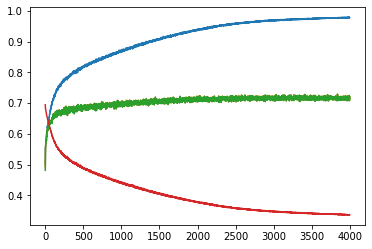

epoch: 0
train_acc: 0.9781260202415932
test_acc: 0.7116430903155604
f1: 0.7115148674408984

epoch: 1
train_acc: 0.9793231037109588
test_acc: 0.7149075081610446
f1: 0.7148962974137304

epoch: 2
train_acc: 0.9784524975514202
test_acc: 0.7149075081610446
f1: 0.7148335457743521

epoch: 3
train_acc: 0.978724561976276
test_acc: 0.7159956474428727
f1: 0.7159368586302784

epoch: 4
train_acc: 0.978724561976276
test_acc: 0.711860718171926
f1: 0.7114031543883014

epoch: 5
train_acc: 0.9781804331265643
test_acc: 0.719260065288357
f1: 0.718862713656003

epoch: 6
train_acc: 0.9776907171618239
test_acc: 0.7218715995647443
f1: 0.7216212811758366

epoch: 7
train_acc: 0.9781804331265643
test_acc: 0.7186071817192601
f1: 0.7185033030295712

epoch: 8
train_acc: 0.9782348460115355
test_acc: 0.717519042437432
f1: 0.7174878826347989

epoch: 9
train_acc: 0.978724561976276
test_acc: 0.7190424374319913
f1: 0.7188699437304421

epoch: 10
train_acc: 0.9781804331265643
test_acc: 0.7227421109902068
f1: 0.722587281502

epoch: 90
train_acc: 0.978724561976276
test_acc: 0.7107725788900979
f1: 0.7106906323538198

epoch: 91
train_acc: 0.9789966264011318
test_acc: 0.7064200217627856
f1: 0.7062330632676812

epoch: 92
train_acc: 0.9783980846664491
test_acc: 0.7173014145810663
f1: 0.7171081297492213

epoch: 93
train_acc: 0.9789966264011318
test_acc: 0.7157780195865071
f1: 0.7155593278180818

epoch: 94
train_acc: 0.9786701490913048
test_acc: 0.7136017410228509
f1: 0.7134291415979291

epoch: 95
train_acc: 0.9797039939057569
test_acc: 0.7055495103373232
f1: 0.7052474981010496

epoch: 96
train_acc: 0.9792686908259876
test_acc: 0.7138193688792165
f1: 0.7136027566256583

epoch: 97
train_acc: 0.9791054521710741
test_acc: 0.7138193688792165
f1: 0.7136501054894483

epoch: 98
train_acc: 0.9791054521710741
test_acc: 0.7205658324265506
f1: 0.7204036619991389

epoch: 99
train_acc: 0.9787789748612471
test_acc: 0.7151251360174102
f1: 0.7150349672380697

epoch: 100
train_acc: 0.9794863423658723
test_acc: 0.7183895538628945
f

epoch: 178
train_acc: 0.9798128196756992
test_acc: 0.7138193688792165
f1: 0.7136027566256583

epoch: 179
train_acc: 0.9786157362063337
test_acc: 0.7205658324265506
f1: 0.7204275262249926

epoch: 180
train_acc: 0.9794319294809011
test_acc: 0.7170837867247007
f1: 0.71701038893638

epoch: 181
train_acc: 0.979758406790728
test_acc: 0.7170837867247007
f1: 0.7169132857730303

epoch: 182
train_acc: 0.9793231037109588
test_acc: 0.7162132752992383
f1: 0.7160358125177243

epoch: 183
train_acc: 0.9793775165959299
test_acc: 0.7168661588683352
f1: 0.7167111110059795

epoch: 184
train_acc: 0.9797039939057569
test_acc: 0.7131664853101197
f1: 0.71310915042546

epoch: 185
train_acc: 0.9788878006311895
test_acc: 0.7159956474428727
f1: 0.7158856055399097

epoch: 186
train_acc: 0.9794863423658723
test_acc: 0.7159956474428727
f1: 0.7158014698404418

epoch: 187
train_acc: 0.9797039939057569
test_acc: 0.7138193688792165
f1: 0.7135882466129576

epoch: 188
train_acc: 0.9793231037109588
test_acc: 0.709684439608

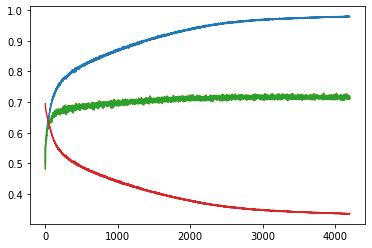

epoch: 0
train_acc: 0.9788333877462183
test_acc: 0.7151251360174102
f1: 0.7149370964598502

epoch: 1
train_acc: 0.9796495810207857
test_acc: 0.7144722524483134
f1: 0.7143642473698266

epoch: 2
train_acc: 0.9791598650560452
test_acc: 0.7149075081610446
f1: 0.7148505212878244

epoch: 3
train_acc: 0.9795951681358146
test_acc: 0.712948857453754
f1: 0.7128428899427721

epoch: 4
train_acc: 0.979758406790728
test_acc: 0.7183895538628945
f1: 0.718337187648796

epoch: 5
train_acc: 0.9793231037109588
test_acc: 0.7153427638737758
f1: 0.7151017623434319

epoch: 6
train_acc: 0.9799760583306127
test_acc: 0.7151251360174102
f1: 0.7149752169556807

epoch: 7
train_acc: 0.9789966264011318
test_acc: 0.7179542981501632
f1: 0.7178577222832139

epoch: 8
train_acc: 0.9789422135161606
test_acc: 0.7112078346028292
f1: 0.7110794181842054

epoch: 9
train_acc: 0.9794319294809011
test_acc: 0.7114254624591948
f1: 0.7112034216590937

epoch: 10
train_acc: 0.979758406790728
test_acc: 0.7218715995647443
f1: 0.721795039

epoch: 90
train_acc: 0.9791054521710741
test_acc: 0.7105549510337323
f1: 0.7104657787354405

epoch: 91
train_acc: 0.9795951681358146
test_acc: 0.7194776931447225
f1: 0.7193240753933186

epoch: 92
train_acc: 0.9799216454456415
test_acc: 0.7122959738846573
f1: 0.7120447699725612

epoch: 93
train_acc: 0.980084884100555
test_acc: 0.7088139281828074
f1: 0.708638443357165

epoch: 94
train_acc: 0.9799760583306127
test_acc: 0.711860718171926
f1: 0.7117670567378771

epoch: 95
train_acc: 0.9803569485254108
test_acc: 0.7153427638737758
f1: 0.7151775622234215

epoch: 96
train_acc: 0.9794863423658723
test_acc: 0.7055495103373232
f1: 0.7054185778471966

epoch: 97
train_acc: 0.980084884100555
test_acc: 0.7122959738846573
f1: 0.7122343461693192

epoch: 98
train_acc: 0.9793775165959299
test_acc: 0.7236126224156693
f1: 0.723446056101345

epoch: 99
train_acc: 0.9798128196756992
test_acc: 0.7168661588683352
f1: 0.7167616374644021

epoch: 100
train_acc: 0.979758406790728
test_acc: 0.7177366702937976
f1: 0.

epoch: 178
train_acc: 0.9798672325606703
test_acc: 0.7120783460282917
f1: 0.7119559160893348

epoch: 179
train_acc: 0.9810099031450648
test_acc: 0.7183895538628945
f1: 0.7183332630125533

epoch: 180
train_acc: 0.9801937098704974
test_acc: 0.7159956474428727
f1: 0.7159522592533019

epoch: 181
train_acc: 0.981064316030036
test_acc: 0.7227421109902068
f1: 0.7227049572824181

epoch: 182
train_acc: 0.9804657742953531
test_acc: 0.7166485310119696
f1: 0.716536108074919

epoch: 183
train_acc: 0.9801392969855262
test_acc: 0.7179542981501632
f1: 0.7177080347083505

epoch: 184
train_acc: 0.9806834258352378
test_acc: 0.7166485310119696
f1: 0.716320102127329

epoch: 185
train_acc: 0.9802481227554685
test_acc: 0.7159956474428727
f1: 0.7159105214461526

epoch: 186
train_acc: 0.9797039939057569
test_acc: 0.721436343852013
f1: 0.7213766740519884

epoch: 187
train_acc: 0.9801392969855262
test_acc: 0.7144722524483134
f1: 0.7143189553122631

epoch: 188
train_acc: 0.9802481227554685
test_acc: 0.72448313384

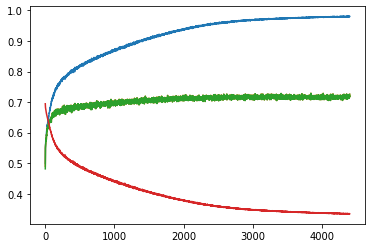

epoch: 0
train_acc: 0.9799760583306127
test_acc: 0.7181719260065288
f1: 0.7179443189078176

epoch: 1
train_acc: 0.9801937098704974
test_acc: 0.7109902067464635
f1: 0.7108094777787868

epoch: 2
train_acc: 0.9802481227554685
test_acc: 0.7173014145810663
f1: 0.7171643894667127

epoch: 3
train_acc: 0.9798128196756992
test_acc: 0.7155603917301414
f1: 0.7154973867113316

epoch: 4
train_acc: 0.980084884100555
test_acc: 0.7149075081610446
f1: 0.7148727365402547

epoch: 5
train_acc: 0.9801392969855262
test_acc: 0.7186071817192601
f1: 0.7184147896580008

epoch: 6
train_acc: 0.9806834258352378
test_acc: 0.7194776931447225
f1: 0.7191482513385659

epoch: 7
train_acc: 0.9807378387202089
test_acc: 0.7194776931447225
f1: 0.7192438685521099

epoch: 8
train_acc: 0.9803569485254108
test_acc: 0.7133841131664853
f1: 0.7131881500228826

epoch: 9
train_acc: 0.9805201871803243
test_acc: 0.7109902067464635
f1: 0.7109152280827021

epoch: 10
train_acc: 0.9798128196756992
test_acc: 0.7262241566920565
f1: 0.726187

epoch: 89
train_acc: 0.9810099031450648
test_acc: 0.7088139281828074
f1: 0.7087818081397235

epoch: 90
train_acc: 0.9807922516051801
test_acc: 0.7083786724700761
f1: 0.708288829703376

epoch: 91
train_acc: 0.9805746000652955
test_acc: 0.7190424374319913
f1: 0.7189229687613993

epoch: 92
train_acc: 0.980084884100555
test_acc: 0.7168661588683352
f1: 0.7165838501268174

epoch: 93
train_acc: 0.9805746000652955
test_acc: 0.7186071817192601
f1: 0.7184407501124384

epoch: 94
train_acc: 0.9803025356404397
test_acc: 0.7177366702937976
f1: 0.7176782418723918

epoch: 95
train_acc: 0.9811731417999783
test_acc: 0.721436343852013
f1: 0.7213845441966451

epoch: 96
train_acc: 0.980411361410382
test_acc: 0.7179542981501632
f1: 0.7179479644837452

epoch: 97
train_acc: 0.9805746000652955
test_acc: 0.707943416757345
f1: 0.7077866143514155

epoch: 98
train_acc: 0.9813363804548917
test_acc: 0.7112078346028292
f1: 0.7109116260015468

epoch: 99
train_acc: 0.9801937098704974
test_acc: 0.7131664853101197
f1: 0.

epoch: 178
train_acc: 0.981445206224834
test_acc: 0.7127312295973884
f1: 0.71262256595135

epoch: 179
train_acc: 0.9809010773751224
test_acc: 0.7216539717083786
f1: 0.7216149571927329

epoch: 180
train_acc: 0.9811731417999783
test_acc: 0.7140369967355822
f1: 0.7139838211518684

epoch: 181
train_acc: 0.9806834258352378
test_acc: 0.7244831338411316
f1: 0.7244072926716145

epoch: 182
train_acc: 0.9804657742953531
test_acc: 0.7253536452665941
f1: 0.7252177087974614

epoch: 183
train_acc: 0.9807378387202089
test_acc: 0.7162132752992383
f1: 0.7160953226182101

epoch: 184
train_acc: 0.9812275546849494
test_acc: 0.7196953210010881
f1: 0.7195387900899732

epoch: 185
train_acc: 0.9807378387202089
test_acc: 0.7127312295973884
f1: 0.7125173665568685

epoch: 186
train_acc: 0.981445206224834
test_acc: 0.7094668117519043
f1: 0.7091934080018243

epoch: 187
train_acc: 0.9810099031450648
test_acc: 0.7142546245919478
f1: 0.7141102394297053

epoch: 188
train_acc: 0.9812275546849494
test_acc: 0.71381936887

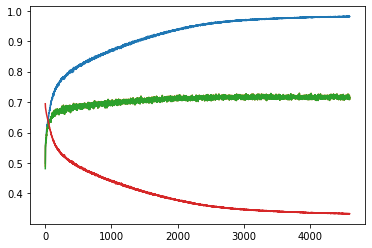

epoch: 0
train_acc: 0.9812275546849494
test_acc: 0.7157780195865071
f1: 0.7156652512640892

epoch: 1
train_acc: 0.9804657742953531
test_acc: 0.7153427638737758
f1: 0.7151647567279014

epoch: 2
train_acc: 0.9813363804548917
test_acc: 0.7159956474428727
f1: 0.7157662827603875

epoch: 3
train_acc: 0.9811187289150071
test_acc: 0.7164309031556039
f1: 0.7161561608025445

epoch: 4
train_acc: 0.9811731417999783
test_acc: 0.7186071817192601
f1: 0.7183726315266702

epoch: 5
train_acc: 0.9807922516051801
test_acc: 0.719260065288357
f1: 0.7191958035596709

epoch: 6
train_acc: 0.9810099031450648
test_acc: 0.712948857453754
f1: 0.7128212152109774

epoch: 7
train_acc: 0.9809010773751224
test_acc: 0.7181719260065288
f1: 0.7180466062912932

epoch: 8
train_acc: 0.9809010773751224
test_acc: 0.7164309031556039
f1: 0.7163048092645213

epoch: 9
train_acc: 0.9804657742953531
test_acc: 0.7094668117519043
f1: 0.7091853220808879

epoch: 10
train_acc: 0.9813907933398629
test_acc: 0.7218715995647443
f1: 0.7217763

epoch: 90
train_acc: 0.9816628577647187
test_acc: 0.7223068552774755
f1: 0.7222473719455761

epoch: 91
train_acc: 0.981445206224834
test_acc: 0.7190424374319913
f1: 0.718928325840095

epoch: 92
train_acc: 0.9812275546849494
test_acc: 0.7183895538628945
f1: 0.7183164948335966

epoch: 93
train_acc: 0.9809554902600935
test_acc: 0.7120783460282917
f1: 0.7119446077636081

epoch: 94
train_acc: 0.981445206224834
test_acc: 0.717519042437432
f1: 0.7174367036321689

epoch: 95
train_acc: 0.9809554902600935
test_acc: 0.7212187159956475
f1: 0.7211001727214192

epoch: 96
train_acc: 0.9816628577647187
test_acc: 0.7188248095756257
f1: 0.7187132501019934

epoch: 97
train_acc: 0.9819893350745457
test_acc: 0.724265505984766
f1: 0.7242366584475631

epoch: 98
train_acc: 0.9813363804548917
test_acc: 0.7173014145810663
f1: 0.7172302713439523

epoch: 99
train_acc: 0.9816084448797475
test_acc: 0.7157780195865071
f1: 0.7157171377436695

epoch: 100
train_acc: 0.981771683534661
test_acc: 0.7188248095756257
f1: 0.

epoch: 179
train_acc: 0.981771683534661
test_acc: 0.7186071817192601
f1: 0.7184344207927665

epoch: 180
train_acc: 0.9814996191098052
test_acc: 0.7188248095756257
f1: 0.7185404470923406

epoch: 181
train_acc: 0.981771683534661
test_acc: 0.7077257889009794
f1: 0.7075396619484774

epoch: 182
train_acc: 0.9815540319947763
test_acc: 0.717519042437432
f1: 0.7173292581777021

epoch: 183
train_acc: 0.9819349221895745
test_acc: 0.7159956474428727
f1: 0.7158908046818176

epoch: 184
train_acc: 0.9816084448797475
test_acc: 0.7109902067464635
f1: 0.7108912462902067

epoch: 185
train_acc: 0.9818260964196321
test_acc: 0.712948857453754
f1: 0.712893492924207

epoch: 186
train_acc: 0.9814996191098052
test_acc: 0.7190424374319913
f1: 0.7188367404586893

epoch: 187
train_acc: 0.9822069866144303
test_acc: 0.7188248095756257
f1: 0.7185717490447425

epoch: 188
train_acc: 0.982098160844488
test_acc: 0.7207834602829162
f1: 0.7205650939825061

epoch: 189
train_acc: 0.9818260964196321
test_acc: 0.7153427638737

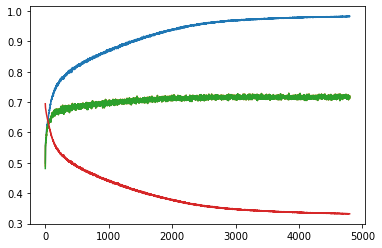

epoch: 0
train_acc: 0.9817172706496898
test_acc: 0.707943416757345
f1: 0.7078382330713014

epoch: 1
train_acc: 0.982098160844488
test_acc: 0.7138193688792165
f1: 0.7137428718438654

epoch: 2
train_acc: 0.981771683534661
test_acc: 0.720348204570185
f1: 0.7202820971985968

epoch: 3
train_acc: 0.9821525737294592
test_acc: 0.7173014145810663
f1: 0.7172345869735232

epoch: 4
train_acc: 0.9820437479595168
test_acc: 0.7207834602829162
f1: 0.7206950824800943

epoch: 5
train_acc: 0.9822069866144303
test_acc: 0.7142546245919478
f1: 0.714159275190426

epoch: 6
train_acc: 0.9818805093046034
test_acc: 0.7164309031556039
f1: 0.716336279949067

epoch: 7
train_acc: 0.982098160844488
test_acc: 0.7168661588683352
f1: 0.7166588685799804

epoch: 8
train_acc: 0.9823158123843726
test_acc: 0.7225244831338411
f1: 0.722328105304801

epoch: 9
train_acc: 0.9817172706496898
test_acc: 0.7196953210010881
f1: 0.7196735667779629

epoch: 10
train_acc: 0.981445206224834
test_acc: 0.7170837867247007
f1: 0.71696074762727

epoch: 90
train_acc: 0.9822613994994015
test_acc: 0.7096844396082699
f1: 0.7095223183074723

epoch: 91
train_acc: 0.9820437479595168
test_acc: 0.7157780195865071
f1: 0.7155066133724657

epoch: 92
train_acc: 0.9825878768092284
test_acc: 0.7153427638737758
f1: 0.715130845042715

epoch: 93
train_acc: 0.9822613994994015
test_acc: 0.7273122959738847
f1: 0.7271448795462773

epoch: 94
train_acc: 0.982098160844488
test_acc: 0.7109902067464635
f1: 0.7107455201774293

epoch: 95
train_acc: 0.981771683534661
test_acc: 0.7205658324265506
f1: 0.7203974299481316

epoch: 96
train_acc: 0.9825334639242572
test_acc: 0.7177366702937976
f1: 0.7176699455771052

epoch: 97
train_acc: 0.9824790510392861
test_acc: 0.7092491838955386
f1: 0.7091338251828662

epoch: 98
train_acc: 0.9824246381543149
test_acc: 0.7162132752992383
f1: 0.7161605044003323

epoch: 99
train_acc: 0.9821525737294592
test_acc: 0.7168661588683352
f1: 0.7167992283699411

epoch: 100
train_acc: 0.9818260964196321
test_acc: 0.7229597388465724
f1:

epoch: 178
train_acc: 0.9823702252693438
test_acc: 0.7157780195865071
f1: 0.7154986488413309

epoch: 179
train_acc: 0.9829143541190554
test_acc: 0.7133841131664853
f1: 0.7130648923868949

epoch: 180
train_acc: 0.9825878768092284
test_acc: 0.7205658324265506
f1: 0.7204976568726318

epoch: 181
train_acc: 0.9829143541190554
test_acc: 0.714689880304679
f1: 0.7146136159599297

epoch: 182
train_acc: 0.9824790510392861
test_acc: 0.7168661588683352
f1: 0.7168264732664155

epoch: 183
train_acc: 0.9825878768092284
test_acc: 0.7186071817192601
f1: 0.7185808626266764

epoch: 184
train_acc: 0.982098160844488
test_acc: 0.7188248095756257
f1: 0.7187800411237552

epoch: 185
train_acc: 0.9825334639242572
test_acc: 0.7229597388465724
f1: 0.7228254563442073

epoch: 186
train_acc: 0.9820437479595168
test_acc: 0.7109902067464635
f1: 0.7107061299091021

epoch: 187
train_acc: 0.981771683534661
test_acc: 0.7120783460282917
f1: 0.7118153031625023

epoch: 188
train_acc: 0.9821525737294592
test_acc: 0.7136017410

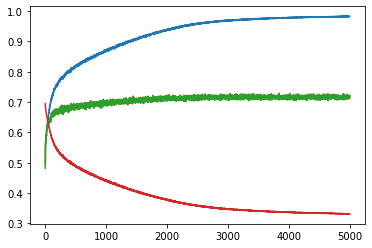

epoch: 0
train_acc: 0.9826422896941995
test_acc: 0.7168661588683352
f1: 0.7166657764718009

epoch: 1
train_acc: 0.9819893350745457
test_acc: 0.714689880304679
f1: 0.7146136159599297

epoch: 2
train_acc: 0.98313200565894
test_acc: 0.7199129488574537
f1: 0.7198044247738419

epoch: 3
train_acc: 0.9829143541190554
test_acc: 0.7155603917301414
f1: 0.7152848059623375

epoch: 4
train_acc: 0.9823158123843726
test_acc: 0.7157780195865071
f1: 0.7155937292674547

epoch: 5
train_acc: 0.9828599412340843
test_acc: 0.7140369967355822
f1: 0.7138773060389945

epoch: 6
train_acc: 0.9826967025791707
test_acc: 0.7207834602829162
f1: 0.7206752734924935

epoch: 7
train_acc: 0.9828599412340843
test_acc: 0.7168661588683352
f1: 0.7168115498820268

epoch: 8
train_acc: 0.9824790510392861
test_acc: 0.7151251360174102
f1: 0.7149370964598502

epoch: 9
train_acc: 0.982751115464142
test_acc: 0.7190424374319913
f1: 0.7189229687613993

epoch: 10
train_acc: 0.9823158123843726
test_acc: 0.7120783460282917
f1: 0.711950316

epoch: 90
train_acc: 0.9824246381543149
test_acc: 0.7164309031556039
f1: 0.716275616941423

epoch: 91
train_acc: 0.9826422896941995
test_acc: 0.7155603917301414
f1: 0.7151335939426298

epoch: 92
train_acc: 0.9826967025791707
test_acc: 0.7149075081610446
f1: 0.7145322137048343

epoch: 93
train_acc: 0.9830775927739689
test_acc: 0.7247007616974973
f1: 0.724550004167997

epoch: 94
train_acc: 0.982751115464142
test_acc: 0.7201305767138194
f1: 0.720057969363219

epoch: 95
train_acc: 0.9825878768092284
test_acc: 0.714689880304679
f1: 0.7145740009112043

epoch: 96
train_acc: 0.98313200565894
test_acc: 0.7181719260065288
f1: 0.718011468740935

epoch: 97
train_acc: 0.9826967025791707
test_acc: 0.7144722524483134
f1: 0.7143249971107615

epoch: 98
train_acc: 0.9826967025791707
test_acc: 0.712948857453754
f1: 0.7127660566716616

epoch: 99
train_acc: 0.9830231798889977
test_acc: 0.7196953210010881
f1: 0.7196735667779629

epoch: 100
train_acc: 0.9824246381543149
test_acc: 0.7131664853101197
f1: 0.713

epoch: 178
train_acc: 0.9832952443138535
test_acc: 0.7173014145810663
f1: 0.7172718384557101

epoch: 179
train_acc: 0.9830231798889977
test_acc: 0.7140369967355822
f1: 0.7139876978534989

epoch: 180
train_acc: 0.98313200565894
test_acc: 0.7155603917301414
f1: 0.7153726394751904

epoch: 181
train_acc: 0.9834040700837958
test_acc: 0.7131664853101197
f1: 0.7128681435661133

epoch: 182
train_acc: 0.9832408314288824
test_acc: 0.7177366702937976
f1: 0.7176055602943308

epoch: 183
train_acc: 0.9829687670040266
test_acc: 0.709031556039173
f1: 0.7089537792055117

epoch: 184
train_acc: 0.9832408314288824
test_acc: 0.7144722524483134
f1: 0.7143642473698266

epoch: 185
train_acc: 0.9829143541190554
test_acc: 0.7144722524483134
f1: 0.7143535761312052

epoch: 186
train_acc: 0.9828055283491131
test_acc: 0.7133841131664853
f1: 0.7133603751303258

epoch: 187
train_acc: 0.98313200565894
test_acc: 0.7170837867247007
f1: 0.7169003430686761

epoch: 188
train_acc: 0.982751115464142
test_acc: 0.7120783460282

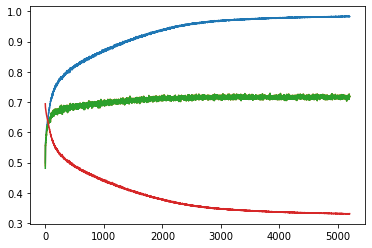

epoch: 0
train_acc: 0.9826422896941995
test_acc: 0.7157780195865071
f1: 0.7157212067190067

epoch: 1
train_acc: 0.9839481989335075
test_acc: 0.7212187159956475
f1: 0.7210346986746128

epoch: 2
train_acc: 0.98313200565894
test_acc: 0.714689880304679
f1: 0.7145274405554949

epoch: 3
train_acc: 0.9836761345086517
test_acc: 0.7168661588683352
f1: 0.7167511633756497

epoch: 4
train_acc: 0.983784960278594
test_acc: 0.7138193688792165
f1: 0.7136976792573508

epoch: 5
train_acc: 0.9832408314288824
test_acc: 0.7116430903155604
f1: 0.7115259734609805

epoch: 6
train_acc: 0.9830775927739689
test_acc: 0.7149075081610446
f1: 0.7148244081341613

epoch: 7
train_acc: 0.98313200565894
test_acc: 0.7164309031556039
f1: 0.716336279949067

epoch: 8
train_acc: 0.9832952443138535
test_acc: 0.7201305767138194
f1: 0.7200142522139711

epoch: 9
train_acc: 0.9835128958537381
test_acc: 0.7183895538628945
f1: 0.7182778216965785

epoch: 10
train_acc: 0.983458482968767
test_acc: 0.7223068552774755
f1: 0.7221966773453

epoch: 89
train_acc: 0.9828599412340843
test_acc: 0.7164309031556039
f1: 0.7162694546482149

epoch: 90
train_acc: 0.9834040700837958
test_acc: 0.7136017410228509
f1: 0.7134025011306993

epoch: 91
train_acc: 0.9832952443138535
test_acc: 0.7166485310119696
f1: 0.7164086349932327

epoch: 92
train_acc: 0.9832952443138535
test_acc: 0.7149075081610446
f1: 0.71472922883299

epoch: 93
train_acc: 0.9830775927739689
test_acc: 0.7114254624591948
f1: 0.7113109672099406

epoch: 94
train_acc: 0.9834040700837958
test_acc: 0.7170837867247007
f1: 0.7170231845840507

epoch: 95
train_acc: 0.9833496571988247
test_acc: 0.7190424374319913
f1: 0.7190275553513449

epoch: 96
train_acc: 0.9834040700837958
test_acc: 0.7220892274211099
f1: 0.7219656496015301

epoch: 97
train_acc: 0.9836761345086517
test_acc: 0.7229597388465724
f1: 0.7227359984321635

epoch: 98
train_acc: 0.9833496571988247
test_acc: 0.7142546245919478
f1: 0.7139777737020268

epoch: 99
train_acc: 0.9825878768092284
test_acc: 0.723177366702938
f1: 

epoch: 177
train_acc: 0.9838937860485363
test_acc: 0.7114254624591948
f1: 0.7113163048874925

epoch: 178
train_acc: 0.9839481989335075
test_acc: 0.7138193688792165
f1: 0.713831162785105

epoch: 179
train_acc: 0.9835128958537381
test_acc: 0.7177366702937976
f1: 0.7176166463853871

epoch: 180
train_acc: 0.9837305473936228
test_acc: 0.7155603917301414
f1: 0.7154703607182253

epoch: 181
train_acc: 0.9836217216236804
test_acc: 0.7201305767138194
f1: 0.7200247119798758

epoch: 182
train_acc: 0.9836761345086517
test_acc: 0.7201305767138194
f1: 0.7199358787644977

epoch: 183
train_acc: 0.9835673087387093
test_acc: 0.7168661588683352
f1: 0.7167765411586927

epoch: 184
train_acc: 0.9833496571988247
test_acc: 0.7177366702937976
f1: 0.7175369039845702

epoch: 185
train_acc: 0.9836761345086517
test_acc: 0.7218715995647443
f1: 0.7216361255924358

epoch: 186
train_acc: 0.9833496571988247
test_acc: 0.7144722524483134
f1: 0.7142229487170956

epoch: 187
train_acc: 0.9835128958537381
test_acc: 0.72383025

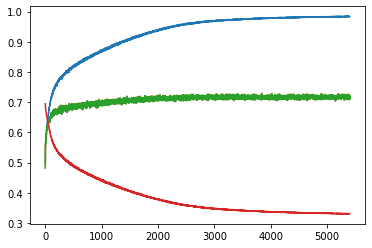

epoch: 0
train_acc: 0.9838393731635652
test_acc: 0.7099020674646355
f1: 0.7097842434894243

epoch: 1
train_acc: 0.9832408314288824
test_acc: 0.7157780195865071
f1: 0.7157251677506394

epoch: 2
train_acc: 0.9832408314288824
test_acc: 0.7136017410228509
f1: 0.7135182603851575

epoch: 3
train_acc: 0.9839481989335075
test_acc: 0.7201305767138194
f1: 0.7200489991301766

epoch: 4
train_acc: 0.9836761345086517
test_acc: 0.7183895538628945
f1: 0.718337187648796

epoch: 5
train_acc: 0.9839481989335075
test_acc: 0.7166485310119696
f1: 0.7163935118082466

epoch: 6
train_acc: 0.9835673087387093
test_acc: 0.7220892274211099
f1: 0.7218353304145997

epoch: 7
train_acc: 0.9840026118184786
test_acc: 0.717519042437432
f1: 0.717396192630927

epoch: 8
train_acc: 0.9840026118184786
test_acc: 0.7155603917301414
f1: 0.7155094409517305

epoch: 9
train_acc: 0.9830775927739689
test_acc: 0.7077257889009794
f1: 0.7076811373005244

epoch: 10
train_acc: 0.9832952443138535
test_acc: 0.7190424374319913
f1: 0.71886351

epoch: 90
train_acc: 0.9837305473936228
test_acc: 0.7168661588683352
f1: 0.716756454258561

epoch: 91
train_acc: 0.9839481989335075
test_acc: 0.7186071817192601
f1: 0.7184279842884446

epoch: 92
train_acc: 0.9839481989335075
test_acc: 0.7133841131664853
f1: 0.7132933933174466

epoch: 93
train_acc: 0.9843835020132767
test_acc: 0.7159956474428727
f1: 0.715905754198381

epoch: 94
train_acc: 0.9841114375884209
test_acc: 0.712948857453754
f1: 0.712857999837291

epoch: 95
train_acc: 0.9837305473936228
test_acc: 0.7072905331882481
f1: 0.7072381010559122

epoch: 96
train_acc: 0.983784960278594
test_acc: 0.7201305767138194
f1: 0.7200347460310287

epoch: 97
train_acc: 0.9838393731635652
test_acc: 0.7114254624591948
f1: 0.711282632223006

epoch: 98
train_acc: 0.9842746762433344
test_acc: 0.7210010881392819
f1: 0.7208329479700192

epoch: 99
train_acc: 0.9835673087387093
test_acc: 0.7205658324265506
f1: 0.7204549637236528

epoch: 100
train_acc: 0.9839481989335075
test_acc: 0.7190424374319913
f1: 0.

epoch: 178
train_acc: 0.9841658504733921
test_acc: 0.7205658324265506
f1: 0.7203437406194826

epoch: 179
train_acc: 0.9838393731635652
test_acc: 0.7112078346028292
f1: 0.7110794181842054

epoch: 180
train_acc: 0.9840570247034498
test_acc: 0.7157780195865071
f1: 0.7157212067190067

epoch: 181
train_acc: 0.9843835020132767
test_acc: 0.7220892274211099
f1: 0.7220356258257864

epoch: 182
train_acc: 0.9841658504733921
test_acc: 0.711860718171926
f1: 0.7117181033659578

epoch: 183
train_acc: 0.9840570247034498
test_acc: 0.7142546245919478
f1: 0.7139935699564366

epoch: 184
train_acc: 0.9841114375884209
test_acc: 0.7179542981501632
f1: 0.7177301307187303

epoch: 185
train_acc: 0.9840026118184786
test_acc: 0.7190424374319913
f1: 0.7188155333667894

epoch: 186
train_acc: 0.9840570247034498
test_acc: 0.714689880304679
f1: 0.7144292233152233

epoch: 187
train_acc: 0.9845467406681903
test_acc: 0.7284004352557127
f1: 0.7281845703217402

epoch: 188
train_acc: 0.9837305473936228
test_acc: 0.717736670

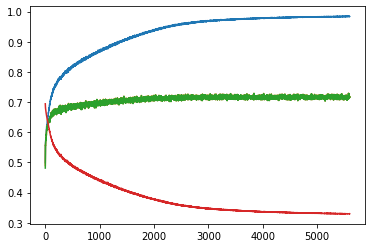

epoch: 0
train_acc: 0.983784960278594
test_acc: 0.7233949945593036
f1: 0.7233454471688213

epoch: 1
train_acc: 0.9840570247034498
test_acc: 0.7194776931447225
f1: 0.7193240753933186

epoch: 2
train_acc: 0.983784960278594
test_acc: 0.7125136017410229
f1: 0.7123238383678091

epoch: 3
train_acc: 0.9846011535531614
test_acc: 0.7138193688792165
f1: 0.7137287867976024

epoch: 4
train_acc: 0.983784960278594
test_acc: 0.7196953210010881
f1: 0.7196136165471753

epoch: 5
train_acc: 0.9839481989335075
test_acc: 0.7136017410228509
f1: 0.7134985951727516

epoch: 6
train_acc: 0.9840570247034498
test_acc: 0.7194776931447225
f1: 0.7194196251145049

epoch: 7
train_acc: 0.9840570247034498
test_acc: 0.7107725788900979
f1: 0.7107042079197939

epoch: 8
train_acc: 0.9841658504733921
test_acc: 0.7210010881392819
f1: 0.7206691398632105

epoch: 9
train_acc: 0.9841658504733921
test_acc: 0.7127312295973884
f1: 0.7126006562510312

epoch: 10
train_acc: 0.9837305473936228
test_acc: 0.7181719260065288
f1: 0.71800523

epoch: 90
train_acc: 0.9841114375884209
test_acc: 0.7168661588683352
f1: 0.716766713007215

epoch: 91
train_acc: 0.984437914898248
test_acc: 0.7210010881392819
f1: 0.7208851254574735

epoch: 92
train_acc: 0.9842202633583632
test_acc: 0.7166485310119696
f1: 0.7165253026236262

epoch: 93
train_acc: 0.9845467406681903
test_acc: 0.7142546245919478
f1: 0.7141491391166487

epoch: 94
train_acc: 0.9840570247034498
test_acc: 0.7216539717083786
f1: 0.721384289843787

epoch: 95
train_acc: 0.9843835020132767
test_acc: 0.7181719260065288
f1: 0.7179586082359147

epoch: 96
train_acc: 0.984437914898248
test_acc: 0.7225244831338411
f1: 0.7224709654877663

epoch: 97
train_acc: 0.9840026118184786
test_acc: 0.7166485310119696
f1: 0.716551508034525

epoch: 98
train_acc: 0.9842746762433344
test_acc: 0.7201305767138194
f1: 0.7199491086048597

epoch: 99
train_acc: 0.984437914898248
test_acc: 0.7164309031556039
f1: 0.7163157308827606

epoch: 100
train_acc: 0.9842746762433344
test_acc: 0.7140369967355822
f1: 0.

epoch: 178
train_acc: 0.9845467406681903
test_acc: 0.7153427638737758
f1: 0.7152776054698059

epoch: 179
train_acc: 0.984437914898248
test_acc: 0.7166485310119696
f1: 0.716536108074919

epoch: 180
train_acc: 0.9845467406681903
test_acc: 0.714689880304679
f1: 0.7145081882460563

epoch: 181
train_acc: 0.9845467406681903
test_acc: 0.7131664853101197
f1: 0.7130875290214755

epoch: 182
train_acc: 0.9841658504733921
test_acc: 0.7099020674646355
f1: 0.7096677815475835

epoch: 183
train_acc: 0.9845467406681903
test_acc: 0.7216539717083786
f1: 0.7214219611157087

epoch: 184
train_acc: 0.9847099793231037
test_acc: 0.7166485310119696
f1: 0.7165750203039745

epoch: 185
train_acc: 0.984818805093046
test_acc: 0.7120783460282917
f1: 0.7119559160893348

epoch: 186
train_acc: 0.984437914898248
test_acc: 0.7166485310119696
f1: 0.7166034160550535

epoch: 187
train_acc: 0.9847099793231037
test_acc: 0.723177366702938
f1: 0.7231055497900579

epoch: 188
train_acc: 0.9849276308629884
test_acc: 0.7136017410228

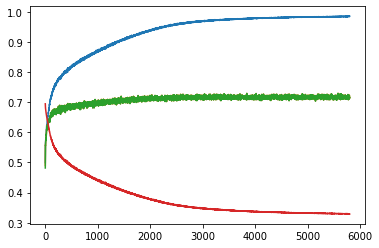

epoch: 0
train_acc: 0.9842202633583632
test_acc: 0.7181719260065288
f1: 0.7180678866382789

epoch: 1
train_acc: 0.9847643922080749
test_acc: 0.7162132752992383
f1: 0.716130555883165

epoch: 2
train_acc: 0.984437914898248
test_acc: 0.7201305767138194
f1: 0.7200347460310287

epoch: 3
train_acc: 0.9843290891283056
test_acc: 0.7116430903155604
f1: 0.7114319760710794

epoch: 4
train_acc: 0.9846011535531614
test_acc: 0.7173014145810663
f1: 0.717152640813926

epoch: 5
train_acc: 0.984818805093046
test_acc: 0.7122959738846573
f1: 0.7121353109463856

epoch: 6
train_acc: 0.9847643922080749
test_acc: 0.7179542981501632
f1: 0.7178028704913819

epoch: 7
train_acc: 0.9845467406681903
test_acc: 0.7131664853101197
f1: 0.7129083322298534

epoch: 8
train_acc: 0.984492327783219
test_acc: 0.7159956474428727
f1: 0.7158401228768665

epoch: 9
train_acc: 0.9846555664381326
test_acc: 0.7194776931447225
f1: 0.7192290034040943

epoch: 10
train_acc: 0.9850908695179018
test_acc: 0.7138193688792165
f1: 0.7137517181

epoch: 89
train_acc: 0.984818805093046
test_acc: 0.7105549510337323
f1: 0.7104290725725215

epoch: 90
train_acc: 0.984818805093046
test_acc: 0.7162132752992383
f1: 0.7161786629377802

epoch: 91
train_acc: 0.9846011535531614
test_acc: 0.7177366702937976
f1: 0.7176861093453668

epoch: 92
train_acc: 0.9843835020132767
test_acc: 0.7116430903155604
f1: 0.7115952922510451

epoch: 93
train_acc: 0.9850908695179018
test_acc: 0.7125136017410229
f1: 0.7123435660468147

epoch: 94
train_acc: 0.9842202633583632
test_acc: 0.7127312295973884
f1: 0.7124880170438304

epoch: 95
train_acc: 0.9849820437479595
test_acc: 0.7144722524483134
f1: 0.7141834880690022

epoch: 96
train_acc: 0.9850908695179018
test_acc: 0.712948857453754
f1: 0.7128155235375654

epoch: 97
train_acc: 0.9850364566329307
test_acc: 0.7159956474428727
f1: 0.7159368586302784

epoch: 98
train_acc: 0.9849820437479595
test_acc: 0.7149075081610446
f1: 0.7148422501264875

epoch: 99
train_acc: 0.9847099793231037
test_acc: 0.7112078346028292
f1: 

epoch: 177
train_acc: 0.9853629339427576
test_acc: 0.7164309031556039
f1: 0.7163103240093752

epoch: 178
train_acc: 0.9849820437479595
test_acc: 0.714689880304679
f1: 0.7146462926291791

epoch: 179
train_acc: 0.985145282402873
test_acc: 0.7131664853101197
f1: 0.7130965044845241

epoch: 180
train_acc: 0.984818805093046
test_acc: 0.7151251360174102
f1: 0.7150094334040934

epoch: 181
train_acc: 0.985145282402873
test_acc: 0.7112078346028292
f1: 0.7109439964449286

epoch: 182
train_acc: 0.9849820437479595
test_acc: 0.719260065288357
f1: 0.7190073964920417

epoch: 183
train_acc: 0.9849276308629884
test_acc: 0.7144722524483134
f1: 0.7142074914544213

epoch: 184
train_acc: 0.9846555664381326
test_acc: 0.719260065288357
f1: 0.7191872320984077

epoch: 185
train_acc: 0.984818805093046
test_acc: 0.7168661588683352
f1: 0.7167992283699411

epoch: 186
train_acc: 0.9851996952878441
test_acc: 0.7144722524483134
f1: 0.7143842869931563

epoch: 187
train_acc: 0.9848732179780172
test_acc: 0.71360174102285

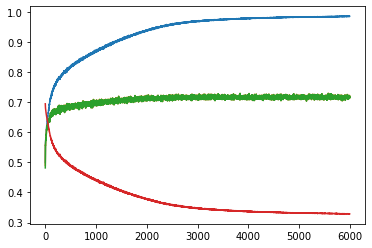

epoch: 0
train_acc: 0.9852541081728153
test_acc: 0.7166485310119696
f1: 0.7164964022992123

epoch: 1
train_acc: 0.984818805093046
test_acc: 0.7144722524483134
f1: 0.7143424704555705

epoch: 2
train_acc: 0.9849276308629884
test_acc: 0.709031556039173
f1: 0.7089977776811832

epoch: 3
train_acc: 0.9852541081728153
test_acc: 0.7142546245919478
f1: 0.7141439081026064

epoch: 4
train_acc: 0.9847099793231037
test_acc: 0.7181719260065288
f1: 0.7179443189078176

epoch: 5
train_acc: 0.9850364566329307
test_acc: 0.7188248095756257
f1: 0.7185717490447425

epoch: 6
train_acc: 0.9848732179780172
test_acc: 0.7140369967355822
f1: 0.7138380596396191

epoch: 7
train_acc: 0.9849276308629884
test_acc: 0.7194776931447225
f1: 0.719388902039627

epoch: 8
train_acc: 0.9849276308629884
test_acc: 0.7218715995647443
f1: 0.7217396131586291

epoch: 9
train_acc: 0.9849820437479595
test_acc: 0.7196953210010881
f1: 0.7195734176491788

epoch: 10
train_acc: 0.9853629339427576
test_acc: 0.7236126224156693
f1: 0.72349774

epoch: 90
train_acc: 0.9852541081728153
test_acc: 0.7122959738846573
f1: 0.7122574203511435

epoch: 91
train_acc: 0.9854717597127
test_acc: 0.7164309031556039
f1: 0.7163595408477058

epoch: 92
train_acc: 0.9853085210577864
test_acc: 0.709031556039173
f1: 0.7086245967557265

epoch: 93
train_acc: 0.9849820437479595
test_acc: 0.714689880304679
f1: 0.7143460030889947

epoch: 94
train_acc: 0.9853629339427576
test_acc: 0.7094668117519043
f1: 0.7091934080018243

epoch: 95
train_acc: 0.9855805854826423
test_acc: 0.7122959738846573
f1: 0.7120817868092273

epoch: 96
train_acc: 0.9854173468277289
test_acc: 0.7159956474428727
f1: 0.7159690840895689

epoch: 97
train_acc: 0.985145282402873
test_acc: 0.7238302502720348
f1: 0.7238311922575271

epoch: 98
train_acc: 0.9850908695179018
test_acc: 0.7144722524483134
f1: 0.7144110909032881

epoch: 99
train_acc: 0.9850364566329307
test_acc: 0.7105549510337323
f1: 0.7103604879632849

epoch: 100
train_acc: 0.985145282402873
test_acc: 0.7159956474428727
f1: 0.7

epoch: 178
train_acc: 0.9855805854826423
test_acc: 0.7164309031556039
f1: 0.7163103240093752

epoch: 179
train_acc: 0.9854173468277289
test_acc: 0.7205658324265506
f1: 0.7205213411787164

epoch: 180
train_acc: 0.9855805854826423
test_acc: 0.7216539717083786
f1: 0.7215839238251847

epoch: 181
train_acc: 0.9850908695179018
test_acc: 0.7140369967355822
f1: 0.7139914659726115

epoch: 182
train_acc: 0.9848732179780172
test_acc: 0.7162132752992383
f1: 0.7161605044003323

epoch: 183
train_acc: 0.9850908695179018
test_acc: 0.7168661588683352
f1: 0.7167111110059795

epoch: 184
train_acc: 0.985145282402873
test_acc: 0.7153427638737758
f1: 0.7152776054698059

epoch: 185
train_acc: 0.9850908695179018
test_acc: 0.7166485310119696
f1: 0.7165253026236262

epoch: 186
train_acc: 0.9853629339427576
test_acc: 0.7210010881392819
f1: 0.7209529898388018

epoch: 187
train_acc: 0.9855805854826423
test_acc: 0.7151251360174102
f1: 0.715004001633363

epoch: 188
train_acc: 0.9853085210577864
test_acc: 0.718389553

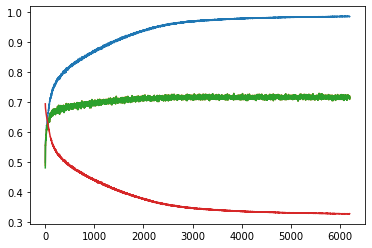

epoch: 0
train_acc: 0.9850908695179018
test_acc: 0.7162132752992383
f1: 0.7160842846601098

epoch: 1
train_acc: 0.9852541081728153
test_acc: 0.7140369967355822
f1: 0.7138380596396191

epoch: 2
train_acc: 0.9852541081728153
test_acc: 0.7225244831338411
f1: 0.7224588902165064

epoch: 3
train_acc: 0.9853085210577864
test_acc: 0.7116430903155604
f1: 0.7114913387824882

epoch: 4
train_acc: 0.9849820437479595
test_acc: 0.7181719260065288
f1: 0.7180965924241868

epoch: 5
train_acc: 0.9857438241375558
test_acc: 0.7170837867247007
f1: 0.7169767694975417

epoch: 6
train_acc: 0.9859070627924692
test_acc: 0.7120783460282917
f1: 0.7120187463355236

epoch: 7
train_acc: 0.9852541081728153
test_acc: 0.7157780195865071
f1: 0.715690456412395

epoch: 8
train_acc: 0.9857438241375558
test_acc: 0.7179542981501632
f1: 0.7178260988646489

epoch: 9
train_acc: 0.985145282402873
test_acc: 0.7099020674646355
f1: 0.7097673183287148

epoch: 10
train_acc: 0.9850364566329307
test_acc: 0.7144722524483134
f1: 0.7143065

epoch: 90
train_acc: 0.9857982370225269
test_acc: 0.7179542981501632
f1: 0.7179294416867937

epoch: 91
train_acc: 0.9856894112525846
test_acc: 0.7225244831338411
f1: 0.7225418315759202

epoch: 92
train_acc: 0.9855805854826423
test_acc: 0.7190424374319913
f1: 0.7190394026788829

epoch: 93
train_acc: 0.9856894112525846
test_acc: 0.7159956474428727
f1: 0.7159197321340263

epoch: 94
train_acc: 0.9855805854826423
test_acc: 0.7162132752992383
f1: 0.7159877241182285

epoch: 95
train_acc: 0.9862879529872673
test_acc: 0.7107725788900979
f1: 0.7105389960065556

epoch: 96
train_acc: 0.9856894112525846
test_acc: 0.7142546245919478
f1: 0.7138830886913838

epoch: 97
train_acc: 0.9859070627924692
test_acc: 0.7133841131664853
f1: 0.7131881500228826

epoch: 98
train_acc: 0.9854173468277289
test_acc: 0.717519042437432
f1: 0.7174740660825341

epoch: 99
train_acc: 0.9858526499074981
test_acc: 0.7177366702937976
f1: 0.7177190173688124

epoch: 100
train_acc: 0.9858526499074981
test_acc: 0.7179542981501632
f

epoch: 178
train_acc: 0.9857438241375558
test_acc: 0.7183895538628945
f1: 0.7182261204259234

epoch: 179
train_acc: 0.9859070627924692
test_acc: 0.7120783460282917
f1: 0.7118531717372218

epoch: 180
train_acc: 0.9857438241375558
test_acc: 0.7127312295973884
f1: 0.7123805138911141

epoch: 181
train_acc: 0.9857982370225269
test_acc: 0.7136017410228509
f1: 0.7133120962643344

epoch: 182
train_acc: 0.9858526499074981
test_acc: 0.7186071817192601
f1: 0.7184820555479863

epoch: 183
train_acc: 0.9856349983676135
test_acc: 0.7205658324265506
f1: 0.7204976568726318

epoch: 184
train_acc: 0.9854173468277289
test_acc: 0.7190424374319913
f1: 0.7189995147095883

epoch: 185
train_acc: 0.986179127217325
test_acc: 0.720348204570185
f1: 0.72030900703101

epoch: 186
train_acc: 0.9859614756774404
test_acc: 0.7138193688792165
f1: 0.7136027566256583

epoch: 187
train_acc: 0.9856894112525846
test_acc: 0.7109902067464635
f1: 0.7107378627258406

epoch: 188
train_acc: 0.9857438241375558
test_acc: 0.71773667029

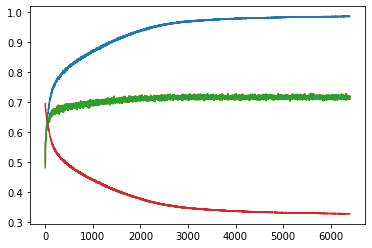

epoch: 0
train_acc: 0.9861247143323539
test_acc: 0.7144722524483134
f1: 0.7143001776417045

epoch: 1
train_acc: 0.9856894112525846
test_acc: 0.7223068552774755
f1: 0.7221332030464848

epoch: 2
train_acc: 0.9859614756774404
test_acc: 0.7168661588683352
f1: 0.7168154419879122

epoch: 3
train_acc: 0.9857982370225269
test_acc: 0.7122959738846573
f1: 0.7122257806741586

epoch: 4
train_acc: 0.9857982370225269
test_acc: 0.7125136017410229
f1: 0.712454092146052

epoch: 5
train_acc: 0.9860158885624116
test_acc: 0.7201305767138194
f1: 0.7200443544765236

epoch: 6
train_acc: 0.9852541081728153
test_acc: 0.721436343852013
f1: 0.7210786211614586

epoch: 7
train_acc: 0.9855805854826423
test_acc: 0.7131664853101197
f1: 0.7129599991314206

epoch: 8
train_acc: 0.9859614756774404
test_acc: 0.7162132752992383
f1: 0.7161006796695042

epoch: 9
train_acc: 0.9856349983676135
test_acc: 0.7153427638737758
f1: 0.715144735166379

epoch: 10
train_acc: 0.9856349983676135
test_acc: 0.727094668117519
f1: 0.727005958

epoch: 90
train_acc: 0.9859614756774404
test_acc: 0.7188248095756257
f1: 0.7187604482163527

epoch: 91
train_acc: 0.986179127217325
test_acc: 0.7186071817192601
f1: 0.7184011660829477

epoch: 92
train_acc: 0.9859070627924692
test_acc: 0.714689880304679
f1: 0.7145211317845374

epoch: 93
train_acc: 0.9856349983676135
test_acc: 0.7116430903155604
f1: 0.7112865238299453

epoch: 94
train_acc: 0.9857982370225269
test_acc: 0.7116430903155604
f1: 0.711497385563107

epoch: 95
train_acc: 0.9857982370225269
test_acc: 0.7183895538628945
f1: 0.7183932358710939

epoch: 96
train_acc: 0.9860703014473827
test_acc: 0.7103373231773668
f1: 0.7102854368070032

epoch: 97
train_acc: 0.9859614756774404
test_acc: 0.7133841131664853
f1: 0.7133689313692652

epoch: 98
train_acc: 0.9855261725976712
test_acc: 0.7105549510337323
f1: 0.7102865576481557

epoch: 99
train_acc: 0.9860703014473827
test_acc: 0.7120783460282917
f1: 0.7118458176950136

epoch: 100
train_acc: 0.9860158885624116
test_acc: 0.717519042437432
f1: 

epoch: 178
train_acc: 0.9857438241375558
test_acc: 0.7186071817192601
f1: 0.7185489334934484

epoch: 179
train_acc: 0.9859070627924692
test_acc: 0.720348204570185
f1: 0.7202820971985968

epoch: 180
train_acc: 0.9859614756774404
test_acc: 0.7251360174102285
f1: 0.72505814045363

epoch: 181
train_acc: 0.9856349983676135
test_acc: 0.717519042437432
f1: 0.7174016324834637

epoch: 182
train_acc: 0.9856349983676135
test_acc: 0.7199129488574537
f1: 0.7196867478257615

epoch: 183
train_acc: 0.9860158885624116
test_acc: 0.7166485310119696
f1: 0.7164375842856383

epoch: 184
train_acc: 0.9859070627924692
test_acc: 0.7151251360174102
f1: 0.715119872538753

epoch: 185
train_acc: 0.9859614756774404
test_acc: 0.7166485310119696
f1: 0.7165878356372569

epoch: 186
train_acc: 0.9858526499074981
test_acc: 0.7112078346028292
f1: 0.7110434123700546

epoch: 187
train_acc: 0.9859614756774404
test_acc: 0.7240478781284004
f1: 0.7239484944369674

epoch: 188
train_acc: 0.9864511916421809
test_acc: 0.725571273122

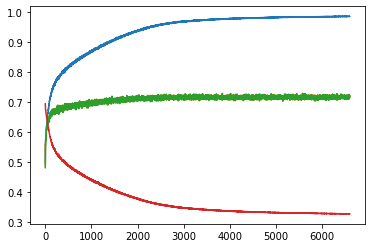

epoch: 0
train_acc: 0.9863967787572097
test_acc: 0.7164309031556039
f1: 0.7162934561009442

epoch: 1
train_acc: 0.986179127217325
test_acc: 0.721436343852013
f1: 0.7212621472566618

epoch: 2
train_acc: 0.9860703014473827
test_acc: 0.7109902067464635
f1: 0.7107821539048002

epoch: 3
train_acc: 0.9863967787572097
test_acc: 0.7159956474428727
f1: 0.7159593125848586

epoch: 4
train_acc: 0.9862335401022962
test_acc: 0.7183895538628945
f1: 0.718320847346718

epoch: 5
train_acc: 0.9859070627924692
test_acc: 0.7188248095756257
f1: 0.7188184954575609

epoch: 6
train_acc: 0.9861247143323539
test_acc: 0.7142546245919478
f1: 0.7141913303381625

epoch: 7
train_acc: 0.9860703014473827
test_acc: 0.7179542981501632
f1: 0.7178423932911636

epoch: 8
train_acc: 0.9860158885624116
test_acc: 0.720348204570185
f1: 0.720218307616203

epoch: 9
train_acc: 0.9862879529872673
test_acc: 0.7077257889009794
f1: 0.7073914618273855

epoch: 10
train_acc: 0.9864511916421809
test_acc: 0.7159956474428727
f1: 0.7157438707

epoch: 90
train_acc: 0.9862335401022962
test_acc: 0.7142546245919478
f1: 0.7141439081026064

epoch: 91
train_acc: 0.986179127217325
test_acc: 0.7155603917301414
f1: 0.7154843600759939

epoch: 92
train_acc: 0.9864511916421809
test_acc: 0.7173014145810663
f1: 0.7172070818525234

epoch: 93
train_acc: 0.9856894112525846
test_acc: 0.719260065288357
f1: 0.7191688090572971

epoch: 94
train_acc: 0.9860703014473827
test_acc: 0.7159956474428727
f1: 0.7159105214461526

epoch: 95
train_acc: 0.9863423658722386
test_acc: 0.7140369967355822
f1: 0.7140204945365405

epoch: 96
train_acc: 0.9859614756774404
test_acc: 0.7181719260065288
f1: 0.7181053041806871

epoch: 97
train_acc: 0.9860703014473827
test_acc: 0.7144722524483134
f1: 0.7143589660478445

epoch: 98
train_acc: 0.9861247143323539
test_acc: 0.7157780195865071
f1: 0.7156067317073673

epoch: 99
train_acc: 0.9865600174121232
test_acc: 0.7168661588683352
f1: 0.7167402585212143

epoch: 100
train_acc: 0.9862879529872673
test_acc: 0.7149075081610446
f1

epoch: 178
train_acc: 0.9864511916421809
test_acc: 0.7173014145810663
f1: 0.7172213178537336

epoch: 179
train_acc: 0.9860158885624116
test_acc: 0.7205658324265506
f1: 0.720509976590509

epoch: 180
train_acc: 0.986179127217325
test_acc: 0.7183895538628945
f1: 0.7181799032762027

epoch: 181
train_acc: 0.9859070627924692
test_acc: 0.714689880304679
f1: 0.7144213916781961

epoch: 182
train_acc: 0.9862879529872673
test_acc: 0.7170837867247007
f1: 0.7169918230809971

epoch: 183
train_acc: 0.9866688431820655
test_acc: 0.7149075081610446
f1: 0.7149075081610446

epoch: 184
train_acc: 0.9865056045271521
test_acc: 0.7186071817192601
f1: 0.718613340199625

epoch: 185
train_acc: 0.9864511916421809
test_acc: 0.7205658324265506
f1: 0.7205572537862844

epoch: 186
train_acc: 0.9861247143323539
test_acc: 0.7138193688792165
f1: 0.7137287867976024

epoch: 187
train_acc: 0.9865600174121232
test_acc: 0.7153427638737758
f1: 0.7152858640034157

epoch: 188
train_acc: 0.9861247143323539
test_acc: 0.71817192600

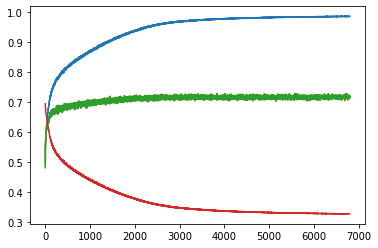

epoch: 0
train_acc: 0.9862879529872673
test_acc: 0.7179542981501632
f1: 0.7178423932911636

epoch: 1
train_acc: 0.9863423658722386
test_acc: 0.720348204570185
f1: 0.7201365340410427

epoch: 2
train_acc: 0.9862335401022962
test_acc: 0.7138193688792165
f1: 0.7136237033258092

epoch: 3
train_acc: 0.9862335401022962
test_acc: 0.7183895538628945
f1: 0.7182069568698977

epoch: 4
train_acc: 0.9862335401022962
test_acc: 0.7094668117519043
f1: 0.709374851996045

epoch: 5
train_acc: 0.9862335401022962
test_acc: 0.7094668117519043
f1: 0.7094457505675202

epoch: 6
train_acc: 0.9863967787572097
test_acc: 0.7151251360174102
f1: 0.715095332208256

epoch: 7
train_acc: 0.9862879529872673
test_acc: 0.7229597388465724
f1: 0.7229307546990907

epoch: 8
train_acc: 0.9860158885624116
test_acc: 0.721436343852013
f1: 0.7212289615096905

epoch: 9
train_acc: 0.9862335401022962
test_acc: 0.7164309031556039
f1: 0.7160054115587198

epoch: 10
train_acc: 0.9862879529872673
test_acc: 0.7205658324265506
f1: 0.720188874

epoch: 90
train_acc: 0.9862879529872673
test_acc: 0.7157780195865071
f1: 0.7156488311089749

epoch: 91
train_acc: 0.9860158885624116
test_acc: 0.7205658324265506
f1: 0.7204976568726318

epoch: 92
train_acc: 0.9863967787572097
test_acc: 0.7201305767138194
f1: 0.7200706272116072

epoch: 93
train_acc: 0.9863423658722386
test_acc: 0.7205658324265506
f1: 0.7204797442829366

epoch: 94
train_acc: 0.986179127217325
test_acc: 0.7190424374319913
f1: 0.7189535085594712

epoch: 95
train_acc: 0.9856894112525846
test_acc: 0.7138193688792165
f1: 0.7137792562223955

epoch: 96
train_acc: 0.986179127217325
test_acc: 0.7144722524483134
f1: 0.7142525559703853

epoch: 97
train_acc: 0.9860158885624116
test_acc: 0.7179542981501632
f1: 0.7176927659488797

epoch: 98
train_acc: 0.9863967787572097
test_acc: 0.7199129488574537
f1: 0.7196493753545676

epoch: 99
train_acc: 0.9866688431820655
test_acc: 0.7190424374319913
f1: 0.7188435952537239

epoch: 100
train_acc: 0.9859614756774404
test_acc: 0.7162132752992383
f1

epoch: 178
train_acc: 0.9863967787572097
test_acc: 0.7179542981501632
f1: 0.7178088386094106

epoch: 179
train_acc: 0.9857982370225269
test_acc: 0.7149075081610446
f1: 0.7146585844660023

epoch: 180
train_acc: 0.9860703014473827
test_acc: 0.7116430903155604
f1: 0.7115148674408984

epoch: 181
train_acc: 0.9866144302970944
test_acc: 0.7140369967355822
f1: 0.7139672282948898

epoch: 182
train_acc: 0.9860158885624116
test_acc: 0.7233949945593036
f1: 0.723333724950346

epoch: 183
train_acc: 0.9865600174121232
test_acc: 0.7238302502720348
f1: 0.723718083261875

epoch: 184
train_acc: 0.9863423658722386
test_acc: 0.7127312295973884
f1: 0.7124804057214681

epoch: 185
train_acc: 0.9863423658722386
test_acc: 0.7186071817192601
f1: 0.7184649958740358

epoch: 186
train_acc: 0.9861247143323539
test_acc: 0.7099020674646355
f1: 0.7096896785681123

epoch: 187
train_acc: 0.9866688431820655
test_acc: 0.7201305767138194
f1: 0.7199803174783311

epoch: 188
train_acc: 0.9866144302970944
test_acc: 0.706855277

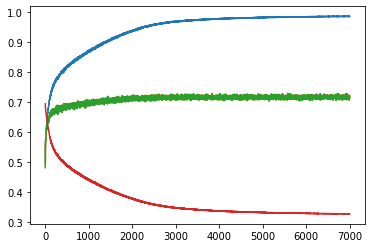

epoch: 0
train_acc: 0.9863967787572097
test_acc: 0.7173014145810663
f1: 0.716915402846212

epoch: 1
train_acc: 0.9867232560670367
test_acc: 0.712948857453754
f1: 0.7127790791943592

epoch: 2
train_acc: 0.9865056045271521
test_acc: 0.7183895538628945
f1: 0.718320847346718

epoch: 3
train_acc: 0.9865600174121232
test_acc: 0.7229597388465724
f1: 0.7229523887753898

epoch: 4
train_acc: 0.9865600174121232
test_acc: 0.7238302502720348
f1: 0.7237474725786724

epoch: 5
train_acc: 0.9860703014473827
test_acc: 0.7223068552774755
f1: 0.7221332030464848

epoch: 6
train_acc: 0.9861247143323539
test_acc: 0.7144722524483134
f1: 0.7142305139102314

epoch: 7
train_acc: 0.9863423658722386
test_acc: 0.7188248095756257
f1: 0.7186154830238438

epoch: 8
train_acc: 0.9862879529872673
test_acc: 0.7099020674646355
f1: 0.7096751911759008

epoch: 9
train_acc: 0.9864511916421809
test_acc: 0.7112078346028292
f1: 0.7111306394956726

epoch: 10
train_acc: 0.9865600174121232
test_acc: 0.7125136017410229
f1: 0.71251049

epoch: 89
train_acc: 0.9864511916421809
test_acc: 0.712948857453754
f1: 0.712848035708314

epoch: 90
train_acc: 0.9865600174121232
test_acc: 0.7131664853101197
f1: 0.7129005135189995

epoch: 91
train_acc: 0.9862335401022962
test_acc: 0.7210010881392819
f1: 0.7207268513128531

epoch: 92
train_acc: 0.9863423658722386
test_acc: 0.7127312295973884
f1: 0.7125949056098517

epoch: 93
train_acc: 0.986179127217325
test_acc: 0.7190424374319913
f1: 0.7189535085594712

epoch: 94
train_acc: 0.9861247143323539
test_acc: 0.7181719260065288
f1: 0.7181514958688681

epoch: 95
train_acc: 0.9861247143323539
test_acc: 0.7216539717083786
f1: 0.7216216586793069

epoch: 96
train_acc: 0.9863967787572097
test_acc: 0.7188248095756257
f1: 0.7187518634660022

epoch: 97
train_acc: 0.9865600174121232
test_acc: 0.7112078346028292
f1: 0.7111114685283284

epoch: 98
train_acc: 0.9866688431820655
test_acc: 0.7199129488574537
f1: 0.7197655494438204

epoch: 99
train_acc: 0.9863967787572097
test_acc: 0.7179542981501632
f1: 

epoch: 177
train_acc: 0.9864511916421809
test_acc: 0.7164309031556039
f1: 0.7162631843747157

epoch: 178
train_acc: 0.9863423658722386
test_acc: 0.7177366702937976
f1: 0.7175569185012473

epoch: 179
train_acc: 0.9863967787572097
test_acc: 0.7162132752992383
f1: 0.7160953226182101

epoch: 180
train_acc: 0.986832081836979
test_acc: 0.7227421109902068
f1: 0.7226827208923698

epoch: 181
train_acc: 0.9863423658722386
test_acc: 0.7183895538628945
f1: 0.7183616663560275

epoch: 182
train_acc: 0.9865056045271521
test_acc: 0.7153427638737758
f1: 0.7152452937858361

epoch: 183
train_acc: 0.9865056045271521
test_acc: 0.7210010881392819
f1: 0.7209151340893494

epoch: 184
train_acc: 0.9863967787572097
test_acc: 0.7181719260065288
f1: 0.7180627273365386

epoch: 185
train_acc: 0.9863967787572097
test_acc: 0.7190424374319913
f1: 0.7188569835979118

epoch: 186
train_acc: 0.9865600174121232
test_acc: 0.7199129488574537
f1: 0.7197771895640178

epoch: 187
train_acc: 0.9867232560670367
test_acc: 0.72100108

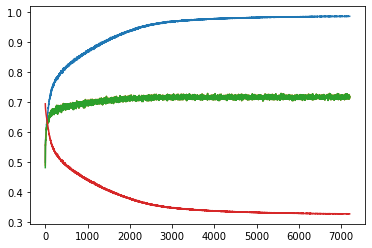

epoch: 0
train_acc: 0.9863423658722386
test_acc: 0.7205658324265506
f1: 0.7204651946822289

epoch: 1
train_acc: 0.9865600174121232
test_acc: 0.7188248095756257
f1: 0.7188207067916204

epoch: 2
train_acc: 0.9864511916421809
test_acc: 0.7257889009793254
f1: 0.7257869523870657

epoch: 3
train_acc: 0.9866144302970944
test_acc: 0.724265505984766
f1: 0.7242682490754316

epoch: 4
train_acc: 0.9863967787572097
test_acc: 0.7151251360174102
f1: 0.7149752169556807

epoch: 5
train_acc: 0.9862335401022962
test_acc: 0.7205658324265506
f1: 0.7203365500755775

epoch: 6
train_acc: 0.9867232560670367
test_acc: 0.7181719260065288
f1: 0.7180052369648939

epoch: 7
train_acc: 0.9869409076069213
test_acc: 0.7164309031556039
f1: 0.7162631843747157

epoch: 8
train_acc: 0.9866144302970944
test_acc: 0.7194776931447225
f1: 0.7193741358121556

epoch: 9
train_acc: 0.9864511916421809
test_acc: 0.7131664853101197
f1: 0.7130472662659516

epoch: 10
train_acc: 0.9863423658722386
test_acc: 0.7177366702937976
f1: 0.717530

epoch: 90
train_acc: 0.9866144302970944
test_acc: 0.7162132752992383
f1: 0.7161210286904769

epoch: 91
train_acc: 0.9860703014473827
test_acc: 0.7225244831338411
f1: 0.7223842766739331

epoch: 92
train_acc: 0.986832081836979
test_acc: 0.7159956474428727
f1: 0.7159197321340263

epoch: 93
train_acc: 0.9867232560670367
test_acc: 0.7166485310119696
f1: 0.716508285938427

epoch: 94
train_acc: 0.9866144302970944
test_acc: 0.7223068552774755
f1: 0.722206844559598

epoch: 95
train_acc: 0.9865056045271521
test_acc: 0.7201305767138194
f1: 0.719871062507916

epoch: 96
train_acc: 0.9861247143323539
test_acc: 0.7188248095756257
f1: 0.7186738492861617

epoch: 97
train_acc: 0.9866144302970944
test_acc: 0.7166485310119696
f1: 0.7164581619009001

epoch: 98
train_acc: 0.9865056045271521
test_acc: 0.7144722524483134
f1: 0.7144068947831693

epoch: 99
train_acc: 0.9868864947219501
test_acc: 0.7196953210010881
f1: 0.7195679130691881

epoch: 100
train_acc: 0.9868864947219501
test_acc: 0.7201305767138194
f1: 

epoch: 180
train_acc: 0.9867776689520078
test_acc: 0.7177366702937976
f1: 0.7174631930628551

epoch: 181
train_acc: 0.9862879529872673
test_acc: 0.7181719260065288
f1: 0.7176782899774391

epoch: 182
train_acc: 0.9867776689520078
test_acc: 0.7153427638737758
f1: 0.715012821491971

epoch: 183
train_acc: 0.9865056045271521
test_acc: 0.7162132752992383
f1: 0.7159730107766326

epoch: 184
train_acc: 0.986832081836979
test_acc: 0.7170837867247007
f1: 0.7169966258316335

epoch: 185
train_acc: 0.9867776689520078
test_acc: 0.7157780195865071
f1: 0.7156652512640892

epoch: 186
train_acc: 0.9867232560670367
test_acc: 0.7179542981501632
f1: 0.7177843218168056

epoch: 187
train_acc: 0.986832081836979
test_acc: 0.7155603917301414
f1: 0.7154843600759939

epoch: 188
train_acc: 0.9867232560670367
test_acc: 0.7125136017410229
f1: 0.7122430651463744

epoch: 189
train_acc: 0.9865600174121232
test_acc: 0.7151251360174102
f1: 0.7149502372913624

epoch: 190
train_acc: 0.9869953204918924
test_acc: 0.7133841131

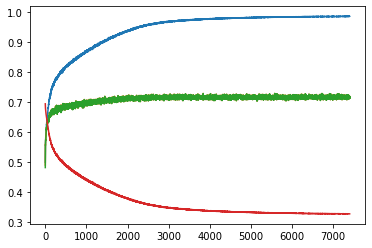

epoch: 0
train_acc: 0.9865600174121232
test_acc: 0.7201305767138194
f1: 0.7199920550820407

epoch: 1
train_acc: 0.9866688431820655
test_acc: 0.7205658324265506
f1: 0.7204036619991389

epoch: 2
train_acc: 0.9867776689520078
test_acc: 0.7159956474428727
f1: 0.7157877198284971

epoch: 3
train_acc: 0.9867776689520078
test_acc: 0.7201305767138194
f1: 0.7200033666203229

epoch: 4
train_acc: 0.9869409076069213
test_acc: 0.7142546245919478
f1: 0.7141102394297053

epoch: 5
train_acc: 0.9870497333768636
test_acc: 0.7151251360174102
f1: 0.7150661670092218

epoch: 6
train_acc: 0.9866688431820655
test_acc: 0.7155603917301414
f1: 0.7155094409517305

epoch: 7
train_acc: 0.986832081836979
test_acc: 0.7125136017410229
f1: 0.7123800656505869

epoch: 8
train_acc: 0.9869953204918924
test_acc: 0.7140369967355822
f1: 0.7138895169234302

epoch: 9
train_acc: 0.9866688431820655
test_acc: 0.7153427638737758
f1: 0.7150548798736698

epoch: 10
train_acc: 0.9867776689520078
test_acc: 0.719260065288357
f1: 0.7190714

epoch: 90
train_acc: 0.9867776689520078
test_acc: 0.7220892274211099
f1: 0.7220467701658747

epoch: 91
train_acc: 0.9868864947219501
test_acc: 0.7138193688792165
f1: 0.7136687626407333

epoch: 92
train_acc: 0.986832081836979
test_acc: 0.7183895538628945
f1: 0.7182003544545043

epoch: 93
train_acc: 0.9869409076069213
test_acc: 0.7159956474428727
f1: 0.7158461864989788

epoch: 94
train_acc: 0.9867776689520078
test_acc: 0.7166485310119696
f1: 0.7166373887272341

epoch: 95
train_acc: 0.9863967787572097
test_acc: 0.7190424374319913
f1: 0.7190161590495276

epoch: 96
train_acc: 0.9865600174121232
test_acc: 0.7218715995647443
f1: 0.7218409198823367

epoch: 97
train_acc: 0.9869953204918924
test_acc: 0.7142546245919478
f1: 0.7139777737020268

epoch: 98
train_acc: 0.9866144302970944
test_acc: 0.7162132752992383
f1: 0.7161210286904769

epoch: 99
train_acc: 0.9869953204918924
test_acc: 0.7238302502720348
f1: 0.7236543790116291

epoch: 100
train_acc: 0.9870497333768636
test_acc: 0.7179542981501632
f

epoch: 179
train_acc: 0.9868864947219501
test_acc: 0.7253536452665941
f1: 0.725259603025784

epoch: 180
train_acc: 0.9869409076069213
test_acc: 0.7149075081610446
f1: 0.7148048325807784

epoch: 181
train_acc: 0.9869953204918924
test_acc: 0.7168661588683352
f1: 0.7167765411586927

epoch: 182
train_acc: 0.9871041462618348
test_acc: 0.723177366702938
f1: 0.723166481152874

epoch: 183
train_acc: 0.9869409076069213
test_acc: 0.7177366702937976
f1: 0.7176782418723918

epoch: 184
train_acc: 0.9869953204918924
test_acc: 0.7201305767138194
f1: 0.7200443544765236

epoch: 185
train_acc: 0.9869409076069213
test_acc: 0.7159956474428727
f1: 0.715905754198381

epoch: 186
train_acc: 0.9869953204918924
test_acc: 0.7194776931447225
f1: 0.7194155558308388

epoch: 187
train_acc: 0.9869953204918924
test_acc: 0.7162132752992383
f1: 0.7161110699888057

epoch: 188
train_acc: 0.9869953204918924
test_acc: 0.7194776931447225
f1: 0.7193529540613722

epoch: 189
train_acc: 0.9866688431820655
test_acc: 0.71860718171

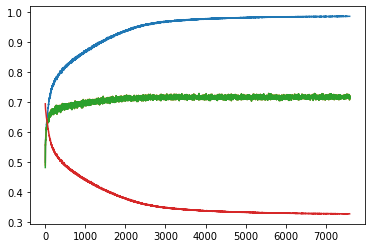

epoch: 0
train_acc: 0.9871041462618348
test_acc: 0.7164309031556039
f1: 0.7162370231433683

epoch: 1
train_acc: 0.9871041462618348
test_acc: 0.7116430903155604
f1: 0.7115418099420138

epoch: 2
train_acc: 0.987158559146806
test_acc: 0.7177366702937976
f1: 0.7176822292059867

epoch: 3
train_acc: 0.9868864947219501
test_acc: 0.7120783460282917
f1: 0.7120379893400983

epoch: 4
train_acc: 0.9866688431820655
test_acc: 0.7149075081610446
f1: 0.7148882733601367

epoch: 5
train_acc: 0.9869409076069213
test_acc: 0.721436343852013
f1: 0.7213551468791805

epoch: 6
train_acc: 0.9869953204918924
test_acc: 0.7140369967355822
f1: 0.7137227692106702

epoch: 7
train_acc: 0.9867232560670367
test_acc: 0.7179542981501632
f1: 0.7177580862198983

epoch: 8
train_acc: 0.9866688431820655
test_acc: 0.7190424374319913
f1: 0.7188155333667894

epoch: 9
train_acc: 0.987158559146806
test_acc: 0.7181719260065288
f1: 0.7181358695765453

epoch: 10
train_acc: 0.9869409076069213
test_acc: 0.7136017410228509
f1: 0.71361940

epoch: 90
train_acc: 0.9871041462618348
test_acc: 0.7220892274211099
f1: 0.7218925415484163

epoch: 91
train_acc: 0.9872129720317772
test_acc: 0.7218715995647443
f1: 0.7216136997551452

epoch: 92
train_acc: 0.9871041462618348
test_acc: 0.7164309031556039
f1: 0.716336279949067

epoch: 93
train_acc: 0.9871041462618348
test_acc: 0.7210010881392819
f1: 0.7209413251051946

epoch: 94
train_acc: 0.9871041462618348
test_acc: 0.717519042437432
f1: 0.7173488037949179

epoch: 95
train_acc: 0.9870497333768636
test_acc: 0.7205658324265506
f1: 0.7203292529426351

epoch: 96
train_acc: 0.986832081836979
test_acc: 0.7170837867247007
f1: 0.7168516472727811

epoch: 97
train_acc: 0.9868864947219501
test_acc: 0.7183895538628945
f1: 0.7181584858238298

epoch: 98
train_acc: 0.9869409076069213
test_acc: 0.7151251360174102
f1: 0.715039749098095

epoch: 99
train_acc: 0.9872129720317772
test_acc: 0.7151251360174102
f1: 0.715004001633363

epoch: 100
train_acc: 0.987158559146806
test_acc: 0.7225244831338411
f1: 0.

epoch: 179
train_acc: 0.9869953204918924
test_acc: 0.7109902067464635
f1: 0.7108912462902067

epoch: 180
train_acc: 0.9873217978017195
test_acc: 0.717519042437432
f1: 0.7173292581777021

epoch: 181
train_acc: 0.9867776689520078
test_acc: 0.7153427638737758
f1: 0.7151647567279014

epoch: 182
train_acc: 0.9871041462618348
test_acc: 0.717519042437432
f1: 0.7173551037966373

epoch: 183
train_acc: 0.9869953204918924
test_acc: 0.7125136017410229
f1: 0.7123170434170294

epoch: 184
train_acc: 0.9870497333768636
test_acc: 0.7177366702937976
f1: 0.7176861093453668

epoch: 185
train_acc: 0.987158559146806
test_acc: 0.7131664853101197
f1: 0.7130526808316001

epoch: 186
train_acc: 0.9869953204918924
test_acc: 0.717519042437432
f1: 0.717390645313514

epoch: 187
train_acc: 0.9873762106866906
test_acc: 0.717519042437432
f1: 0.7173423962024589

epoch: 188
train_acc: 0.9869409076069213
test_acc: 0.7144722524483134
f1: 0.7143065455941356

epoch: 189
train_acc: 0.9872129720317772
test_acc: 0.7177366702937

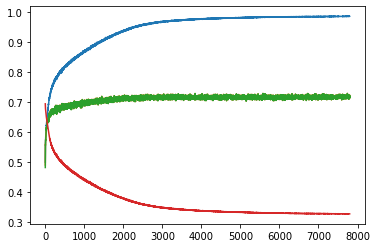

epoch: 0
train_acc: 0.9873217978017195
test_acc: 0.7238302502720348
f1: 0.7238102303147439

epoch: 1
train_acc: 0.9869409076069213
test_acc: 0.7155603917301414
f1: 0.7155273713009024

epoch: 2
train_acc: 0.9871041462618348
test_acc: 0.7223068552774755
f1: 0.7221395020356821

epoch: 3
train_acc: 0.9873217978017195
test_acc: 0.7220892274211099
f1: 0.7218575796284284

epoch: 4
train_acc: 0.9873217978017195
test_acc: 0.7157780195865071
f1: 0.715566424790356

epoch: 5
train_acc: 0.9872673849167483
test_acc: 0.7166485310119696
f1: 0.7163619675806713

epoch: 6
train_acc: 0.9873217978017195
test_acc: 0.7190424374319913
f1: 0.7188762632599831

epoch: 7
train_acc: 0.9869409076069213
test_acc: 0.7186071817192601
f1: 0.7185489334934484

epoch: 8
train_acc: 0.9871041462618348
test_acc: 0.7236126224156693
f1: 0.7234977451879807

epoch: 9
train_acc: 0.9869409076069213
test_acc: 0.7190424374319913
f1: 0.7189004715184688

epoch: 10
train_acc: 0.9867776689520078
test_acc: 0.7186071817192601
f1: 0.718589

epoch: 90
train_acc: 0.9869953204918924
test_acc: 0.717519042437432
f1: 0.7175340553344486

epoch: 91
train_acc: 0.9873217978017195
test_acc: 0.7207834602829162
f1: 0.7207993310803591

epoch: 92
train_acc: 0.9869953204918924
test_acc: 0.7138193688792165
f1: 0.7137894284597834

epoch: 93
train_acc: 0.9869953204918924
test_acc: 0.7181719260065288
f1: 0.7179988978550912

epoch: 94
train_acc: 0.9870497333768636
test_acc: 0.7186071817192601
f1: 0.718310408562017

epoch: 95
train_acc: 0.9869953204918924
test_acc: 0.7177366702937976
f1: 0.7173787043287734

epoch: 96
train_acc: 0.9872673849167483
test_acc: 0.7162132752992383
f1: 0.7158578822817672

epoch: 97
train_acc: 0.9868864947219501
test_acc: 0.7136017410228509
f1: 0.7134160395987523

epoch: 98
train_acc: 0.9874306235716618
test_acc: 0.7201305767138194
f1: 0.720057969363219

epoch: 99
train_acc: 0.9869953204918924
test_acc: 0.723177366702938
f1: 0.723125890795416

epoch: 100
train_acc: 0.987158559146806
test_acc: 0.7153427638737758
f1: 0.

epoch: 179
train_acc: 0.9873217978017195
test_acc: 0.7109902067464635
f1: 0.7108160334666034

epoch: 180
train_acc: 0.9870497333768636
test_acc: 0.714689880304679
f1: 0.714405401626639

epoch: 181
train_acc: 0.9872673849167483
test_acc: 0.7112078346028292
f1: 0.7108774905770221

epoch: 182
train_acc: 0.9872129720317772
test_acc: 0.7166485310119696
f1: 0.7164160344224314

epoch: 183
train_acc: 0.9874306235716618
test_acc: 0.7190424374319913
f1: 0.7188945799005224

epoch: 184
train_acc: 0.9870497333768636
test_acc: 0.7183895538628945
f1: 0.718298014666777

epoch: 185
train_acc: 0.9873217978017195
test_acc: 0.7207834602829162
f1: 0.7207659979060803

epoch: 186
train_acc: 0.9872673849167483
test_acc: 0.7183895538628945
f1: 0.7183949167187785

epoch: 187
train_acc: 0.987158559146806
test_acc: 0.7223068552774755
f1: 0.7222348125252469

epoch: 188
train_acc: 0.9868864947219501
test_acc: 0.7207834602829162
f1: 0.7205507240902691

epoch: 189
train_acc: 0.9873762106866906
test_acc: 0.71773667029

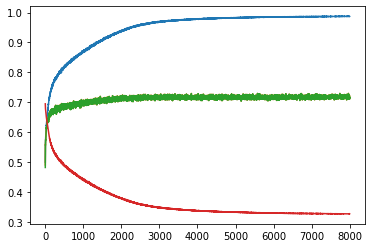

epoch: 0
train_acc: 0.9872673849167483
test_acc: 0.7244831338411316
f1: 0.7243410414193779

epoch: 1
train_acc: 0.9874850364566329
test_acc: 0.7168661588683352
f1: 0.7167511633756497

epoch: 2
train_acc: 0.9869409076069213
test_acc: 0.7186071817192601
f1: 0.7185274549537163

epoch: 3
train_acc: 0.9873217978017195
test_acc: 0.7164309031556039
f1: 0.7162876176518705

epoch: 4
train_acc: 0.987158559146806
test_acc: 0.719260065288357
f1: 0.7191324595180532

epoch: 5
train_acc: 0.9870497333768636
test_acc: 0.7109902067464635
f1: 0.710928299328938

epoch: 6
train_acc: 0.9875394493416041
test_acc: 0.7159956474428727
f1: 0.7160002217782537

epoch: 7
train_acc: 0.9873762106866906
test_acc: 0.7196953210010881
f1: 0.719686715636086

epoch: 8
train_acc: 0.9873762106866906
test_acc: 0.7177366702937976
f1: 0.7177394783353075

epoch: 9
train_acc: 0.9874306235716618
test_acc: 0.7155603917301414
f1: 0.7154703607182253

epoch: 10
train_acc: 0.987158559146806
test_acc: 0.7240478781284004
f1: 0.7238492252

epoch: 90
train_acc: 0.9875394493416041
test_acc: 0.7225244831338411
f1: 0.722328105304801

epoch: 91
train_acc: 0.9874850364566329
test_acc: 0.7196953210010881
f1: 0.7195069988697076

epoch: 92
train_acc: 0.9875394493416041
test_acc: 0.7136017410228509
f1: 0.7135229045464808

epoch: 93
train_acc: 0.9872673849167483
test_acc: 0.7186071817192601
f1: 0.7185867831339353

epoch: 94
train_acc: 0.9875938622265753
test_acc: 0.7140369967355822
f1: 0.7139672282948898

epoch: 95
train_acc: 0.9874850364566329
test_acc: 0.7099020674646355
f1: 0.7098839245586945

epoch: 96
train_acc: 0.9872673849167483
test_acc: 0.7201305767138194
f1: 0.7200489991301766

epoch: 97
train_acc: 0.9877026879965176
test_acc: 0.7251360174102285
f1: 0.7250974909573275

epoch: 98
train_acc: 0.9877026879965176
test_acc: 0.7170837867247007
f1: 0.7170387410687938

epoch: 99
train_acc: 0.9873217978017195
test_acc: 0.7207834602829162
f1: 0.7206950824800943

epoch: 100
train_acc: 0.9873217978017195
test_acc: 0.7183895538628945
f

epoch: 178
train_acc: 0.9875394493416041
test_acc: 0.720348204570185
f1: 0.720218307616203

epoch: 179
train_acc: 0.9875394493416041
test_acc: 0.7183895538628945
f1: 0.7181799032762027

epoch: 180
train_acc: 0.9872673849167483
test_acc: 0.7205658324265506
f1: 0.7204549637236528

epoch: 181
train_acc: 0.9875394493416041
test_acc: 0.7133841131664853
f1: 0.7133474441948342

epoch: 182
train_acc: 0.987865926651431
test_acc: 0.7157780195865071
f1: 0.7156856314952171

epoch: 183
train_acc: 0.9872129720317772
test_acc: 0.7153427638737758
f1: 0.7152974410138325

epoch: 184
train_acc: 0.9874850364566329
test_acc: 0.7225244831338411
f1: 0.7224413140565858

epoch: 185
train_acc: 0.9874850364566329
test_acc: 0.7151251360174102
f1: 0.7149870560522915

epoch: 186
train_acc: 0.987865926651431
test_acc: 0.7177366702937976
f1: 0.7176324702469866

epoch: 187
train_acc: 0.9874850364566329
test_acc: 0.7218715995647443
f1: 0.7217811922288572

epoch: 188
train_acc: 0.9874306235716618
test_acc: 0.71708378672

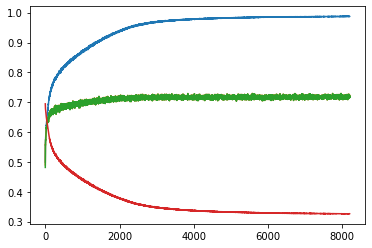

epoch: 0
train_acc: 0.9874850364566329
test_acc: 0.720348204570185
f1: 0.7203054813337111

epoch: 1
train_acc: 0.9877026879965176
test_acc: 0.7142546245919478
f1: 0.7142109704211383

epoch: 2
train_acc: 0.9874850364566329
test_acc: 0.7181719260065288
f1: 0.7180729387735153

epoch: 3
train_acc: 0.9877571008814887
test_acc: 0.7179542981501632
f1: 0.7178854854415352

epoch: 4
train_acc: 0.9875938622265753
test_acc: 0.7225244831338411
f1: 0.722427024661183

epoch: 5
train_acc: 0.987865926651431
test_acc: 0.7199129488574537
f1: 0.7197214495667805

epoch: 6
train_acc: 0.9874850364566329
test_acc: 0.7164309031556039
f1: 0.7162091328598639

epoch: 7
train_acc: 0.9875938622265753
test_acc: 0.7229597388465724
f1: 0.7228419358894355

epoch: 8
train_acc: 0.9874850364566329
test_acc: 0.7151251360174102
f1: 0.7149811907185714

epoch: 9
train_acc: 0.9874306235716618
test_acc: 0.7218715995647443
f1: 0.721657596440665

epoch: 10
train_acc: 0.9874306235716618
test_acc: 0.7190424374319913
f1: 0.718911933

epoch: 90
train_acc: 0.9874850364566329
test_acc: 0.7194776931447225
f1: 0.7191308145032452

epoch: 91
train_acc: 0.9875394493416041
test_acc: 0.7257889009793254
f1: 0.7256997669861971

epoch: 92
train_acc: 0.9877026879965176
test_acc: 0.7183895538628945
f1: 0.718351816894387

epoch: 93
train_acc: 0.9874850364566329
test_acc: 0.7140369967355822
f1: 0.7139798358566423

epoch: 94
train_acc: 0.9876482751115464
test_acc: 0.7109902067464635
f1: 0.7108588420464921

epoch: 95
train_acc: 0.9879203395364022
test_acc: 0.7125136017410229
f1: 0.7123031248225629

epoch: 96
train_acc: 0.9877571008814887
test_acc: 0.7179542981501632
f1: 0.7176927659488797

epoch: 97
train_acc: 0.9878115137664599
test_acc: 0.7168661588683352
f1: 0.7166374972193594

epoch: 98
train_acc: 0.9878115137664599
test_acc: 0.7140369967355822
f1: 0.7137796271244516

epoch: 99
train_acc: 0.9875938622265753
test_acc: 0.7166485310119696
f1: 0.7166070421819539

epoch: 100
train_acc: 0.9877026879965176
test_acc: 0.7190424374319913
f

epoch: 179
train_acc: 0.9879747524213733
test_acc: 0.7196953210010881
f1: 0.7196989859366069

epoch: 180
train_acc: 0.9875394493416041
test_acc: 0.723177366702938
f1: 0.723166481152874

epoch: 181
train_acc: 0.9876482751115464
test_acc: 0.7164309031556039
f1: 0.7162091328598639

epoch: 182
train_acc: 0.9879203395364022
test_acc: 0.7166485310119696
f1: 0.7160925935849265

epoch: 183
train_acc: 0.9875938622265753
test_acc: 0.7186071817192601
f1: 0.7181350326906811

epoch: 184
train_acc: 0.9876482751115464
test_acc: 0.717519042437432
f1: 0.7172798834264332

epoch: 185
train_acc: 0.9875394493416041
test_acc: 0.726006528835691
f1: 0.7259945342206728

epoch: 186
train_acc: 0.9876482751115464
test_acc: 0.7170837867247007
f1: 0.7171006716445911

epoch: 187
train_acc: 0.987865926651431
test_acc: 0.7181719260065288
f1: 0.7181810309377686

epoch: 188
train_acc: 0.987865926651431
test_acc: 0.7183895538628945
f1: 0.7183705539908527

epoch: 189
train_acc: 0.987865926651431
test_acc: 0.71621327529923

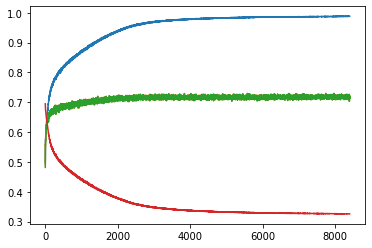

epoch: 0
train_acc: 0.9880291653063445
test_acc: 0.7151251360174102
f1: 0.7150250786521478

epoch: 1
train_acc: 0.9880291653063445
test_acc: 0.7142546245919478
f1: 0.7142592269692316

epoch: 2
train_acc: 0.9874850364566329
test_acc: 0.7116430903155604
f1: 0.7116571044627725

epoch: 3
train_acc: 0.9876482751115464
test_acc: 0.7199129488574537
f1: 0.7199190787601836

epoch: 4
train_acc: 0.9880835781913158
test_acc: 0.7196953210010881
f1: 0.7196764092273712

epoch: 5
train_acc: 0.9879203395364022
test_acc: 0.7227421109902068
f1: 0.7225812035723542

epoch: 6
train_acc: 0.9874850364566329
test_acc: 0.714689880304679
f1: 0.7142908349639172

epoch: 7
train_acc: 0.9876482751115464
test_acc: 0.7179542981501632
f1: 0.7177004541501442

epoch: 8
train_acc: 0.9877571008814887
test_acc: 0.7151251360174102
f1: 0.7150661670092218

epoch: 9
train_acc: 0.9878115137664599
test_acc: 0.7227421109902068
f1: 0.722731208324498

epoch: 10
train_acc: 0.9875394493416041
test_acc: 0.7164309031556039
f1: 0.7163911

epoch: 90
train_acc: 0.9877571008814887
test_acc: 0.7142546245919478
f1: 0.7140383417866841

epoch: 91
train_acc: 0.987865926651431
test_acc: 0.7190424374319913
f1: 0.7187933618267539

epoch: 92
train_acc: 0.9879747524213733
test_acc: 0.7183895538628945
f1: 0.7180457461932589

epoch: 93
train_acc: 0.9879203395364022
test_acc: 0.7190424374319913
f1: 0.7188297785579658

epoch: 94
train_acc: 0.9878115137664599
test_acc: 0.7233949945593036
f1: 0.7233491444913798

epoch: 95
train_acc: 0.9880291653063445
test_acc: 0.7181719260065288
f1: 0.7181709380050572

epoch: 96
train_acc: 0.9879203395364022
test_acc: 0.720348204570185
f1: 0.7203220483180812

epoch: 97
train_acc: 0.9880291653063445
test_acc: 0.7194776931447225
f1: 0.7194418037715574

epoch: 98
train_acc: 0.9877571008814887
test_acc: 0.7201305767138194
f1: 0.7200142522139711

epoch: 99
train_acc: 0.9879203395364022
test_acc: 0.7212187159956475
f1: 0.721021414035647

epoch: 100
train_acc: 0.9878115137664599
test_acc: 0.7179542981501632
f1:

epoch: 178
train_acc: 0.9879747524213733
test_acc: 0.7220892274211099
f1: 0.722074506726311

epoch: 179
train_acc: 0.987865926651431
test_acc: 0.7159956474428727
f1: 0.7159151807537507

epoch: 180
train_acc: 0.9875394493416041
test_acc: 0.7201305767138194
f1: 0.7199081389693573

epoch: 181
train_acc: 0.987865926651431
test_acc: 0.7188248095756257
f1: 0.7186489798871931

epoch: 182
train_acc: 0.987865926651431
test_acc: 0.7168661588683352
f1: 0.716591838222648

epoch: 183
train_acc: 0.9880835781913158
test_acc: 0.7105549510337323
f1: 0.7103394678186628

epoch: 184
train_acc: 0.9881924039612581
test_acc: 0.7142546245919478
f1: 0.7141218971985014

epoch: 185
train_acc: 0.9880291653063445
test_acc: 0.7238302502720348
f1: 0.723773083219788

epoch: 186
train_acc: 0.9880291653063445
test_acc: 0.7170837867247007
f1: 0.7170147616311695

epoch: 187
train_acc: 0.9880291653063445
test_acc: 0.7218715995647443
f1: 0.7218409198823367

epoch: 188
train_acc: 0.9880835781913158
test_acc: 0.7186071817192

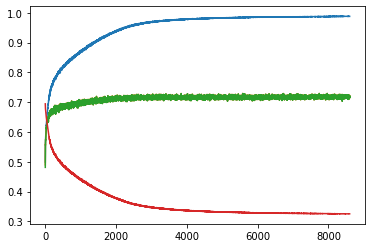

epoch: 0
train_acc: 0.9875938622265753
test_acc: 0.7218715995647443
f1: 0.7218273162199373

epoch: 1
train_acc: 0.9880291653063445
test_acc: 0.7194776931447225
f1: 0.7193417228811335

epoch: 2
train_acc: 0.9879203395364022
test_acc: 0.717519042437432
f1: 0.7174173073968326

epoch: 3
train_acc: 0.9879747524213733
test_acc: 0.7179542981501632
f1: 0.7178260988646489

epoch: 4
train_acc: 0.9880835781913158
test_acc: 0.7170837867247007
f1: 0.7167976634830053

epoch: 5
train_acc: 0.9881379910762869
test_acc: 0.7186071817192601
f1: 0.7182767175956289

epoch: 6
train_acc: 0.9881379910762869
test_acc: 0.7170837867247007
f1: 0.7167895194506427

epoch: 7
train_acc: 0.987865926651431
test_acc: 0.7225244831338411
f1: 0.7223603684403396

epoch: 8
train_acc: 0.9880291653063445
test_acc: 0.7166485310119696
f1: 0.7165750203039745

epoch: 9
train_acc: 0.9881924039612581
test_acc: 0.7186071817192601
f1: 0.718492893347206

epoch: 10
train_acc: 0.9879747524213733
test_acc: 0.7151251360174102
f1: 0.71505779

epoch: 90
train_acc: 0.9879203395364022
test_acc: 0.710119695321001
f1: 0.7099038880710217

epoch: 91
train_acc: 0.987865926651431
test_acc: 0.7112078346028292
f1: 0.7110305308522825

epoch: 92
train_acc: 0.987865926651431
test_acc: 0.7157780195865071
f1: 0.7156951733001637

epoch: 93
train_acc: 0.9879203395364022
test_acc: 0.7181719260065288
f1: 0.7180574608543169

epoch: 94
train_acc: 0.9879747524213733
test_acc: 0.7077257889009794
f1: 0.7076332780754221

epoch: 95
train_acc: 0.987865926651431
test_acc: 0.7151251360174102
f1: 0.7150661670092218

epoch: 96
train_acc: 0.9881379910762869
test_acc: 0.7166485310119696
f1: 0.716556425885737

epoch: 97
train_acc: 0.9879747524213733
test_acc: 0.7244831338411316
f1: 0.7243523867439942

epoch: 98
train_acc: 0.9875938622265753
test_acc: 0.7196953210010881
f1: 0.7195326453698526

epoch: 99
train_acc: 0.9880835781913158
test_acc: 0.7218715995647443
f1: 0.7217663933983525

epoch: 100
train_acc: 0.9880291653063445
test_acc: 0.714689880304679
f1: 0.

epoch: 178
train_acc: 0.9878115137664599
test_acc: 0.7194776931447225
f1: 0.7194725100859072

epoch: 179
train_acc: 0.9879203395364022
test_acc: 0.717519042437432
f1: 0.7173673810939921

epoch: 180
train_acc: 0.9879747524213733
test_acc: 0.7216539717083786
f1: 0.721399677055813

epoch: 181
train_acc: 0.9879747524213733
test_acc: 0.7151251360174102
f1: 0.7147992729203632

epoch: 182
train_acc: 0.9881379910762869
test_acc: 0.7162132752992383
f1: 0.7159804215720819

epoch: 183
train_acc: 0.9878115137664599
test_acc: 0.7220892274211099
f1: 0.7220059278825571

epoch: 184
train_acc: 0.9879203395364022
test_acc: 0.7131664853101197
f1: 0.7131777083502807

epoch: 185
train_acc: 0.987865926651431
test_acc: 0.7212187159956475
f1: 0.7212353531579783

epoch: 186
train_acc: 0.9878115137664599
test_acc: 0.7210010881392819
f1: 0.7209151340893494

epoch: 187
train_acc: 0.9881379910762869
test_acc: 0.7070729053318825
f1: 0.7067931865232302

epoch: 188
train_acc: 0.9875394493416041
test_acc: 0.7179542981

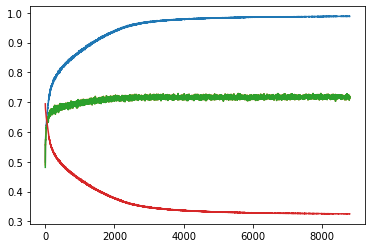

epoch: 0
train_acc: 0.9879203395364022
test_acc: 0.7112078346028292
f1: 0.7111951921452206

epoch: 1
train_acc: 0.9878115137664599
test_acc: 0.7164309031556039
f1: 0.7163157308827606

epoch: 2
train_acc: 0.9880291653063445
test_acc: 0.7177366702937976
f1: 0.7175436830521481

epoch: 3
train_acc: 0.987865926651431
test_acc: 0.717519042437432
f1: 0.7172872601231306

epoch: 4
train_acc: 0.9878115137664599
test_acc: 0.7153427638737758
f1: 0.7151775622234215

epoch: 5
train_acc: 0.9879747524213733
test_acc: 0.7116430903155604
f1: 0.7114527523371288

epoch: 6
train_acc: 0.987865926651431
test_acc: 0.7109902067464635
f1: 0.7109707076505815

epoch: 7
train_acc: 0.9880291653063445
test_acc: 0.7212187159956475
f1: 0.7212157047495344

epoch: 8
train_acc: 0.9879203395364022
test_acc: 0.712948857453754
f1: 0.7129665599910425

epoch: 9
train_acc: 0.9877026879965176
test_acc: 0.7159956474428727
f1: 0.716012596308479

epoch: 10
train_acc: 0.9878115137664599
test_acc: 0.7164309031556039
f1: 0.7164103468

epoch: 89
train_acc: 0.9879203395364022
test_acc: 0.7151251360174102
f1: 0.7148648766740103

epoch: 90
train_acc: 0.9880291653063445
test_acc: 0.7120783460282917
f1: 0.7119144194164148

epoch: 91
train_acc: 0.9879747524213733
test_acc: 0.7142546245919478
f1: 0.713910222773341

epoch: 92
train_acc: 0.9880835781913158
test_acc: 0.7181719260065288
f1: 0.7179220786720731

epoch: 93
train_acc: 0.9880835781913158
test_acc: 0.7216539717083786
f1: 0.7214636627784866

epoch: 94
train_acc: 0.9880835781913158
test_acc: 0.7190424374319913
f1: 0.7189335760551901

epoch: 95
train_acc: 0.9877571008814887
test_acc: 0.7188248095756257
f1: 0.7188317357946814

epoch: 96
train_acc: 0.9878115137664599
test_acc: 0.7173014145810663
f1: 0.7172864402799356

epoch: 97
train_acc: 0.9880835781913158
test_acc: 0.7240478781284004
f1: 0.7240586754083126

epoch: 98
train_acc: 0.987865926651431
test_acc: 0.719260065288357
f1: 0.7191782339641741

epoch: 99
train_acc: 0.9881379910762869
test_acc: 0.7131664853101197
f1: 

epoch: 177
train_acc: 0.9879203395364022
test_acc: 0.7188248095756257
f1: 0.7186970059669185

epoch: 178
train_acc: 0.9881379910762869
test_acc: 0.7153427638737758
f1: 0.7152452937858361

epoch: 179
train_acc: 0.9879747524213733
test_acc: 0.7212187159956475
f1: 0.7211001727214192

epoch: 180
train_acc: 0.9881379910762869
test_acc: 0.7157780195865071
f1: 0.7156488311089749

epoch: 181
train_acc: 0.9881924039612581
test_acc: 0.7194776931447225
f1: 0.7193359471629017

epoch: 182
train_acc: 0.9882468168462292
test_acc: 0.7181719260065288
f1: 0.7180729387735153

epoch: 183
train_acc: 0.9880835781913158
test_acc: 0.719260065288357
f1: 0.7191999293180196

epoch: 184
train_acc: 0.9880291653063445
test_acc: 0.7181719260065288
f1: 0.7181764652895316

epoch: 185
train_acc: 0.9879747524213733
test_acc: 0.7125136017410229
f1: 0.7124321484871301

epoch: 186
train_acc: 0.9879747524213733
test_acc: 0.7142546245919478
f1: 0.7140726553524577

epoch: 187
train_acc: 0.9881924039612581
test_acc: 0.71860718

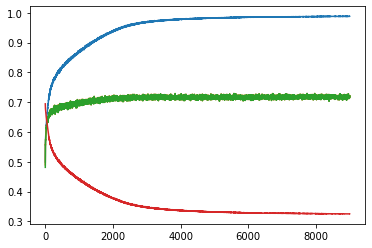

epoch: 0
train_acc: 0.9880291653063445
test_acc: 0.7186071817192601
f1: 0.7185745149901047

epoch: 1
train_acc: 0.987865926651431
test_acc: 0.7142546245919478
f1: 0.7142394889049697

epoch: 2
train_acc: 0.9880835781913158
test_acc: 0.7109902067464635
f1: 0.7109324368475045

epoch: 3
train_acc: 0.9881379910762869
test_acc: 0.7199129488574537
f1: 0.7197345829692408

epoch: 4
train_acc: 0.987865926651431
test_acc: 0.7157780195865071
f1: 0.7156756575194634

epoch: 5
train_acc: 0.9879747524213733
test_acc: 0.7201305767138194
f1: 0.7200142522139711

epoch: 6
train_acc: 0.9880835781913158
test_acc: 0.719260065288357
f1: 0.7192514465609867

epoch: 7
train_acc: 0.9881379910762869
test_acc: 0.720348204570185
f1: 0.7203157399553631

epoch: 8
train_acc: 0.9882468168462292
test_acc: 0.7190424374319913
f1: 0.7190248661704987

epoch: 9
train_acc: 0.9881379910762869
test_acc: 0.720348204570185
f1: 0.7203250433124287

epoch: 10
train_acc: 0.9880291653063445
test_acc: 0.7179542981501632
f1: 0.7178766597

epoch: 90
train_acc: 0.9880291653063445
test_acc: 0.7233949945593036
f1: 0.7231644351665877

epoch: 91
train_acc: 0.9880835781913158
test_acc: 0.7138193688792165
f1: 0.7136747637852722

epoch: 92
train_acc: 0.9880291653063445
test_acc: 0.7157780195865071
f1: 0.7157042830391632

epoch: 93
train_acc: 0.9881924039612581
test_acc: 0.7266594124047878
f1: 0.7266532742219013

epoch: 94
train_acc: 0.9879747524213733
test_acc: 0.7177366702937976
f1: 0.7177268011808624

epoch: 95
train_acc: 0.9881379910762869
test_acc: 0.7196953210010881
f1: 0.7196392911593266

epoch: 96
train_acc: 0.9882468168462292
test_acc: 0.7138193688792165
f1: 0.7136687626407333

epoch: 97
train_acc: 0.9881379910762869
test_acc: 0.7155603917301414
f1: 0.7152350265140678

epoch: 98
train_acc: 0.9880291653063445
test_acc: 0.7092491838955386
f1: 0.7089121785269673

epoch: 99
train_acc: 0.9881379910762869
test_acc: 0.7194776931447225
f1: 0.719388902039627

epoch: 100
train_acc: 0.9880835781913158
test_acc: 0.7188248095756257
f

epoch: 178
train_acc: 0.9881924039612581
test_acc: 0.7173014145810663
f1: 0.717140461694575

epoch: 179
train_acc: 0.9880835781913158
test_acc: 0.7194776931447225
f1: 0.7193179793104753

epoch: 180
train_acc: 0.9877571008814887
test_acc: 0.7168661588683352
f1: 0.7165997182100176

epoch: 181
train_acc: 0.9879203395364022
test_acc: 0.7210010881392819
f1: 0.7208686886301742

epoch: 182
train_acc: 0.9881924039612581
test_acc: 0.7162132752992383
f1: 0.71618826540091

epoch: 183
train_acc: 0.9881924039612581
test_acc: 0.7236126224156693
f1: 0.7236222061507207

epoch: 184
train_acc: 0.9881379910762869
test_acc: 0.7196953210010881
f1: 0.7197105885049089

epoch: 185
train_acc: 0.9881379910762869
test_acc: 0.7155603917301414
f1: 0.715575885899772

epoch: 186
train_acc: 0.9882468168462292
test_acc: 0.7196953210010881
f1: 0.7196226007308134

epoch: 187
train_acc: 0.9881924039612581
test_acc: 0.7177366702937976
f1: 0.7176424828042516

epoch: 188
train_acc: 0.9881924039612581
test_acc: 0.71556039173

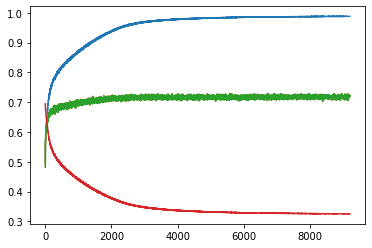

epoch: 0
train_acc: 0.9880291653063445
test_acc: 0.721436343852013
f1: 0.7214277919364829

epoch: 1
train_acc: 0.9880835781913158
test_acc: 0.7173014145810663
f1: 0.7172582258774246

epoch: 2
train_acc: 0.9881924039612581
test_acc: 0.717519042437432
f1: 0.7174457575687856

epoch: 3
train_acc: 0.9881924039612581
test_acc: 0.7164309031556039
f1: 0.7163411476785368

epoch: 4
train_acc: 0.9881924039612581
test_acc: 0.7255712731229598
f1: 0.7252405109803374

epoch: 5
train_acc: 0.9881924039612581
test_acc: 0.7188248095756257
f1: 0.7185074268758632

epoch: 6
train_acc: 0.9882468168462292
test_acc: 0.7253536452665941
f1: 0.7252497562353059

epoch: 7
train_acc: 0.9881379910762869
test_acc: 0.7207834602829162
f1: 0.7207256625460899

epoch: 8
train_acc: 0.9881924039612581
test_acc: 0.7173014145810663
f1: 0.7172983610223618

epoch: 9
train_acc: 0.9883012297312004
test_acc: 0.7188248095756257
f1: 0.7187763360933948

epoch: 10
train_acc: 0.9882468168462292
test_acc: 0.7218715995647443
f1: 0.7218120

epoch: 90
train_acc: 0.9883556426161715
test_acc: 0.7262241566920565
f1: 0.726125556783679

epoch: 91
train_acc: 0.9881379910762869
test_acc: 0.7168661588683352
f1: 0.7168115498820268

epoch: 92
train_acc: 0.9880291653063445
test_acc: 0.717519042437432
f1: 0.7174625775813712

epoch: 93
train_acc: 0.9880835781913158
test_acc: 0.710119695321001
f1: 0.7100489711482444

epoch: 94
train_acc: 0.9880291653063445
test_acc: 0.7233949945593036
f1: 0.723185630168222

epoch: 95
train_acc: 0.9881924039612581
test_acc: 0.7136017410228509
f1: 0.7133439796771524

epoch: 96
train_acc: 0.9881924039612581
test_acc: 0.7225244831338411
f1: 0.7223347693843397

epoch: 97
train_acc: 0.9880835781913158
test_acc: 0.7142546245919478
f1: 0.7141641802777581

epoch: 98
train_acc: 0.9881379910762869
test_acc: 0.720348204570185
f1: 0.7202862600796182

epoch: 99
train_acc: 0.9882468168462292
test_acc: 0.717519042437432
f1: 0.717519042437432

epoch: 100
train_acc: 0.9881924039612581
test_acc: 0.7240478781284004
f1: 0.7

epoch: 178
train_acc: 0.9884100555011427
test_acc: 0.7212187159956475
f1: 0.7211610083566182

epoch: 179
train_acc: 0.9882468168462292
test_acc: 0.720348204570185
f1: 0.7203124265682322

epoch: 180
train_acc: 0.9881924039612581
test_acc: 0.7186071817192601
f1: 0.7185406627842691

epoch: 181
train_acc: 0.9881924039612581
test_acc: 0.7255712731229598
f1: 0.7255064004415802

epoch: 182
train_acc: 0.9883556426161715
test_acc: 0.7116430903155604
f1: 0.7114851822313012

epoch: 183
train_acc: 0.9884100555011427
test_acc: 0.7194776931447225
f1: 0.7193417228811335

epoch: 184
train_acc: 0.9881379910762869
test_acc: 0.7114254624591948
f1: 0.711257987391634

epoch: 185
train_acc: 0.9883012297312004
test_acc: 0.7164309031556039
f1: 0.7162503198204512

epoch: 186
train_acc: 0.9882468168462292
test_acc: 0.7144722524483134
f1: 0.7142152745717508

epoch: 187
train_acc: 0.9881924039612581
test_acc: 0.7181719260065288
f1: 0.7179067141291103

epoch: 188
train_acc: 0.9881379910762869
test_acc: 0.717954298

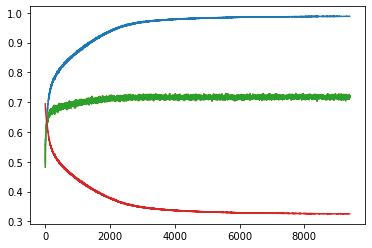

epoch: 0
train_acc: 0.9880835781913158
test_acc: 0.7210010881392819
f1: 0.7209330187778148

epoch: 1
train_acc: 0.9883012297312004
test_acc: 0.7112078346028292
f1: 0.7110959375873256

epoch: 2
train_acc: 0.9880835781913158
test_acc: 0.7136017410228509
f1: 0.7134093249320924

epoch: 3
train_acc: 0.9883012297312004
test_acc: 0.7144722524483134
f1: 0.7142937009380784

epoch: 4
train_acc: 0.9879203395364022
test_acc: 0.7199129488574537
f1: 0.7196939017579776

epoch: 5
train_acc: 0.9882468168462292
test_acc: 0.7233949945593036
f1: 0.7232188461180301

epoch: 6
train_acc: 0.9881379910762869
test_acc: 0.7151251360174102
f1: 0.7150886897881836

epoch: 7
train_acc: 0.9884644683861138
test_acc: 0.7201305767138194
f1: 0.7201144261598105

epoch: 8
train_acc: 0.9883556426161715
test_acc: 0.7196953210010881
f1: 0.7196706179726778

epoch: 9
train_acc: 0.9883012297312004
test_acc: 0.7173014145810663
f1: 0.7172780009827587

epoch: 10
train_acc: 0.9882468168462292
test_acc: 0.7159956474428727
f1: 0.71588

epoch: 90
train_acc: 0.9881924039612581
test_acc: 0.7216539717083786
f1: 0.7215751081870093

epoch: 91
train_acc: 0.9880835781913158
test_acc: 0.7199129488574537
f1: 0.7197595694578751

epoch: 92
train_acc: 0.9884644683861138
test_acc: 0.7196953210010881
f1: 0.719604206252557

epoch: 93
train_acc: 0.9881379910762869
test_acc: 0.7194776931447225
f1: 0.7194113799914329

epoch: 94
train_acc: 0.9882468168462292
test_acc: 0.7194776931447225
f1: 0.7193473918422455

epoch: 95
train_acc: 0.9881924039612581
test_acc: 0.7173014145810663
f1: 0.7171081297492213

epoch: 96
train_acc: 0.9882468168462292
test_acc: 0.7196953210010881
f1: 0.7194653243748784

epoch: 97
train_acc: 0.9881924039612581
test_acc: 0.7188248095756257
f1: 0.7187763360933948

epoch: 98
train_acc: 0.9881924039612581
test_acc: 0.7133841131664853
f1: 0.713328832586187

epoch: 99
train_acc: 0.9883556426161715
test_acc: 0.7173014145810663
f1: 0.7172749733581226

epoch: 100
train_acc: 0.9884100555011427
test_acc: 0.7227421109902068
f1

epoch: 178
train_acc: 0.9884100555011427
test_acc: 0.7162132752992383
f1: 0.716089857619976

epoch: 179
train_acc: 0.9882468168462292
test_acc: 0.7194776931447225
f1: 0.7192137100482033

epoch: 180
train_acc: 0.9883012297312004
test_acc: 0.7181719260065288
f1: 0.7179586082359147

epoch: 181
train_acc: 0.9883556426161715
test_acc: 0.7249183895538629
f1: 0.7246782066908604

epoch: 182
train_acc: 0.9883556426161715
test_acc: 0.714689880304679
f1: 0.7144445599124607

epoch: 183
train_acc: 0.9881924039612581
test_acc: 0.7207834602829162
f1: 0.720642374096201

epoch: 184
train_acc: 0.9884644683861138
test_acc: 0.7238302502720348
f1: 0.723773083219788

epoch: 185
train_acc: 0.9882468168462292
test_acc: 0.7194776931447225
f1: 0.7193791645398154

epoch: 186
train_acc: 0.9883012297312004
test_acc: 0.7201305767138194
f1: 0.7199977641017191

epoch: 187
train_acc: 0.9880291653063445
test_acc: 0.7227421109902068
f1: 0.7225357007526138

epoch: 188
train_acc: 0.9883556426161715
test_acc: 0.71621327529

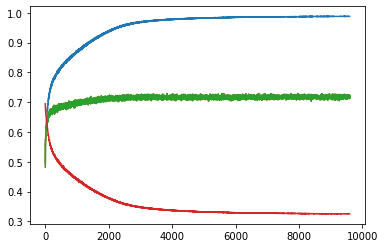

epoch: 0
train_acc: 0.9883556426161715
test_acc: 0.7216539717083786
f1: 0.7215923164527874

epoch: 1
train_acc: 0.9881379910762869
test_acc: 0.7194776931447225
f1: 0.7194767097208639

epoch: 2
train_acc: 0.9883556426161715
test_acc: 0.7257889009793254
f1: 0.7257044219598909

epoch: 3
train_acc: 0.9884644683861138
test_acc: 0.723177366702938
f1: 0.7230726544622099

epoch: 4
train_acc: 0.988518881271085
test_acc: 0.7168661588683352
f1: 0.716717156042277

epoch: 5
train_acc: 0.9883012297312004
test_acc: 0.7162132752992383
f1: 0.7160842846601098

epoch: 6
train_acc: 0.9884100555011427
test_acc: 0.7096844396082699
f1: 0.7093567395142425

epoch: 7
train_acc: 0.9883556426161715
test_acc: 0.7133841131664853
f1: 0.7131671714646328

epoch: 8
train_acc: 0.9883556426161715
test_acc: 0.7122959738846573
f1: 0.7121594433456243

epoch: 9
train_acc: 0.9884644683861138
test_acc: 0.7186071817192601
f1: 0.7184407501124384

epoch: 10
train_acc: 0.9881924039612581
test_acc: 0.7144722524483134
f1: 0.71428042

epoch: 90
train_acc: 0.9884644683861138
test_acc: 0.7199129488574537
f1: 0.7198509079552285

epoch: 91
train_acc: 0.9880291653063445
test_acc: 0.717519042437432
f1: 0.7175079343839862

epoch: 92
train_acc: 0.9884644683861138
test_acc: 0.7159956474428727
f1: 0.7158908046818176

epoch: 93
train_acc: 0.988518881271085
test_acc: 0.7264417845484222
f1: 0.7263771176487442

epoch: 94
train_acc: 0.9881924039612581
test_acc: 0.7153427638737758
f1: 0.7149952364921042

epoch: 95
train_acc: 0.9881924039612581
test_acc: 0.7229597388465724
f1: 0.7228254563442073

epoch: 96
train_acc: 0.988518881271085
test_acc: 0.721436343852013
f1: 0.7214087580646948

epoch: 97
train_acc: 0.9885732941560561
test_acc: 0.7183895538628945
f1: 0.7183616663560275

epoch: 98
train_acc: 0.9884644683861138
test_acc: 0.7227421109902068
f1: 0.7226321057507272

epoch: 99
train_acc: 0.9885732941560561
test_acc: 0.7186071817192601
f1: 0.7184214405825717

epoch: 100
train_acc: 0.9882468168462292
test_acc: 0.719260065288357
f1: 0

epoch: 178
train_acc: 0.9884644683861138
test_acc: 0.7190424374319913
f1: 0.7190098212314193

epoch: 179
train_acc: 0.988518881271085
test_acc: 0.7218715995647443
f1: 0.7217763650292802

epoch: 180
train_acc: 0.9884644683861138
test_acc: 0.7170837867247007
f1: 0.7169068683075472

epoch: 181
train_acc: 0.9883012297312004
test_acc: 0.7188248095756257
f1: 0.7184077502391193

epoch: 182
train_acc: 0.9883012297312004
test_acc: 0.7183895538628945
f1: 0.718112750077092

epoch: 183
train_acc: 0.9885732941560561
test_acc: 0.7155603917301414
f1: 0.715439442425367

epoch: 184
train_acc: 0.9884644683861138
test_acc: 0.721436343852013
f1: 0.7213640752604357

epoch: 185
train_acc: 0.988518881271085
test_acc: 0.7247007616974973
f1: 0.7244854589928841

epoch: 186
train_acc: 0.9886277070410273
test_acc: 0.7240478781284004
f1: 0.7240235586873879

epoch: 187
train_acc: 0.9884644683861138
test_acc: 0.7212187159956475
f1: 0.7210346986746128

epoch: 188
train_acc: 0.9885732941560561
test_acc: 0.724700761697

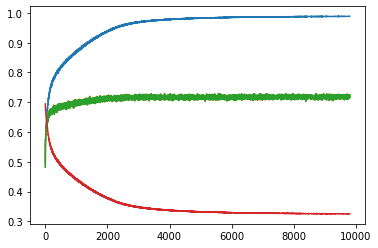

epoch: 0
train_acc: 0.9885732941560561
test_acc: 0.719260065288357
f1: 0.7191782339641741

epoch: 1
train_acc: 0.9883556426161715
test_acc: 0.7181719260065288
f1: 0.7180295202296026

epoch: 2
train_acc: 0.9884644683861138
test_acc: 0.7207834602829162
f1: 0.7205721192020683

epoch: 3
train_acc: 0.9884100555011427
test_acc: 0.7196953210010881
f1: 0.7193873110679934

epoch: 4
train_acc: 0.9885732941560561
test_acc: 0.7151251360174102
f1: 0.7150199718992332

epoch: 5
train_acc: 0.9885732941560561
test_acc: 0.7142546245919478
f1: 0.7142034399155487

epoch: 6
train_acc: 0.9884100555011427
test_acc: 0.719260065288357
f1: 0.7191999293180196

epoch: 7
train_acc: 0.9883556426161715
test_acc: 0.7166485310119696
f1: 0.7166139717369554

epoch: 8
train_acc: 0.9886277070410273
test_acc: 0.7088139281828074
f1: 0.7086872925579202

epoch: 9
train_acc: 0.988518881271085
test_acc: 0.720348204570185
f1: 0.7200693677271024

epoch: 10
train_acc: 0.9887909456959408
test_acc: 0.720348204570185
f1: 0.7201828027

epoch: 90
train_acc: 0.9883556426161715
test_acc: 0.7240478781284004
f1: 0.7237109784954037

epoch: 91
train_acc: 0.9886821199259985
test_acc: 0.7173014145810663
f1: 0.7168965325610147

epoch: 92
train_acc: 0.9885732941560561
test_acc: 0.7142546245919478
f1: 0.7139532609759693

epoch: 93
train_acc: 0.9888453585809119
test_acc: 0.7177366702937976
f1: 0.7176166463853871

epoch: 94
train_acc: 0.9886821199259985
test_acc: 0.7140369967355822
f1: 0.7140231773852623

epoch: 95
train_acc: 0.9885732941560561
test_acc: 0.7183895538628945
f1: 0.7184052406657978

epoch: 96
train_acc: 0.9886821199259985
test_acc: 0.7170837867247007
f1: 0.717061829822478

epoch: 97
train_acc: 0.9886821199259985
test_acc: 0.714689880304679
f1: 0.714568560841359

epoch: 98
train_acc: 0.9885732941560561
test_acc: 0.7199129488574537
f1: 0.7196256689253886

epoch: 99
train_acc: 0.988518881271085
test_acc: 0.7155603917301414
f1: 0.7151237193346418

epoch: 100
train_acc: 0.9885732941560561
test_acc: 0.7177366702937976
f1: 

epoch: 178
train_acc: 0.9885732941560561
test_acc: 0.7164309031556039
f1: 0.7162631843747157

epoch: 179
train_acc: 0.9886277070410273
test_acc: 0.7138193688792165
f1: 0.7136168301771084

epoch: 180
train_acc: 0.9886277070410273
test_acc: 0.7138193688792165
f1: 0.7135340222265679

epoch: 181
train_acc: 0.9884100555011427
test_acc: 0.7142546245919478
f1: 0.7140726553524577

epoch: 182
train_acc: 0.9886277070410273
test_acc: 0.7196953210010881
f1: 0.7195200356770161

epoch: 183
train_acc: 0.988518881271085
test_acc: 0.7116430903155604
f1: 0.7114594579908655

epoch: 184
train_acc: 0.988518881271085
test_acc: 0.720348204570185
f1: 0.7202596889999385

epoch: 185
train_acc: 0.9885732941560561
test_acc: 0.7196953210010881
f1: 0.7195892916252565

epoch: 186
train_acc: 0.9887909456959408
test_acc: 0.7170837867247007
f1: 0.71702723486578

epoch: 187
train_acc: 0.9886821199259985
test_acc: 0.7218715995647443
f1: 0.7217950395215825

epoch: 188
train_acc: 0.9885732941560561
test_acc: 0.717301414581

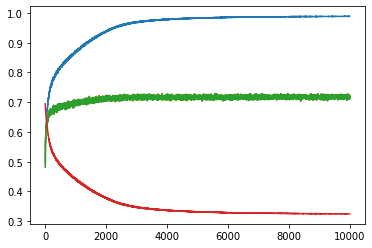

In [12]:
for i in range(50):
    for epoch in range(epochs):
        y_pred = net.forward(X_train)

        train_pred = y_pred.cpu().detach().numpy()
        train_pred = [np.argmax(sample) for sample in train_pred]
        train_accuracy = accuracy_score(y_train.cpu(), train_pred)
        train_accuracies.append(train_accuracy)

        test_pred = net.predict(X_test)
        test_accuracy = accuracy_score(y_test.cpu(), test_pred)
        test_accuracies.append(test_accuracy)
        
        f1 = f1_score(y_test.cpu(), test_pred, average='weighted')
        f1s.append(f1)

        loss = criterion(y_pred, y_train)   
        losses.append(loss)
        
        print("epoch:", epoch)
        print("train_acc:", train_accuracy)
        print("test_acc:", test_accuracy)
        print("f1:", f1)
        print()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    plt.plot(train_accuracies)
    plt.plot(test_accuracies)
    plt.plot(f1s)
    plt.plot(losses)
    plt.show()
    
    torch.save(net.state_dict(), 'torch_RS_dict.dict')

In [14]:
from sklearn.metrics import confusion_matrix
test_pred = net.predict(X_test)
confusion_matrix(y_test.cpu(), test_pred)

array([[1580,  681],
       [ 604, 1730]])

In [ ]:
torch.save(net, 'torch_RS.mdl')